In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [36]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [37]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [38]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [39]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [41]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.82347	validation_1-auc:0.80523
[2]	validation_0-auc:0.83178	validation_1-auc:0.81097
[3]	validation_0-auc:0.83401	validation_1-auc:0.81091
[4]	validation_0-auc:0.83443	validation_1-auc:0.81040
[5]	validation_0-auc:0.83570	validation_1-auc:0.81089
[6]	validation_0-auc:0.83597	validation_1-auc:0.81057
[7]	validation_0-auc:0.83643	validation_1-auc:0.81082
[8]	validation_0-auc:0.83682	validation_1-auc:0.81147
[9]	validation_0-auc:0.83769	validation_1-auc:0.81188
[10]	validation_0-auc:0.83770	validation_1-auc:0.81163
[11]	validation_0-auc:0.83911	validation_1-auc:0.81355
[12]	validation_0-auc:0.83976	validation_1-auc:0.81336
[13]	validation_0-auc:0.84038	validation_1-auc:0.81365
[14]	validation_0-auc:0.84176	validation_1-auc:0.81419
[15]	validation_0-auc:0.84306	validation_1-auc:0.81586
[16]	validation_0-auc:0.84343	validation_1-auc:0.81610
[17]	validation_0-auc:0.84373	validation_1-auc:0.81584
[18]	validation_0-au

[149]	validation_0-auc:0.90500	validation_1-auc:0.83353
[150]	validation_0-auc:0.90513	validation_1-auc:0.83352
[151]	validation_0-auc:0.90531	validation_1-auc:0.83349
[152]	validation_0-auc:0.90548	validation_1-auc:0.83349
[153]	validation_0-auc:0.90551	validation_1-auc:0.83351
[154]	validation_0-auc:0.90563	validation_1-auc:0.83348
[155]	validation_0-auc:0.90572	validation_1-auc:0.83343
[156]	validation_0-auc:0.90579	validation_1-auc:0.83344
[157]	validation_0-auc:0.90591	validation_1-auc:0.83345
[158]	validation_0-auc:0.90621	validation_1-auc:0.83355
[159]	validation_0-auc:0.90630	validation_1-auc:0.83359
[160]	validation_0-auc:0.90643	validation_1-auc:0.83356
[161]	validation_0-auc:0.90657	validation_1-auc:0.83352
[162]	validation_0-auc:0.90672	validation_1-auc:0.83346
[163]	validation_0-auc:0.90694	validation_1-auc:0.83347
[164]	validation_0-auc:0.90714	validation_1-auc:0.83343
[165]	validation_0-auc:0.90720	validation_1-auc:0.83343
[166]	validation_0-auc:0.90727	validation_1-auc:

In [45]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [46]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [47]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))
    
print('best:', best)

[0]	validation_0-auc:0.73641	validation_1-auc:0.69861                           
[1]	validation_0-auc:0.75284	validation_1-auc:0.71875                           
[2]	validation_0-auc:0.81276	validation_1-auc:0.78335                           
[3]	validation_0-auc:0.82545	validation_1-auc:0.79690                           
[4]	validation_0-auc:0.83346	validation_1-auc:0.80340                           
[5]	validation_0-auc:0.83938	validation_1-auc:0.81157                           
[6]	validation_0-auc:0.83511	validation_1-auc:0.80456                           
[7]	validation_0-auc:0.84044	validation_1-auc:0.81013                           
[8]	validation_0-auc:0.83842	validation_1-auc:0.80757                           
[9]	validation_0-auc:0.83590	validation_1-auc:0.80661                           
[10]	validation_0-auc:0.84039	validation_1-auc:0.81095                          
[11]	validation_0-auc:0.84409	validation_1-auc:0.81470                          
[12]	validation_0-auc:0.8479

[2]	validation_0-auc:0.81798	validation_1-auc:0.79614                           
[3]	validation_0-auc:0.82959	validation_1-auc:0.80970                           
[4]	validation_0-auc:0.83592	validation_1-auc:0.81619                           
[5]	validation_0-auc:0.84093	validation_1-auc:0.82171                           
[6]	validation_0-auc:0.84019	validation_1-auc:0.81997                           
[7]	validation_0-auc:0.84429	validation_1-auc:0.82344                           
[8]	validation_0-auc:0.84426	validation_1-auc:0.82073                           
[9]	validation_0-auc:0.84243	validation_1-auc:0.81729                           
[10]	validation_0-auc:0.84577	validation_1-auc:0.82023                          
[11]	validation_0-auc:0.84788	validation_1-auc:0.82274                          
[12]	validation_0-auc:0.85129	validation_1-auc:0.82475                          
[13]	validation_0-auc:0.85056	validation_1-auc:0.82339                          
[14]	validation_0-auc:0.8525

[22]	validation_0-auc:0.86204	validation_1-auc:0.82914                          
[23]	validation_0-auc:0.86352	validation_1-auc:0.83004                          
[24]	validation_0-auc:0.86373	validation_1-auc:0.82934                          
[25]	validation_0-auc:0.86448	validation_1-auc:0.82919                          
[26]	validation_0-auc:0.86549	validation_1-auc:0.82997                          
[27]	validation_0-auc:0.86629	validation_1-auc:0.83008                          
[28]	validation_0-auc:0.86809	validation_1-auc:0.83079                          
[29]	validation_0-auc:0.86873	validation_1-auc:0.83147                          
[30]	validation_0-auc:0.86915	validation_1-auc:0.83231                          
[31]	validation_0-auc:0.86981	validation_1-auc:0.83148                          
[32]	validation_0-auc:0.87115	validation_1-auc:0.83226                          
[33]	validation_0-auc:0.87201	validation_1-auc:0.83265                          
[34]	validation_0-auc:0.8735

[23]	validation_0-auc:0.87054	validation_1-auc:0.82042                          
[24]	validation_0-auc:0.87078	validation_1-auc:0.81875                          
[25]	validation_0-auc:0.87258	validation_1-auc:0.81780                          
[26]	validation_0-auc:0.87562	validation_1-auc:0.81976                          
[27]	validation_0-auc:0.87815	validation_1-auc:0.82154                          
[28]	validation_0-auc:0.87943	validation_1-auc:0.82263                          
[29]	validation_0-auc:0.88160	validation_1-auc:0.82509                          
[30]	validation_0-auc:0.88257	validation_1-auc:0.82404                          
[31]	validation_0-auc:0.88240	validation_1-auc:0.82385                          
[32]	validation_0-auc:0.88439	validation_1-auc:0.82470                          
[33]	validation_0-auc:0.88555	validation_1-auc:0.82533                          
[34]	validation_0-auc:0.88720	validation_1-auc:0.82572                          
[35]	validation_0-auc:0.8879

[24]	validation_0-auc:0.87434	validation_1-auc:0.82443                          
[25]	validation_0-auc:0.87623	validation_1-auc:0.82308                          
[26]	validation_0-auc:0.87802	validation_1-auc:0.82406                          
[27]	validation_0-auc:0.87993	validation_1-auc:0.82435                          
[28]	validation_0-auc:0.88141	validation_1-auc:0.82535                          
[29]	validation_0-auc:0.88359	validation_1-auc:0.82618                          
[30]	validation_0-auc:0.88384	validation_1-auc:0.82547                          
[31]	validation_0-auc:0.88328	validation_1-auc:0.82464                          
[32]	validation_0-auc:0.88518	validation_1-auc:0.82626                          
[33]	validation_0-auc:0.88608	validation_1-auc:0.82697                          
[34]	validation_0-auc:0.88727	validation_1-auc:0.82788                          
[35]	validation_0-auc:0.88761	validation_1-auc:0.82711                          
[36]	validation_0-auc:0.8897

[25]	validation_0-auc:0.87698	validation_1-auc:0.82143                          
[26]	validation_0-auc:0.87923	validation_1-auc:0.82221                          
[27]	validation_0-auc:0.88080	validation_1-auc:0.82286                          
[28]	validation_0-auc:0.88237	validation_1-auc:0.82366                          
[29]	validation_0-auc:0.88441	validation_1-auc:0.82438                          
[30]	validation_0-auc:0.88472	validation_1-auc:0.82372                          
[31]	validation_0-auc:0.88512	validation_1-auc:0.82270                          
[32]	validation_0-auc:0.88787	validation_1-auc:0.82383                          
[33]	validation_0-auc:0.88951	validation_1-auc:0.82497                          
[34]	validation_0-auc:0.89072	validation_1-auc:0.82592                          
[35]	validation_0-auc:0.89131	validation_1-auc:0.82492                          
[36]	validation_0-auc:0.89254	validation_1-auc:0.82567                          
[37]	validation_0-auc:0.8938

[26]	validation_0-auc:0.92090	validation_1-auc:0.82862                          
[27]	validation_0-auc:0.92310	validation_1-auc:0.82860                          
[28]	validation_0-auc:0.92479	validation_1-auc:0.82888                          
[29]	validation_0-auc:0.92603	validation_1-auc:0.82961                          
[30]	validation_0-auc:0.92733	validation_1-auc:0.82983                          
[31]	validation_0-auc:0.92877	validation_1-auc:0.82958                          
[32]	validation_0-auc:0.93054	validation_1-auc:0.82923                          
[33]	validation_0-auc:0.93196	validation_1-auc:0.82942                          
[34]	validation_0-auc:0.93310	validation_1-auc:0.82922                          
[35]	validation_0-auc:0.93381	validation_1-auc:0.82864                          
[36]	validation_0-auc:0.93446	validation_1-auc:0.82892                          
[37]	validation_0-auc:0.93522	validation_1-auc:0.82912                          
[38]	validation_0-auc:0.9358

[15]	validation_0-auc:0.89601	validation_1-auc:0.82305                          
[16]	validation_0-auc:0.89818	validation_1-auc:0.82370                          
[17]	validation_0-auc:0.89978	validation_1-auc:0.82316                          
[18]	validation_0-auc:0.90379	validation_1-auc:0.82558                          
[19]	validation_0-auc:0.90671	validation_1-auc:0.82568                          
[20]	validation_0-auc:0.90827	validation_1-auc:0.82563                          
[21]	validation_0-auc:0.91162	validation_1-auc:0.82641                          
[22]	validation_0-auc:0.91387	validation_1-auc:0.82652                          
[23]	validation_0-auc:0.91696	validation_1-auc:0.82722                          
[24]	validation_0-auc:0.91804	validation_1-auc:0.82778                          
[25]	validation_0-auc:0.91999	validation_1-auc:0.82734                          
[26]	validation_0-auc:0.92289	validation_1-auc:0.82750                          
[27]	validation_0-auc:0.9248

[38]	validation_0-auc:0.88856	validation_1-auc:0.82609                          
[39]	validation_0-auc:0.88901	validation_1-auc:0.82667                          
[40]	validation_0-auc:0.88930	validation_1-auc:0.82575                          
[41]	validation_0-auc:0.88973	validation_1-auc:0.82615                          
[42]	validation_0-auc:0.89035	validation_1-auc:0.82607                          
[43]	validation_0-auc:0.89141	validation_1-auc:0.82626                          
[44]	validation_0-auc:0.89279	validation_1-auc:0.82651                          
[45]	validation_0-auc:0.89383	validation_1-auc:0.82624                          
[46]	validation_0-auc:0.89495	validation_1-auc:0.82661                          
[47]	validation_0-auc:0.89539	validation_1-auc:0.82698                          
[48]	validation_0-auc:0.89616	validation_1-auc:0.82720                          
[49]	validation_0-auc:0.89644	validation_1-auc:0.82738                          
[50]	validation_0-auc:0.8970

[39]	validation_0-auc:0.89176	validation_1-auc:0.83061                          
[40]	validation_0-auc:0.89171	validation_1-auc:0.83011                          
[41]	validation_0-auc:0.89203	validation_1-auc:0.83026                          
[42]	validation_0-auc:0.89259	validation_1-auc:0.83055                          
[43]	validation_0-auc:0.89338	validation_1-auc:0.83097                          
[44]	validation_0-auc:0.89434	validation_1-auc:0.83097                          
[45]	validation_0-auc:0.89582	validation_1-auc:0.83135                          
[46]	validation_0-auc:0.89663	validation_1-auc:0.83179                          
[47]	validation_0-auc:0.89704	validation_1-auc:0.83178                          
[48]	validation_0-auc:0.89742	validation_1-auc:0.83211                          
[49]	validation_0-auc:0.89791	validation_1-auc:0.83237                          
[50]	validation_0-auc:0.89823	validation_1-auc:0.83262                          
[51]	validation_0-auc:0.8986

[40]	validation_0-auc:0.89364	validation_1-auc:0.82813                          
[41]	validation_0-auc:0.89413	validation_1-auc:0.82846                          
[42]	validation_0-auc:0.89480	validation_1-auc:0.82871                          
[43]	validation_0-auc:0.89503	validation_1-auc:0.82916                          
[44]	validation_0-auc:0.89619	validation_1-auc:0.82955                          
[45]	validation_0-auc:0.89685	validation_1-auc:0.82964                          
[46]	validation_0-auc:0.89756	validation_1-auc:0.82969                          
[47]	validation_0-auc:0.89823	validation_1-auc:0.82976                          
[48]	validation_0-auc:0.89890	validation_1-auc:0.83062                          
[49]	validation_0-auc:0.89898	validation_1-auc:0.83077                          
[50]	validation_0-auc:0.89912	validation_1-auc:0.83123                          
[51]	validation_0-auc:0.89980	validation_1-auc:0.83171                          
[52]	validation_0-auc:0.9007

[8]	validation_0-auc:0.88502	validation_1-auc:0.82171                           
[9]	validation_0-auc:0.88463	validation_1-auc:0.81658                           
[10]	validation_0-auc:0.89260	validation_1-auc:0.82007                          
[11]	validation_0-auc:0.89700	validation_1-auc:0.82267                          
[12]	validation_0-auc:0.89995	validation_1-auc:0.82598                          
[13]	validation_0-auc:0.89960	validation_1-auc:0.82463                          
[14]	validation_0-auc:0.90407	validation_1-auc:0.82526                          
[15]	validation_0-auc:0.90763	validation_1-auc:0.82786                          
[16]	validation_0-auc:0.91362	validation_1-auc:0.82894                          
[17]	validation_0-auc:0.91754	validation_1-auc:0.82864                          
[18]	validation_0-auc:0.92260	validation_1-auc:0.82887                          
[19]	validation_0-auc:0.92490	validation_1-auc:0.82796                          
[20]	validation_0-auc:0.9276

[31]	validation_0-auc:0.94677	validation_1-auc:0.82792                          
[32]	validation_0-auc:0.94788	validation_1-auc:0.82881                          
[33]	validation_0-auc:0.94859	validation_1-auc:0.82940                          
[34]	validation_0-auc:0.94933	validation_1-auc:0.82963                          
[35]	validation_0-auc:0.94988	validation_1-auc:0.82990                          
[36]	validation_0-auc:0.95052	validation_1-auc:0.82961                          
[37]	validation_0-auc:0.95089	validation_1-auc:0.82947                          
[38]	validation_0-auc:0.95130	validation_1-auc:0.82987                          
[39]	validation_0-auc:0.95168	validation_1-auc:0.82989                          
[40]	validation_0-auc:0.95194	validation_1-auc:0.82946                          
[41]	validation_0-auc:0.95243	validation_1-auc:0.83006                          
[42]	validation_0-auc:0.95272	validation_1-auc:0.82995                          
[43]	validation_0-auc:0.9532

[61]	validation_0-auc:0.89762	validation_1-auc:0.83425                          
[62]	validation_0-auc:0.89778	validation_1-auc:0.83411                          
[63]	validation_0-auc:0.89815	validation_1-auc:0.83387                          
[64]	validation_0-auc:0.89879	validation_1-auc:0.83379                          
[65]	validation_0-auc:0.89905	validation_1-auc:0.83389                          
[66]	validation_0-auc:0.89931	validation_1-auc:0.83398                          
[67]	validation_0-auc:0.89978	validation_1-auc:0.83391                          
[68]	validation_0-auc:0.89997	validation_1-auc:0.83390                          
[69]	validation_0-auc:0.90046	validation_1-auc:0.83389                          
[70]	validation_0-auc:0.90046	validation_1-auc:0.83383                          
[71]	validation_0-auc:0.90062	validation_1-auc:0.83369                          
[72]	validation_0-auc:0.90079	validation_1-auc:0.83339                          
[73]	validation_0-auc:0.9010

[75]	validation_0-auc:0.90202	validation_1-auc:0.83665                          
[76]	validation_0-auc:0.90235	validation_1-auc:0.83686                          
[77]	validation_0-auc:0.90261	validation_1-auc:0.83679                          
[78]	validation_0-auc:0.90278	validation_1-auc:0.83677                          
[79]	validation_0-auc:0.90315	validation_1-auc:0.83681                          
[80]	validation_0-auc:0.90337	validation_1-auc:0.83689                          
[81]	validation_0-auc:0.90358	validation_1-auc:0.83692                          
[82]	validation_0-auc:0.90431	validation_1-auc:0.83724                          
[83]	validation_0-auc:0.90462	validation_1-auc:0.83720                          
[84]	validation_0-auc:0.90518	validation_1-auc:0.83725                          
[85]	validation_0-auc:0.90533	validation_1-auc:0.83705                          
[86]	validation_0-auc:0.90575	validation_1-auc:0.83720                          
[87]	validation_0-auc:0.9058

[76]	validation_0-auc:0.90399	validation_1-auc:0.83679                          
[77]	validation_0-auc:0.90448	validation_1-auc:0.83680                          
[78]	validation_0-auc:0.90474	validation_1-auc:0.83655                          
[79]	validation_0-auc:0.90496	validation_1-auc:0.83660                          
[80]	validation_0-auc:0.90515	validation_1-auc:0.83648                          
[81]	validation_0-auc:0.90563	validation_1-auc:0.83636                          
[82]	validation_0-auc:0.90611	validation_1-auc:0.83642                          
[83]	validation_0-auc:0.90639	validation_1-auc:0.83633                          
[84]	validation_0-auc:0.90661	validation_1-auc:0.83648                          
[85]	validation_0-auc:0.90719	validation_1-auc:0.83639                          
[86]	validation_0-auc:0.90745	validation_1-auc:0.83627                          
[87]	validation_0-auc:0.90759	validation_1-auc:0.83627                          
[88]	validation_0-auc:0.9078

[8]	validation_0-auc:0.85152	validation_1-auc:0.81912                           
[9]	validation_0-auc:0.85070	validation_1-auc:0.81588                           
[10]	validation_0-auc:0.85499	validation_1-auc:0.82145                          
[11]	validation_0-auc:0.85649	validation_1-auc:0.82355                          
[12]	validation_0-auc:0.85974	validation_1-auc:0.82505                          
[13]	validation_0-auc:0.85940	validation_1-auc:0.82340                          
[14]	validation_0-auc:0.86029	validation_1-auc:0.82188                          
[15]	validation_0-auc:0.86328	validation_1-auc:0.82476                          
[16]	validation_0-auc:0.86457	validation_1-auc:0.82568                          
[17]	validation_0-auc:0.86612	validation_1-auc:0.82771                          
[18]	validation_0-auc:0.86927	validation_1-auc:0.83028                          
[19]	validation_0-auc:0.87043	validation_1-auc:0.83139                          
[20]	validation_0-auc:0.8713

[25]	validation_0-auc:0.87816	validation_1-auc:0.82719                          
[26]	validation_0-auc:0.88104	validation_1-auc:0.82854                          
[27]	validation_0-auc:0.88409	validation_1-auc:0.83163                          
[28]	validation_0-auc:0.88516	validation_1-auc:0.83187                          
[29]	validation_0-auc:0.88702	validation_1-auc:0.83282                          
[30]	validation_0-auc:0.88796	validation_1-auc:0.83295                          
[31]	validation_0-auc:0.88793	validation_1-auc:0.83246                          
[32]	validation_0-auc:0.88932	validation_1-auc:0.83365                          
[33]	validation_0-auc:0.89046	validation_1-auc:0.83419                          
[34]	validation_0-auc:0.89184	validation_1-auc:0.83498                          
[35]	validation_0-auc:0.89272	validation_1-auc:0.83557                          
[36]	validation_0-auc:0.89351	validation_1-auc:0.83613                          
[37]	validation_0-auc:0.8942

[26]	validation_0-auc:0.89358	validation_1-auc:0.82639                          
[27]	validation_0-auc:0.89502	validation_1-auc:0.82727                          
[28]	validation_0-auc:0.89747	validation_1-auc:0.82786                          
[29]	validation_0-auc:0.89930	validation_1-auc:0.82877                          
[30]	validation_0-auc:0.90045	validation_1-auc:0.82937                          
[31]	validation_0-auc:0.90146	validation_1-auc:0.82830                          
[32]	validation_0-auc:0.90285	validation_1-auc:0.82877                          
[33]	validation_0-auc:0.90403	validation_1-auc:0.82914                          
[34]	validation_0-auc:0.90560	validation_1-auc:0.82939                          
[35]	validation_0-auc:0.90636	validation_1-auc:0.82967                          
[36]	validation_0-auc:0.90725	validation_1-auc:0.82960                          
[37]	validation_0-auc:0.90861	validation_1-auc:0.82892                          
[38]	validation_0-auc:0.9095

[36]	validation_0-auc:0.90902	validation_1-auc:0.83019                          
[37]	validation_0-auc:0.91131	validation_1-auc:0.82993                          
[38]	validation_0-auc:0.91231	validation_1-auc:0.82968                          
[39]	validation_0-auc:0.91316	validation_1-auc:0.82992                          
[40]	validation_0-auc:0.91341	validation_1-auc:0.82992                          
[41]	validation_0-auc:0.91490	validation_1-auc:0.83042                          
[42]	validation_0-auc:0.91588	validation_1-auc:0.83067                          
[43]	validation_0-auc:0.91641	validation_1-auc:0.83081                          
[44]	validation_0-auc:0.91752	validation_1-auc:0.83141                          
[45]	validation_0-auc:0.91853	validation_1-auc:0.83142                          
[46]	validation_0-auc:0.91933	validation_1-auc:0.83153                          
[47]	validation_0-auc:0.92011	validation_1-auc:0.83157                          
[48]	validation_0-auc:0.9209

[37]	validation_0-auc:0.91241	validation_1-auc:0.82946                          
[38]	validation_0-auc:0.91409	validation_1-auc:0.82920                          
[39]	validation_0-auc:0.91475	validation_1-auc:0.82913                          
[40]	validation_0-auc:0.91571	validation_1-auc:0.82847                          
[41]	validation_0-auc:0.91662	validation_1-auc:0.82850                          
[42]	validation_0-auc:0.91714	validation_1-auc:0.82889                          
[43]	validation_0-auc:0.91755	validation_1-auc:0.82910                          
[44]	validation_0-auc:0.91859	validation_1-auc:0.82925                          
[45]	validation_0-auc:0.91927	validation_1-auc:0.82924                          
[46]	validation_0-auc:0.92033	validation_1-auc:0.82901                          
[47]	validation_0-auc:0.92111	validation_1-auc:0.82908                          
[48]	validation_0-auc:0.92154	validation_1-auc:0.82919                          
[49]	validation_0-auc:0.9222

[44]	validation_0-auc:0.88936	validation_1-auc:0.83241                          
[45]	validation_0-auc:0.88995	validation_1-auc:0.83211                          
[46]	validation_0-auc:0.89025	validation_1-auc:0.83193                          
[47]	validation_0-auc:0.89066	validation_1-auc:0.83193                          
[48]	validation_0-auc:0.89159	validation_1-auc:0.83207                          
[49]	validation_0-auc:0.89181	validation_1-auc:0.83225                          
[50]	validation_0-auc:0.89252	validation_1-auc:0.83266                          
[51]	validation_0-auc:0.89271	validation_1-auc:0.83268                          
[52]	validation_0-auc:0.89317	validation_1-auc:0.83240                          
[53]	validation_0-auc:0.89366	validation_1-auc:0.83248                          
[54]	validation_0-auc:0.89450	validation_1-auc:0.83230                          
[55]	validation_0-auc:0.89456	validation_1-auc:0.83229                          
[56]	validation_0-auc:0.8946

[63]	validation_0-auc:0.89839	validation_1-auc:0.83631                          
[64]	validation_0-auc:0.89878	validation_1-auc:0.83635                          
[65]	validation_0-auc:0.89928	validation_1-auc:0.83611                          
[66]	validation_0-auc:0.89973	validation_1-auc:0.83605                          
[67]	validation_0-auc:0.89983	validation_1-auc:0.83602                          
[68]	validation_0-auc:0.89989	validation_1-auc:0.83611                          
[69]	validation_0-auc:0.90006	validation_1-auc:0.83593                          
[70]	validation_0-auc:0.90016	validation_1-auc:0.83581                          
[71]	validation_0-auc:0.90070	validation_1-auc:0.83595                          
[72]	validation_0-auc:0.90105	validation_1-auc:0.83569                          
[0]	validation_0-auc:0.75546	validation_1-auc:0.75242                           
[1]	validation_0-auc:0.75995	validation_1-auc:0.75433                           
[2]	validation_0-auc:0.82130

[12]	validation_0-auc:0.88800	validation_1-auc:0.82182                          
[13]	validation_0-auc:0.89151	validation_1-auc:0.82244                          
[14]	validation_0-auc:0.89529	validation_1-auc:0.82308                          
[15]	validation_0-auc:0.89877	validation_1-auc:0.82329                          
[16]	validation_0-auc:0.90176	validation_1-auc:0.82330                          
[17]	validation_0-auc:0.90474	validation_1-auc:0.82430                          
[18]	validation_0-auc:0.90727	validation_1-auc:0.82438                          
[19]	validation_0-auc:0.91064	validation_1-auc:0.82583                          
[20]	validation_0-auc:0.91393	validation_1-auc:0.82556                          
[21]	validation_0-auc:0.91685	validation_1-auc:0.82536                          
[22]	validation_0-auc:0.91929	validation_1-auc:0.82601                          
[23]	validation_0-auc:0.92189	validation_1-auc:0.82582                          
[24]	validation_0-auc:0.9240

[15]	validation_0-auc:0.90331	validation_1-auc:0.82717                          
[16]	validation_0-auc:0.90635	validation_1-auc:0.82727                          
[17]	validation_0-auc:0.91033	validation_1-auc:0.82809                          
[18]	validation_0-auc:0.91208	validation_1-auc:0.82882                          
[19]	validation_0-auc:0.91528	validation_1-auc:0.82984                          
[20]	validation_0-auc:0.91913	validation_1-auc:0.82940                          
[21]	validation_0-auc:0.92223	validation_1-auc:0.82900                          
[22]	validation_0-auc:0.92477	validation_1-auc:0.82872                          
[23]	validation_0-auc:0.92722	validation_1-auc:0.82972                          
[24]	validation_0-auc:0.92871	validation_1-auc:0.82949                          
[25]	validation_0-auc:0.93210	validation_1-auc:0.82905                          
[26]	validation_0-auc:0.93387	validation_1-auc:0.82956                          
[27]	validation_0-auc:0.9360

[37]	validation_0-auc:0.87941	validation_1-auc:0.82180                          
[38]	validation_0-auc:0.88044	validation_1-auc:0.82190                          
[39]	validation_0-auc:0.88118	validation_1-auc:0.82211                          
[40]	validation_0-auc:0.88164	validation_1-auc:0.82197                          
[41]	validation_0-auc:0.88204	validation_1-auc:0.82222                          
[42]	validation_0-auc:0.88327	validation_1-auc:0.82332                          
[43]	validation_0-auc:0.88349	validation_1-auc:0.82350                          
[44]	validation_0-auc:0.88402	validation_1-auc:0.82371                          
[45]	validation_0-auc:0.88481	validation_1-auc:0.82391                          
[46]	validation_0-auc:0.88546	validation_1-auc:0.82405                          
[47]	validation_0-auc:0.88634	validation_1-auc:0.82464                          
[48]	validation_0-auc:0.88685	validation_1-auc:0.82464                          
[49]	validation_0-auc:0.8873

[38]	validation_0-auc:0.88337	validation_1-auc:0.82810                          
[39]	validation_0-auc:0.88443	validation_1-auc:0.82846                          
[40]	validation_0-auc:0.88486	validation_1-auc:0.82822                          
[41]	validation_0-auc:0.88580	validation_1-auc:0.82816                          
[42]	validation_0-auc:0.88624	validation_1-auc:0.82838                          
[43]	validation_0-auc:0.88666	validation_1-auc:0.82863                          
[44]	validation_0-auc:0.88954	validation_1-auc:0.82927                          
[45]	validation_0-auc:0.89113	validation_1-auc:0.82950                          
[46]	validation_0-auc:0.89196	validation_1-auc:0.82960                          
[47]	validation_0-auc:0.89226	validation_1-auc:0.82979                          
[48]	validation_0-auc:0.89306	validation_1-auc:0.83012                          
[49]	validation_0-auc:0.89362	validation_1-auc:0.83068                          
[50]	validation_0-auc:0.8949

[39]	validation_0-auc:0.88521	validation_1-auc:0.82534                          
[40]	validation_0-auc:0.88510	validation_1-auc:0.82505                          
[41]	validation_0-auc:0.88541	validation_1-auc:0.82536                          
[42]	validation_0-auc:0.88592	validation_1-auc:0.82552                          
[43]	validation_0-auc:0.88620	validation_1-auc:0.82577                          
[44]	validation_0-auc:0.88702	validation_1-auc:0.82586                          
[45]	validation_0-auc:0.88812	validation_1-auc:0.82580                          
[46]	validation_0-auc:0.88952	validation_1-auc:0.82627                          
[47]	validation_0-auc:0.89022	validation_1-auc:0.82643                          
[48]	validation_0-auc:0.89112	validation_1-auc:0.82667                          
[49]	validation_0-auc:0.89154	validation_1-auc:0.82707                          
[50]	validation_0-auc:0.89285	validation_1-auc:0.82743                          
[51]	validation_0-auc:0.8940

[40]	validation_0-auc:0.95771	validation_1-auc:0.82216                          
[41]	validation_0-auc:0.95809	validation_1-auc:0.82217                          
[42]	validation_0-auc:0.95841	validation_1-auc:0.82198                          
[43]	validation_0-auc:0.95939	validation_1-auc:0.82256                          
[44]	validation_0-auc:0.95994	validation_1-auc:0.82234                          
[45]	validation_0-auc:0.96068	validation_1-auc:0.82228                          
[46]	validation_0-auc:0.96102	validation_1-auc:0.82205                          
[47]	validation_0-auc:0.96143	validation_1-auc:0.82194                          
[48]	validation_0-auc:0.96177	validation_1-auc:0.82192                          
[49]	validation_0-auc:0.96209	validation_1-auc:0.82167                          
[50]	validation_0-auc:0.96233	validation_1-auc:0.82150                          
[51]	validation_0-auc:0.96307	validation_1-auc:0.82124                          
[52]	validation_0-auc:0.9634

[45]	validation_0-auc:0.96477	validation_1-auc:0.82487                          
[46]	validation_0-auc:0.96512	validation_1-auc:0.82552                          
[47]	validation_0-auc:0.96524	validation_1-auc:0.82567                          
[48]	validation_0-auc:0.96541	validation_1-auc:0.82569                          
[49]	validation_0-auc:0.96575	validation_1-auc:0.82529                          
[0]	validation_0-auc:0.73557	validation_1-auc:0.70107                           
[1]	validation_0-auc:0.75412	validation_1-auc:0.71592                           
[2]	validation_0-auc:0.81407	validation_1-auc:0.78213                           
[3]	validation_0-auc:0.82281	validation_1-auc:0.79305                           
[4]	validation_0-auc:0.83223	validation_1-auc:0.80326                           
[5]	validation_0-auc:0.83603	validation_1-auc:0.80498                           
[6]	validation_0-auc:0.83355	validation_1-auc:0.80247                           
[7]	validation_0-auc:0.83587

[96]	validation_0-auc:0.88898	validation_1-auc:0.83271                          
[97]	validation_0-auc:0.88933	validation_1-auc:0.83272                          
[98]	validation_0-auc:0.88971	validation_1-auc:0.83284                          
[99]	validation_0-auc:0.89001	validation_1-auc:0.83277                          
[0]	validation_0-auc:0.73083	validation_1-auc:0.71312                           
[1]	validation_0-auc:0.74939	validation_1-auc:0.72719                           
[2]	validation_0-auc:0.81865	validation_1-auc:0.79505                           
[3]	validation_0-auc:0.83243	validation_1-auc:0.81192                           
[4]	validation_0-auc:0.83611	validation_1-auc:0.81527                           
[5]	validation_0-auc:0.83895	validation_1-auc:0.81797                           
[6]	validation_0-auc:0.83737	validation_1-auc:0.81322                           
[7]	validation_0-auc:0.84075	validation_1-auc:0.81738                           
[8]	validation_0-auc:0.84216

[97]	validation_0-auc:0.89126	validation_1-auc:0.83573                          
[98]	validation_0-auc:0.89184	validation_1-auc:0.83598                          
[99]	validation_0-auc:0.89216	validation_1-auc:0.83571                          
[0]	validation_0-auc:0.73904	validation_1-auc:0.73266                           
[1]	validation_0-auc:0.76127	validation_1-auc:0.75350                           
[2]	validation_0-auc:0.82201	validation_1-auc:0.80711                           
[3]	validation_0-auc:0.83754	validation_1-auc:0.81541                           
[4]	validation_0-auc:0.84330	validation_1-auc:0.81824                           
[5]	validation_0-auc:0.84432	validation_1-auc:0.81782                           
[6]	validation_0-auc:0.84294	validation_1-auc:0.81611                           
[7]	validation_0-auc:0.84432	validation_1-auc:0.81597                           
[8]	validation_0-auc:0.84542	validation_1-auc:0.81596                           
[9]	validation_0-auc:0.84526

[98]	validation_0-auc:0.89377	validation_1-auc:0.83234                          
[99]	validation_0-auc:0.89401	validation_1-auc:0.83217                          
[0]	validation_0-auc:0.75359	validation_1-auc:0.71514                           
[1]	validation_0-auc:0.75759	validation_1-auc:0.71544                           
[2]	validation_0-auc:0.82020	validation_1-auc:0.78400                           
[3]	validation_0-auc:0.83394	validation_1-auc:0.79781                           
[4]	validation_0-auc:0.84217	validation_1-auc:0.80590                           
[5]	validation_0-auc:0.84647	validation_1-auc:0.80863                           
[6]	validation_0-auc:0.84904	validation_1-auc:0.81126                           
[7]	validation_0-auc:0.85138	validation_1-auc:0.81308                           
[8]	validation_0-auc:0.85186	validation_1-auc:0.81447                           
[9]	validation_0-auc:0.85325	validation_1-auc:0.81623                           
[10]	validation_0-auc:0.8538

[99]	validation_0-auc:0.93353	validation_1-auc:0.82942                          
[0]	validation_0-auc:0.74356	validation_1-auc:0.71844                           
[1]	validation_0-auc:0.75732	validation_1-auc:0.72437                           
[2]	validation_0-auc:0.82524	validation_1-auc:0.79145                           
[3]	validation_0-auc:0.84043	validation_1-auc:0.80819                           
[4]	validation_0-auc:0.84618	validation_1-auc:0.81415                           
[5]	validation_0-auc:0.85073	validation_1-auc:0.81989                           
[6]	validation_0-auc:0.85364	validation_1-auc:0.82349                           
[7]	validation_0-auc:0.85518	validation_1-auc:0.82377                           
[8]	validation_0-auc:0.85597	validation_1-auc:0.82385                           
[9]	validation_0-auc:0.85853	validation_1-auc:0.82545                           
[10]	validation_0-auc:0.85937	validation_1-auc:0.82648                          
[11]	validation_0-auc:0.8614

[18]	validation_0-auc:0.87075	validation_1-auc:0.82462                          
[19]	validation_0-auc:0.87136	validation_1-auc:0.82551                          
[20]	validation_0-auc:0.87198	validation_1-auc:0.82596                          
[21]	validation_0-auc:0.87420	validation_1-auc:0.82710                          
[22]	validation_0-auc:0.87569	validation_1-auc:0.82818                          
[23]	validation_0-auc:0.87683	validation_1-auc:0.82868                          
[24]	validation_0-auc:0.87729	validation_1-auc:0.82889                          
[25]	validation_0-auc:0.87989	validation_1-auc:0.82846                          
[26]	validation_0-auc:0.88103	validation_1-auc:0.82899                          
[27]	validation_0-auc:0.88225	validation_1-auc:0.82948                          
[28]	validation_0-auc:0.88350	validation_1-auc:0.82937                          
[29]	validation_0-auc:0.88440	validation_1-auc:0.83003                          
[30]	validation_0-auc:0.8854

[38]	validation_0-auc:0.86736	validation_1-auc:0.83048                          
[39]	validation_0-auc:0.86780	validation_1-auc:0.83057                          
[40]	validation_0-auc:0.86845	validation_1-auc:0.83064                          
[41]	validation_0-auc:0.86899	validation_1-auc:0.83059                          
[42]	validation_0-auc:0.86975	validation_1-auc:0.83082                          
[43]	validation_0-auc:0.87003	validation_1-auc:0.83118                          
[44]	validation_0-auc:0.87065	validation_1-auc:0.83149                          
[45]	validation_0-auc:0.87117	validation_1-auc:0.83177                          
[46]	validation_0-auc:0.87171	validation_1-auc:0.83186                          
[47]	validation_0-auc:0.87240	validation_1-auc:0.83197                          
[48]	validation_0-auc:0.87312	validation_1-auc:0.83240                          
[49]	validation_0-auc:0.87362	validation_1-auc:0.83238                          
[50]	validation_0-auc:0.8741

[40]	validation_0-auc:0.86901	validation_1-auc:0.83301                          
[41]	validation_0-auc:0.86929	validation_1-auc:0.83343                          
[42]	validation_0-auc:0.86971	validation_1-auc:0.83401                          
[43]	validation_0-auc:0.87017	validation_1-auc:0.83460                          
[44]	validation_0-auc:0.87072	validation_1-auc:0.83451                          
[45]	validation_0-auc:0.87126	validation_1-auc:0.83457                          
[46]	validation_0-auc:0.87214	validation_1-auc:0.83511                          
[47]	validation_0-auc:0.87245	validation_1-auc:0.83523                          
[48]	validation_0-auc:0.87288	validation_1-auc:0.83532                          
[49]	validation_0-auc:0.87331	validation_1-auc:0.83530                          
[50]	validation_0-auc:0.87396	validation_1-auc:0.83576                          
[51]	validation_0-auc:0.87474	validation_1-auc:0.83568                          
[52]	validation_0-auc:0.8754

[41]	validation_0-auc:0.86934	validation_1-auc:0.83385                          
[42]	validation_0-auc:0.86964	validation_1-auc:0.83427                          
[43]	validation_0-auc:0.87012	validation_1-auc:0.83415                          
[44]	validation_0-auc:0.87108	validation_1-auc:0.83451                          
[45]	validation_0-auc:0.87185	validation_1-auc:0.83459                          
[46]	validation_0-auc:0.87243	validation_1-auc:0.83505                          
[47]	validation_0-auc:0.87328	validation_1-auc:0.83559                          
[48]	validation_0-auc:0.87369	validation_1-auc:0.83590                          
[49]	validation_0-auc:0.87379	validation_1-auc:0.83601                          
[50]	validation_0-auc:0.87430	validation_1-auc:0.83624                          
[51]	validation_0-auc:0.87473	validation_1-auc:0.83619                          
[52]	validation_0-auc:0.87540	validation_1-auc:0.83623                          
[53]	validation_0-auc:0.8759

[42]	validation_0-auc:0.94553	validation_1-auc:0.82307                          
[43]	validation_0-auc:0.94574	validation_1-auc:0.82301                          
[44]	validation_0-auc:0.94747	validation_1-auc:0.82241                          
[45]	validation_0-auc:0.94819	validation_1-auc:0.82240                          
[46]	validation_0-auc:0.94927	validation_1-auc:0.82275                          
[47]	validation_0-auc:0.94932	validation_1-auc:0.82262                          
[48]	validation_0-auc:0.94954	validation_1-auc:0.82228                          
[49]	validation_0-auc:0.94985	validation_1-auc:0.82246                          
[50]	validation_0-auc:0.95009	validation_1-auc:0.82233                          
[0]	validation_0-auc:0.73373	validation_1-auc:0.71345                           
[1]	validation_0-auc:0.75498	validation_1-auc:0.72822                           
[2]	validation_0-auc:0.83330	validation_1-auc:0.80113                           
[3]	validation_0-auc:0.84814

[41]	validation_0-auc:0.94839	validation_1-auc:0.82456                          
[42]	validation_0-auc:0.94869	validation_1-auc:0.82477                          
[43]	validation_0-auc:0.94903	validation_1-auc:0.82449                          
[44]	validation_0-auc:0.95053	validation_1-auc:0.82437                          
[45]	validation_0-auc:0.95105	validation_1-auc:0.82511                          
[46]	validation_0-auc:0.95173	validation_1-auc:0.82542                          
[47]	validation_0-auc:0.95183	validation_1-auc:0.82588                          
[48]	validation_0-auc:0.95201	validation_1-auc:0.82570                          
[49]	validation_0-auc:0.95222	validation_1-auc:0.82547                          
[50]	validation_0-auc:0.95252	validation_1-auc:0.82568                          
[51]	validation_0-auc:0.95269	validation_1-auc:0.82554                          
[52]	validation_0-auc:0.95347	validation_1-auc:0.82496                          
[53]	validation_0-auc:0.9536

[64]	validation_0-auc:0.89565	validation_1-auc:0.83238                          
[65]	validation_0-auc:0.89599	validation_1-auc:0.83240                          
[66]	validation_0-auc:0.89616	validation_1-auc:0.83244                          
[67]	validation_0-auc:0.89660	validation_1-auc:0.83248                          
[68]	validation_0-auc:0.89684	validation_1-auc:0.83232                          
[69]	validation_0-auc:0.89701	validation_1-auc:0.83220                          
[70]	validation_0-auc:0.89737	validation_1-auc:0.83239                          
[71]	validation_0-auc:0.89784	validation_1-auc:0.83232                          
[72]	validation_0-auc:0.89799	validation_1-auc:0.83215                          
[73]	validation_0-auc:0.89810	validation_1-auc:0.83215                          
[74]	validation_0-auc:0.89834	validation_1-auc:0.83235                          
[75]	validation_0-auc:0.89856	validation_1-auc:0.83251                          
[76]	validation_0-auc:0.8986

[77]	validation_0-auc:0.89957	validation_1-auc:0.83603                          
[78]	validation_0-auc:0.90007	validation_1-auc:0.83596                          
[79]	validation_0-auc:0.90036	validation_1-auc:0.83601                          
[80]	validation_0-auc:0.90053	validation_1-auc:0.83602                          
[81]	validation_0-auc:0.90070	validation_1-auc:0.83590                          
[82]	validation_0-auc:0.90094	validation_1-auc:0.83589                          
[83]	validation_0-auc:0.90138	validation_1-auc:0.83607                          
[84]	validation_0-auc:0.90155	validation_1-auc:0.83610                          
[85]	validation_0-auc:0.90166	validation_1-auc:0.83604                          
[86]	validation_0-auc:0.90175	validation_1-auc:0.83607                          
[87]	validation_0-auc:0.90227	validation_1-auc:0.83614                          
[88]	validation_0-auc:0.90235	validation_1-auc:0.83615                          
[89]	validation_0-auc:0.9026

[78]	validation_0-auc:0.90243	validation_1-auc:0.83646                          
[79]	validation_0-auc:0.90268	validation_1-auc:0.83655                          
[80]	validation_0-auc:0.90288	validation_1-auc:0.83661                          
[81]	validation_0-auc:0.90317	validation_1-auc:0.83655                          
[82]	validation_0-auc:0.90326	validation_1-auc:0.83693                          
[83]	validation_0-auc:0.90353	validation_1-auc:0.83694                          
[84]	validation_0-auc:0.90364	validation_1-auc:0.83714                          
[85]	validation_0-auc:0.90382	validation_1-auc:0.83709                          
[86]	validation_0-auc:0.90403	validation_1-auc:0.83714                          
[87]	validation_0-auc:0.90454	validation_1-auc:0.83710                          
[88]	validation_0-auc:0.90496	validation_1-auc:0.83689                          
[89]	validation_0-auc:0.90524	validation_1-auc:0.83702                          
[90]	validation_0-auc:0.9054

[18]	validation_0-auc:0.90750	validation_1-auc:0.82836                          
[19]	validation_0-auc:0.90951	validation_1-auc:0.82899                          
[20]	validation_0-auc:0.91202	validation_1-auc:0.82890                          
[21]	validation_0-auc:0.91452	validation_1-auc:0.82887                          
[22]	validation_0-auc:0.91647	validation_1-auc:0.82876                          
[23]	validation_0-auc:0.91957	validation_1-auc:0.82882                          
[24]	validation_0-auc:0.92196	validation_1-auc:0.83008                          
[25]	validation_0-auc:0.92429	validation_1-auc:0.82944                          
[26]	validation_0-auc:0.92746	validation_1-auc:0.82971                          
[27]	validation_0-auc:0.93005	validation_1-auc:0.82942                          
[28]	validation_0-auc:0.93243	validation_1-auc:0.82956                          
[29]	validation_0-auc:0.93439	validation_1-auc:0.82929                          
[30]	validation_0-auc:0.9366

[64]	validation_0-auc:0.96804	validation_1-auc:0.82685                          
[65]	validation_0-auc:0.96841	validation_1-auc:0.82711                          
[66]	validation_0-auc:0.96870	validation_1-auc:0.82736                          
[67]	validation_0-auc:0.96887	validation_1-auc:0.82705                          
[68]	validation_0-auc:0.96900	validation_1-auc:0.82683                          
[69]	validation_0-auc:0.96911	validation_1-auc:0.82701                          
[70]	validation_0-auc:0.96929	validation_1-auc:0.82692                          
[71]	validation_0-auc:0.96946	validation_1-auc:0.82660                          
[0]	validation_0-auc:0.73857	validation_1-auc:0.69595                           
[1]	validation_0-auc:0.76289	validation_1-auc:0.72312                           
[2]	validation_0-auc:0.82594	validation_1-auc:0.79285                           
[3]	validation_0-auc:0.83631	validation_1-auc:0.79968                           
[4]	validation_0-auc:0.84462

[20]	validation_0-auc:0.87939	validation_1-auc:0.83028                          
[21]	validation_0-auc:0.88113	validation_1-auc:0.83037                          
[22]	validation_0-auc:0.88412	validation_1-auc:0.83055                          
[23]	validation_0-auc:0.88568	validation_1-auc:0.83032                          
[24]	validation_0-auc:0.88698	validation_1-auc:0.83047                          
[25]	validation_0-auc:0.88935	validation_1-auc:0.83056                          
[26]	validation_0-auc:0.89042	validation_1-auc:0.83047                          
[27]	validation_0-auc:0.89208	validation_1-auc:0.82994                          
[28]	validation_0-auc:0.89376	validation_1-auc:0.82945                          
[29]	validation_0-auc:0.89500	validation_1-auc:0.82879                          
[30]	validation_0-auc:0.89576	validation_1-auc:0.82863                          
[31]	validation_0-auc:0.89786	validation_1-auc:0.82878                          
[32]	validation_0-auc:0.8995

[46]	validation_0-auc:0.91954	validation_1-auc:0.83256                          
[47]	validation_0-auc:0.92086	validation_1-auc:0.83230                          
[48]	validation_0-auc:0.92150	validation_1-auc:0.83213                          
[49]	validation_0-auc:0.92242	validation_1-auc:0.83264                          
[50]	validation_0-auc:0.92383	validation_1-auc:0.83296                          
[51]	validation_0-auc:0.92499	validation_1-auc:0.83317                          
[52]	validation_0-auc:0.92586	validation_1-auc:0.83320                          
[53]	validation_0-auc:0.92689	validation_1-auc:0.83328                          
[54]	validation_0-auc:0.92776	validation_1-auc:0.83365                          
[55]	validation_0-auc:0.92897	validation_1-auc:0.83323                          
[56]	validation_0-auc:0.93007	validation_1-auc:0.83335                          
[57]	validation_0-auc:0.93072	validation_1-auc:0.83327                          
[58]	validation_0-auc:0.9318

[62]	validation_0-auc:0.89464	validation_1-auc:0.83300                          
[63]	validation_0-auc:0.89471	validation_1-auc:0.83307                          
[64]	validation_0-auc:0.89526	validation_1-auc:0.83285                          
[65]	validation_0-auc:0.89542	validation_1-auc:0.83262                          
[66]	validation_0-auc:0.89571	validation_1-auc:0.83259                          
[67]	validation_0-auc:0.89633	validation_1-auc:0.83290                          
[68]	validation_0-auc:0.89647	validation_1-auc:0.83291                          
[69]	validation_0-auc:0.89667	validation_1-auc:0.83290                          
[70]	validation_0-auc:0.89682	validation_1-auc:0.83304                          
[71]	validation_0-auc:0.89718	validation_1-auc:0.83313                          
[72]	validation_0-auc:0.89741	validation_1-auc:0.83301                          
[73]	validation_0-auc:0.89775	validation_1-auc:0.83317                          
[74]	validation_0-auc:0.8977

[81]	validation_0-auc:0.90026	validation_1-auc:0.83758                          
[82]	validation_0-auc:0.90059	validation_1-auc:0.83758                          
[83]	validation_0-auc:0.90126	validation_1-auc:0.83774                          
[84]	validation_0-auc:0.90151	validation_1-auc:0.83755                          
[85]	validation_0-auc:0.90219	validation_1-auc:0.83757                          
[86]	validation_0-auc:0.90233	validation_1-auc:0.83773                          
[87]	validation_0-auc:0.90248	validation_1-auc:0.83773                          
[88]	validation_0-auc:0.90259	validation_1-auc:0.83776                          
[89]	validation_0-auc:0.90299	validation_1-auc:0.83778                          
[90]	validation_0-auc:0.90329	validation_1-auc:0.83793                          
[91]	validation_0-auc:0.90337	validation_1-auc:0.83794                          
[92]	validation_0-auc:0.90356	validation_1-auc:0.83792                          
[93]	validation_0-auc:0.9036

[83]	validation_0-auc:0.90177	validation_1-auc:0.83824                          
[84]	validation_0-auc:0.90208	validation_1-auc:0.83843                          
[85]	validation_0-auc:0.90231	validation_1-auc:0.83855                          
[86]	validation_0-auc:0.90260	validation_1-auc:0.83848                          
[87]	validation_0-auc:0.90286	validation_1-auc:0.83840                          
[88]	validation_0-auc:0.90299	validation_1-auc:0.83839                          
[89]	validation_0-auc:0.90333	validation_1-auc:0.83835                          
[90]	validation_0-auc:0.90366	validation_1-auc:0.83852                          
[91]	validation_0-auc:0.90415	validation_1-auc:0.83820                          
[92]	validation_0-auc:0.90429	validation_1-auc:0.83817                          
[93]	validation_0-auc:0.90445	validation_1-auc:0.83817                          
[94]	validation_0-auc:0.90457	validation_1-auc:0.83807                          
[95]	validation_0-auc:0.9048

[9]	validation_0-auc:0.85758	validation_1-auc:0.82156                           
[10]	validation_0-auc:0.86243	validation_1-auc:0.82463                          
[11]	validation_0-auc:0.86427	validation_1-auc:0.82756                          
[12]	validation_0-auc:0.86647	validation_1-auc:0.82825                          
[13]	validation_0-auc:0.86637	validation_1-auc:0.82581                          
[14]	validation_0-auc:0.86923	validation_1-auc:0.82689                          
[15]	validation_0-auc:0.87032	validation_1-auc:0.82814                          
[16]	validation_0-auc:0.87138	validation_1-auc:0.82952                          
[17]	validation_0-auc:0.87322	validation_1-auc:0.83064                          
[18]	validation_0-auc:0.87530	validation_1-auc:0.83272                          
[19]	validation_0-auc:0.87637	validation_1-auc:0.83329                          
[20]	validation_0-auc:0.87790	validation_1-auc:0.83425                          
[21]	validation_0-auc:0.8793

[33]	validation_0-auc:0.89567	validation_1-auc:0.83530                          
[34]	validation_0-auc:0.89660	validation_1-auc:0.83591                          
[35]	validation_0-auc:0.89708	validation_1-auc:0.83602                          
[36]	validation_0-auc:0.89804	validation_1-auc:0.83646                          
[37]	validation_0-auc:0.89882	validation_1-auc:0.83662                          
[38]	validation_0-auc:0.89905	validation_1-auc:0.83655                          
[39]	validation_0-auc:0.89939	validation_1-auc:0.83603                          
[40]	validation_0-auc:0.89983	validation_1-auc:0.83603                          
[41]	validation_0-auc:0.90037	validation_1-auc:0.83621                          
[42]	validation_0-auc:0.90077	validation_1-auc:0.83659                          
[43]	validation_0-auc:0.90112	validation_1-auc:0.83653                          
[44]	validation_0-auc:0.90183	validation_1-auc:0.83678                          
[45]	validation_0-auc:0.9021

[51]	validation_0-auc:0.84131	validation_1-auc:0.81867                          
[52]	validation_0-auc:0.84136	validation_1-auc:0.81882                          
[53]	validation_0-auc:0.84123	validation_1-auc:0.81873                          
[54]	validation_0-auc:0.84114	validation_1-auc:0.81887                          
[55]	validation_0-auc:0.84109	validation_1-auc:0.81894                          
[56]	validation_0-auc:0.84109	validation_1-auc:0.81885                          
[57]	validation_0-auc:0.84130	validation_1-auc:0.81889                          
[58]	validation_0-auc:0.84149	validation_1-auc:0.81901                          
[59]	validation_0-auc:0.84149	validation_1-auc:0.81889                          
[60]	validation_0-auc:0.84166	validation_1-auc:0.81939                          
[61]	validation_0-auc:0.84185	validation_1-auc:0.81948                          
[62]	validation_0-auc:0.84189	validation_1-auc:0.81938                          
[63]	validation_0-auc:0.8418

[52]	validation_0-auc:0.84076	validation_1-auc:0.82721                          
[53]	validation_0-auc:0.84081	validation_1-auc:0.82726                          
[54]	validation_0-auc:0.84087	validation_1-auc:0.82721                          
[55]	validation_0-auc:0.84111	validation_1-auc:0.82722                          
[56]	validation_0-auc:0.84135	validation_1-auc:0.82740                          
[57]	validation_0-auc:0.84159	validation_1-auc:0.82768                          
[58]	validation_0-auc:0.84185	validation_1-auc:0.82744                          
[59]	validation_0-auc:0.84192	validation_1-auc:0.82753                          
[60]	validation_0-auc:0.84236	validation_1-auc:0.82788                          
[61]	validation_0-auc:0.84242	validation_1-auc:0.82786                          
[62]	validation_0-auc:0.84273	validation_1-auc:0.82791                          
[63]	validation_0-auc:0.84301	validation_1-auc:0.82786                          
[64]	validation_0-auc:0.8433

[53]	validation_0-auc:0.84175	validation_1-auc:0.82522                          
[54]	validation_0-auc:0.84274	validation_1-auc:0.82614                          
[55]	validation_0-auc:0.84294	validation_1-auc:0.82645                          
[56]	validation_0-auc:0.84288	validation_1-auc:0.82644                          
[57]	validation_0-auc:0.84307	validation_1-auc:0.82655                          
[58]	validation_0-auc:0.84314	validation_1-auc:0.82677                          
[59]	validation_0-auc:0.84301	validation_1-auc:0.82679                          
[60]	validation_0-auc:0.84330	validation_1-auc:0.82675                          
[61]	validation_0-auc:0.84334	validation_1-auc:0.82679                          
[62]	validation_0-auc:0.84404	validation_1-auc:0.82700                          
[63]	validation_0-auc:0.84437	validation_1-auc:0.82695                          
[64]	validation_0-auc:0.84456	validation_1-auc:0.82713                          
[65]	validation_0-auc:0.8445

[54]	validation_0-auc:0.88118	validation_1-auc:0.83301                          
[55]	validation_0-auc:0.88175	validation_1-auc:0.83259                          
[56]	validation_0-auc:0.88196	validation_1-auc:0.83255                          
[57]	validation_0-auc:0.88219	validation_1-auc:0.83270                          
[58]	validation_0-auc:0.88284	validation_1-auc:0.83286                          
[59]	validation_0-auc:0.88314	validation_1-auc:0.83259                          
[60]	validation_0-auc:0.88335	validation_1-auc:0.83235                          
[61]	validation_0-auc:0.88354	validation_1-auc:0.83204                          
[62]	validation_0-auc:0.88407	validation_1-auc:0.83186                          
[63]	validation_0-auc:0.88425	validation_1-auc:0.83189                          
[64]	validation_0-auc:0.88459	validation_1-auc:0.83179                          
[65]	validation_0-auc:0.88479	validation_1-auc:0.83170                          
[66]	validation_0-auc:0.8850

[12]	validation_0-auc:0.84970	validation_1-auc:0.82707                          
[13]	validation_0-auc:0.84854	validation_1-auc:0.82644                          
[14]	validation_0-auc:0.84837	validation_1-auc:0.82417                          
[15]	validation_0-auc:0.85258	validation_1-auc:0.82869                          
[16]	validation_0-auc:0.85162	validation_1-auc:0.82739                          
[17]	validation_0-auc:0.85378	validation_1-auc:0.83067                          
[18]	validation_0-auc:0.85697	validation_1-auc:0.83270                          
[19]	validation_0-auc:0.85786	validation_1-auc:0.83388                          
[20]	validation_0-auc:0.85889	validation_1-auc:0.83534                          
[21]	validation_0-auc:0.86017	validation_1-auc:0.83601                          
[22]	validation_0-auc:0.86065	validation_1-auc:0.83542                          
[23]	validation_0-auc:0.86172	validation_1-auc:0.83468                          
[24]	validation_0-auc:0.8619

[34]	validation_0-auc:0.87347	validation_1-auc:0.83038                          
[35]	validation_0-auc:0.87458	validation_1-auc:0.83081                          
[36]	validation_0-auc:0.87491	validation_1-auc:0.83102                          
[37]	validation_0-auc:0.87515	validation_1-auc:0.83124                          
[38]	validation_0-auc:0.87556	validation_1-auc:0.83135                          
[39]	validation_0-auc:0.87578	validation_1-auc:0.83149                          
[40]	validation_0-auc:0.87696	validation_1-auc:0.83143                          
[41]	validation_0-auc:0.87704	validation_1-auc:0.83150                          
[42]	validation_0-auc:0.87732	validation_1-auc:0.83136                          
[43]	validation_0-auc:0.87769	validation_1-auc:0.83131                          
[44]	validation_0-auc:0.87856	validation_1-auc:0.83130                          
[45]	validation_0-auc:0.87932	validation_1-auc:0.83142                          
[46]	validation_0-auc:0.8797

[63]	validation_0-auc:0.88841	validation_1-auc:0.83627                          
[64]	validation_0-auc:0.88874	validation_1-auc:0.83639                          
[65]	validation_0-auc:0.88884	validation_1-auc:0.83636                          
[66]	validation_0-auc:0.88897	validation_1-auc:0.83620                          
[67]	validation_0-auc:0.88917	validation_1-auc:0.83619                          
[68]	validation_0-auc:0.88927	validation_1-auc:0.83608                          
[69]	validation_0-auc:0.88963	validation_1-auc:0.83602                          
[70]	validation_0-auc:0.88979	validation_1-auc:0.83601                          
[71]	validation_0-auc:0.88994	validation_1-auc:0.83601                          
[72]	validation_0-auc:0.89007	validation_1-auc:0.83604                          
[73]	validation_0-auc:0.89043	validation_1-auc:0.83597                          
[74]	validation_0-auc:0.89057	validation_1-auc:0.83594                          
[75]	validation_0-auc:0.8907

[0]	validation_0-auc:0.73357	validation_1-auc:0.70166                           
[1]	validation_0-auc:0.75041	validation_1-auc:0.71604                           
[2]	validation_0-auc:0.81569	validation_1-auc:0.78783                           
[3]	validation_0-auc:0.82598	validation_1-auc:0.80074                           
[4]	validation_0-auc:0.83636	validation_1-auc:0.81328                           
[5]	validation_0-auc:0.84014	validation_1-auc:0.81631                           
[6]	validation_0-auc:0.83704	validation_1-auc:0.80926                           
[7]	validation_0-auc:0.84201	validation_1-auc:0.81338                           
[8]	validation_0-auc:0.84213	validation_1-auc:0.81374                           
[9]	validation_0-auc:0.83837	validation_1-auc:0.80868                           
[10]	validation_0-auc:0.84474	validation_1-auc:0.81630                          
[11]	validation_0-auc:0.84873	validation_1-auc:0.82040                          
[12]	validation_0-auc:0.8524

[22]	validation_0-auc:0.86518	validation_1-auc:0.83503                          
[23]	validation_0-auc:0.86544	validation_1-auc:0.83475                          
[24]	validation_0-auc:0.86607	validation_1-auc:0.83349                          
[25]	validation_0-auc:0.86781	validation_1-auc:0.83421                          
[26]	validation_0-auc:0.86886	validation_1-auc:0.83496                          
[27]	validation_0-auc:0.86993	validation_1-auc:0.83588                          
[28]	validation_0-auc:0.87111	validation_1-auc:0.83664                          
[29]	validation_0-auc:0.87198	validation_1-auc:0.83703                          
[30]	validation_0-auc:0.87316	validation_1-auc:0.83678                          
[31]	validation_0-auc:0.87367	validation_1-auc:0.83668                          
[32]	validation_0-auc:0.87435	validation_1-auc:0.83702                          
[33]	validation_0-auc:0.87484	validation_1-auc:0.83717                          
[34]	validation_0-auc:0.8752

[51]	validation_0-auc:0.88573	validation_1-auc:0.84093                          
[52]	validation_0-auc:0.88631	validation_1-auc:0.84060                          
[53]	validation_0-auc:0.88705	validation_1-auc:0.84031                          
[54]	validation_0-auc:0.88735	validation_1-auc:0.84005                          
[55]	validation_0-auc:0.88772	validation_1-auc:0.84030                          
[56]	validation_0-auc:0.88791	validation_1-auc:0.83982                          
[57]	validation_0-auc:0.88869	validation_1-auc:0.83962                          
[58]	validation_0-auc:0.88887	validation_1-auc:0.83968                          
[59]	validation_0-auc:0.88913	validation_1-auc:0.83973                          
[60]	validation_0-auc:0.88926	validation_1-auc:0.83966                          
[61]	validation_0-auc:0.88991	validation_1-auc:0.83941                          
[62]	validation_0-auc:0.89004	validation_1-auc:0.83934                          
[63]	validation_0-auc:0.8903

[24]	validation_0-auc:0.89740	validation_1-auc:0.83288                          
[25]	validation_0-auc:0.89918	validation_1-auc:0.83206                          
[26]	validation_0-auc:0.90143	validation_1-auc:0.83263                          
[27]	validation_0-auc:0.90336	validation_1-auc:0.83371                          
[28]	validation_0-auc:0.90391	validation_1-auc:0.83364                          
[29]	validation_0-auc:0.90550	validation_1-auc:0.83400                          
[30]	validation_0-auc:0.90686	validation_1-auc:0.83345                          
[31]	validation_0-auc:0.90715	validation_1-auc:0.83346                          
[32]	validation_0-auc:0.90790	validation_1-auc:0.83425                          
[33]	validation_0-auc:0.90818	validation_1-auc:0.83428                          
[34]	validation_0-auc:0.90929	validation_1-auc:0.83419                          
[35]	validation_0-auc:0.90962	validation_1-auc:0.83386                          
[36]	validation_0-auc:0.9099

[54]	validation_0-auc:0.92006	validation_1-auc:0.83094                          
[55]	validation_0-auc:0.92086	validation_1-auc:0.83075                          
[56]	validation_0-auc:0.92123	validation_1-auc:0.83055                          
[57]	validation_0-auc:0.92222	validation_1-auc:0.83038                          
[58]	validation_0-auc:0.92245	validation_1-auc:0.83040                          
[59]	validation_0-auc:0.92266	validation_1-auc:0.83029                          
[60]	validation_0-auc:0.92292	validation_1-auc:0.83031                          
[61]	validation_0-auc:0.92311	validation_1-auc:0.83061                          
[62]	validation_0-auc:0.92362	validation_1-auc:0.83034                          
[63]	validation_0-auc:0.92378	validation_1-auc:0.83049                          
[64]	validation_0-auc:0.92455	validation_1-auc:0.82992                          
[65]	validation_0-auc:0.92472	validation_1-auc:0.82979                          
[66]	validation_0-auc:0.9249

[7]	validation_0-auc:0.84367	validation_1-auc:0.82839                           
[8]	validation_0-auc:0.84387	validation_1-auc:0.82387                           
[9]	validation_0-auc:0.84141	validation_1-auc:0.81811                           
[10]	validation_0-auc:0.84560	validation_1-auc:0.82428                          
[11]	validation_0-auc:0.84802	validation_1-auc:0.82630                          
[12]	validation_0-auc:0.85058	validation_1-auc:0.82896                          
[13]	validation_0-auc:0.84952	validation_1-auc:0.82704                          
[14]	validation_0-auc:0.84936	validation_1-auc:0.82364                          
[15]	validation_0-auc:0.85257	validation_1-auc:0.82747                          
[16]	validation_0-auc:0.85068	validation_1-auc:0.82474                          
[17]	validation_0-auc:0.85304	validation_1-auc:0.82751                          
[18]	validation_0-auc:0.85613	validation_1-auc:0.82924                          
[19]	validation_0-auc:0.8577

[42]	validation_0-auc:0.87549	validation_1-auc:0.84135                          
[43]	validation_0-auc:0.87582	validation_1-auc:0.84114                          
[44]	validation_0-auc:0.87662	validation_1-auc:0.84144                          
[45]	validation_0-auc:0.87770	validation_1-auc:0.84179                          
[46]	validation_0-auc:0.87864	validation_1-auc:0.84192                          
[47]	validation_0-auc:0.87909	validation_1-auc:0.84181                          
[48]	validation_0-auc:0.87963	validation_1-auc:0.84181                          
[49]	validation_0-auc:0.87989	validation_1-auc:0.84176                          
[50]	validation_0-auc:0.88042	validation_1-auc:0.84138                          
[51]	validation_0-auc:0.88068	validation_1-auc:0.84152                          
[52]	validation_0-auc:0.88154	validation_1-auc:0.84115                          
[53]	validation_0-auc:0.88162	validation_1-auc:0.84114                          
[54]	validation_0-auc:0.8820

[8]	validation_0-auc:0.86543	validation_1-auc:0.82322                           
[9]	validation_0-auc:0.86727	validation_1-auc:0.82000                           
[10]	validation_0-auc:0.87286	validation_1-auc:0.82462                          
[11]	validation_0-auc:0.87620	validation_1-auc:0.82864                          
[12]	validation_0-auc:0.87821	validation_1-auc:0.83060                          
[13]	validation_0-auc:0.87805	validation_1-auc:0.82864                          
[14]	validation_0-auc:0.88034	validation_1-auc:0.83005                          
[15]	validation_0-auc:0.88279	validation_1-auc:0.83153                          
[16]	validation_0-auc:0.88452	validation_1-auc:0.83199                          
[17]	validation_0-auc:0.88601	validation_1-auc:0.83237                          
[18]	validation_0-auc:0.89001	validation_1-auc:0.83408                          
[19]	validation_0-auc:0.89175	validation_1-auc:0.83417                          
[20]	validation_0-auc:0.8925

[40]	validation_0-auc:0.91118	validation_1-auc:0.83455                          
[41]	validation_0-auc:0.91165	validation_1-auc:0.83473                          
[42]	validation_0-auc:0.91318	validation_1-auc:0.83490                          
[43]	validation_0-auc:0.91348	validation_1-auc:0.83488                          
[44]	validation_0-auc:0.91448	validation_1-auc:0.83465                          
[45]	validation_0-auc:0.91595	validation_1-auc:0.83452                          
[46]	validation_0-auc:0.91660	validation_1-auc:0.83397                          
[47]	validation_0-auc:0.91705	validation_1-auc:0.83393                          
[48]	validation_0-auc:0.91734	validation_1-auc:0.83376                          
[49]	validation_0-auc:0.91755	validation_1-auc:0.83359                          
[50]	validation_0-auc:0.91804	validation_1-auc:0.83363                          
[51]	validation_0-auc:0.91833	validation_1-auc:0.83397                          
[52]	validation_0-auc:0.9193

[4]	validation_0-auc:0.83972	validation_1-auc:0.82385                           
[5]	validation_0-auc:0.84735	validation_1-auc:0.82937                           
[6]	validation_0-auc:0.84591	validation_1-auc:0.82565                           
[7]	validation_0-auc:0.85035	validation_1-auc:0.82821                           
[8]	validation_0-auc:0.85018	validation_1-auc:0.82508                           
[9]	validation_0-auc:0.84911	validation_1-auc:0.82018                           
[10]	validation_0-auc:0.85387	validation_1-auc:0.82562                          
[11]	validation_0-auc:0.85545	validation_1-auc:0.82988                          
[12]	validation_0-auc:0.85774	validation_1-auc:0.83108                          
[13]	validation_0-auc:0.85682	validation_1-auc:0.82874                          
[14]	validation_0-auc:0.85598	validation_1-auc:0.82592                          
[15]	validation_0-auc:0.85842	validation_1-auc:0.82858                          
[16]	validation_0-auc:0.8577

[30]	validation_0-auc:0.87800	validation_1-auc:0.83517                          
[31]	validation_0-auc:0.87881	validation_1-auc:0.83509                          
[32]	validation_0-auc:0.88040	validation_1-auc:0.83634                          
[33]	validation_0-auc:0.88109	validation_1-auc:0.83691                          
[34]	validation_0-auc:0.88160	validation_1-auc:0.83711                          
[35]	validation_0-auc:0.88251	validation_1-auc:0.83677                          
[36]	validation_0-auc:0.88289	validation_1-auc:0.83708                          
[37]	validation_0-auc:0.88324	validation_1-auc:0.83754                          
[38]	validation_0-auc:0.88400	validation_1-auc:0.83803                          
[39]	validation_0-auc:0.88440	validation_1-auc:0.83831                          
[40]	validation_0-auc:0.88485	validation_1-auc:0.83818                          
[41]	validation_0-auc:0.88510	validation_1-auc:0.83838                          
[42]	validation_0-auc:0.8858

[48]	validation_0-auc:0.87943	validation_1-auc:0.83365                          
[49]	validation_0-auc:0.87962	validation_1-auc:0.83361                          
[50]	validation_0-auc:0.87978	validation_1-auc:0.83341                          
[51]	validation_0-auc:0.87996	validation_1-auc:0.83325                          
[52]	validation_0-auc:0.88045	validation_1-auc:0.83301                          
[53]	validation_0-auc:0.88072	validation_1-auc:0.83254                          
[54]	validation_0-auc:0.88164	validation_1-auc:0.83286                          
[55]	validation_0-auc:0.88225	validation_1-auc:0.83301                          
[56]	validation_0-auc:0.88295	validation_1-auc:0.83320                          
[57]	validation_0-auc:0.88309	validation_1-auc:0.83293                          
[58]	validation_0-auc:0.88321	validation_1-auc:0.83259                          
[59]	validation_0-auc:0.88350	validation_1-auc:0.83245                          
[60]	validation_0-auc:0.8839

[75]	validation_0-auc:0.88857	validation_1-auc:0.83494                          
[0]	validation_0-auc:0.73746	validation_1-auc:0.73228                           
[1]	validation_0-auc:0.75899	validation_1-auc:0.75389                           
[2]	validation_0-auc:0.81832	validation_1-auc:0.81054                           
[3]	validation_0-auc:0.83227	validation_1-auc:0.81698                           
[4]	validation_0-auc:0.83805	validation_1-auc:0.82056                           
[5]	validation_0-auc:0.84084	validation_1-auc:0.82315                           
[6]	validation_0-auc:0.84055	validation_1-auc:0.82153                           
[7]	validation_0-auc:0.84265	validation_1-auc:0.82377                           
[8]	validation_0-auc:0.84222	validation_1-auc:0.82040                           
[9]	validation_0-auc:0.83846	validation_1-auc:0.81682                           
[10]	validation_0-auc:0.84545	validation_1-auc:0.82295                          
[11]	validation_0-auc:0.8477

[21]	validation_0-auc:0.90080	validation_1-auc:0.83033                          
[22]	validation_0-auc:0.90358	validation_1-auc:0.82985                          
[23]	validation_0-auc:0.90496	validation_1-auc:0.82963                          
[24]	validation_0-auc:0.90581	validation_1-auc:0.82864                          
[25]	validation_0-auc:0.90749	validation_1-auc:0.82811                          
[26]	validation_0-auc:0.90906	validation_1-auc:0.82856                          
[27]	validation_0-auc:0.91033	validation_1-auc:0.82796                          
[28]	validation_0-auc:0.91134	validation_1-auc:0.82709                          
[29]	validation_0-auc:0.91206	validation_1-auc:0.82683                          
[30]	validation_0-auc:0.91293	validation_1-auc:0.82583                          
[31]	validation_0-auc:0.91333	validation_1-auc:0.82529                          
[32]	validation_0-auc:0.91380	validation_1-auc:0.82573                          
[33]	validation_0-auc:0.9144

[8]	validation_0-auc:0.87208	validation_1-auc:0.81849                           
[9]	validation_0-auc:0.87096	validation_1-auc:0.81634                           
[10]	validation_0-auc:0.87703	validation_1-auc:0.82054                          
[11]	validation_0-auc:0.88015	validation_1-auc:0.82423                          
[12]	validation_0-auc:0.88452	validation_1-auc:0.82609                          
[13]	validation_0-auc:0.88611	validation_1-auc:0.82504                          
[14]	validation_0-auc:0.88964	validation_1-auc:0.82778                          
[15]	validation_0-auc:0.89296	validation_1-auc:0.82942                          
[16]	validation_0-auc:0.89405	validation_1-auc:0.83019                          
[17]	validation_0-auc:0.89585	validation_1-auc:0.83180                          
[18]	validation_0-auc:0.89936	validation_1-auc:0.83109                          
[19]	validation_0-auc:0.90101	validation_1-auc:0.83105                          
[20]	validation_0-auc:0.9020

[40]	validation_0-auc:0.88328	validation_1-auc:0.83219                          
[41]	validation_0-auc:0.88340	validation_1-auc:0.83211                          
[42]	validation_0-auc:0.88350	validation_1-auc:0.83196                          
[43]	validation_0-auc:0.88395	validation_1-auc:0.83138                          
[44]	validation_0-auc:0.88517	validation_1-auc:0.83146                          
[45]	validation_0-auc:0.88539	validation_1-auc:0.83114                          
[46]	validation_0-auc:0.88584	validation_1-auc:0.83147                          
[47]	validation_0-auc:0.88632	validation_1-auc:0.83159                          
[48]	validation_0-auc:0.88680	validation_1-auc:0.83130                          
[49]	validation_0-auc:0.88736	validation_1-auc:0.83152                          
[50]	validation_0-auc:0.88755	validation_1-auc:0.83158                          
[51]	validation_0-auc:0.88767	validation_1-auc:0.83128                          
[52]	validation_0-auc:0.8889

[71]	validation_0-auc:0.89574	validation_1-auc:0.83582                          
[72]	validation_0-auc:0.89623	validation_1-auc:0.83560                          
[73]	validation_0-auc:0.89631	validation_1-auc:0.83558                          
[74]	validation_0-auc:0.89646	validation_1-auc:0.83553                          
[75]	validation_0-auc:0.89663	validation_1-auc:0.83555                          
[76]	validation_0-auc:0.89689	validation_1-auc:0.83545                          
[77]	validation_0-auc:0.89702	validation_1-auc:0.83536                          
[78]	validation_0-auc:0.89709	validation_1-auc:0.83557                          
[0]	validation_0-auc:0.73766	validation_1-auc:0.73215                           
[1]	validation_0-auc:0.76293	validation_1-auc:0.75235                           
[2]	validation_0-auc:0.81964	validation_1-auc:0.80476                           
[3]	validation_0-auc:0.83520	validation_1-auc:0.81701                           
[4]	validation_0-auc:0.84129

[8]	validation_0-auc:0.86795	validation_1-auc:0.81671                           
[9]	validation_0-auc:0.86810	validation_1-auc:0.81427                           
[10]	validation_0-auc:0.87488	validation_1-auc:0.81765                          
[11]	validation_0-auc:0.87853	validation_1-auc:0.82205                          
[12]	validation_0-auc:0.88235	validation_1-auc:0.82586                          
[13]	validation_0-auc:0.88306	validation_1-auc:0.82430                          
[14]	validation_0-auc:0.88702	validation_1-auc:0.82698                          
[15]	validation_0-auc:0.89042	validation_1-auc:0.82929                          
[16]	validation_0-auc:0.89238	validation_1-auc:0.83104                          
[17]	validation_0-auc:0.89512	validation_1-auc:0.83045                          
[18]	validation_0-auc:0.89759	validation_1-auc:0.83055                          
[19]	validation_0-auc:0.89891	validation_1-auc:0.83113                          
[20]	validation_0-auc:0.9000

[59]	validation_0-auc:0.92553	validation_1-auc:0.83124                          
[60]	validation_0-auc:0.92566	validation_1-auc:0.83121                          
[0]	validation_0-auc:0.74790	validation_1-auc:0.74034                           
[1]	validation_0-auc:0.77224	validation_1-auc:0.76411                           
[2]	validation_0-auc:0.83689	validation_1-auc:0.80789                           
[3]	validation_0-auc:0.84838	validation_1-auc:0.81581                           
[4]	validation_0-auc:0.85759	validation_1-auc:0.81983                           
[5]	validation_0-auc:0.86378	validation_1-auc:0.82238                           
[6]	validation_0-auc:0.86457	validation_1-auc:0.82050                           
[7]	validation_0-auc:0.86893	validation_1-auc:0.82317                           
[8]	validation_0-auc:0.87013	validation_1-auc:0.81988                           
[9]	validation_0-auc:0.87175	validation_1-auc:0.81618                           
[10]	validation_0-auc:0.8784

[34]	validation_0-auc:0.87453	validation_1-auc:0.83329                          
[35]	validation_0-auc:0.87490	validation_1-auc:0.83341                          
[36]	validation_0-auc:0.87507	validation_1-auc:0.83373                          
[37]	validation_0-auc:0.87555	validation_1-auc:0.83365                          
[38]	validation_0-auc:0.87641	validation_1-auc:0.83372                          
[39]	validation_0-auc:0.87653	validation_1-auc:0.83363                          
[40]	validation_0-auc:0.87689	validation_1-auc:0.83374                          
[41]	validation_0-auc:0.87711	validation_1-auc:0.83335                          
[42]	validation_0-auc:0.87825	validation_1-auc:0.83335                          
[43]	validation_0-auc:0.87885	validation_1-auc:0.83293                          
[44]	validation_0-auc:0.87938	validation_1-auc:0.83331                          
[45]	validation_0-auc:0.88085	validation_1-auc:0.83337                          
[46]	validation_0-auc:0.8812

[3]	validation_0-auc:0.83450	validation_1-auc:0.81790                           
[4]	validation_0-auc:0.83866	validation_1-auc:0.81922                           
[5]	validation_0-auc:0.84258	validation_1-auc:0.82300                           
[6]	validation_0-auc:0.84016	validation_1-auc:0.82190                           
[7]	validation_0-auc:0.84237	validation_1-auc:0.82360                           
[8]	validation_0-auc:0.84212	validation_1-auc:0.82309                           
[9]	validation_0-auc:0.83898	validation_1-auc:0.81936                           
[10]	validation_0-auc:0.84565	validation_1-auc:0.82377                          
[11]	validation_0-auc:0.84838	validation_1-auc:0.82752                          
[12]	validation_0-auc:0.85107	validation_1-auc:0.83047                          
[13]	validation_0-auc:0.85047	validation_1-auc:0.82806                          
[14]	validation_0-auc:0.85274	validation_1-auc:0.83084                          
[15]	validation_0-auc:0.8550

[29]	validation_0-auc:0.89452	validation_1-auc:0.83072                          
[30]	validation_0-auc:0.89555	validation_1-auc:0.83086                          
[31]	validation_0-auc:0.89585	validation_1-auc:0.83086                          
[32]	validation_0-auc:0.89653	validation_1-auc:0.83088                          
[33]	validation_0-auc:0.89725	validation_1-auc:0.83170                          
[34]	validation_0-auc:0.89866	validation_1-auc:0.83164                          
[35]	validation_0-auc:0.89903	validation_1-auc:0.83133                          
[36]	validation_0-auc:0.89993	validation_1-auc:0.83121                          
[37]	validation_0-auc:0.90071	validation_1-auc:0.83096                          
[38]	validation_0-auc:0.90126	validation_1-auc:0.83052                          
[39]	validation_0-auc:0.90153	validation_1-auc:0.82996                          
[40]	validation_0-auc:0.90189	validation_1-auc:0.82990                          
[41]	validation_0-auc:0.9026

[16]	validation_0-auc:0.87624	validation_1-auc:0.83460                          
[17]	validation_0-auc:0.87789	validation_1-auc:0.83576                          
[18]	validation_0-auc:0.88085	validation_1-auc:0.83594                          
[19]	validation_0-auc:0.88274	validation_1-auc:0.83612                          
[20]	validation_0-auc:0.88345	validation_1-auc:0.83588                          
[21]	validation_0-auc:0.88548	validation_1-auc:0.83665                          
[22]	validation_0-auc:0.88871	validation_1-auc:0.83597                          
[23]	validation_0-auc:0.88988	validation_1-auc:0.83569                          
[24]	validation_0-auc:0.89126	validation_1-auc:0.83457                          
[25]	validation_0-auc:0.89199	validation_1-auc:0.83455                          
[26]	validation_0-auc:0.89329	validation_1-auc:0.83466                          
[27]	validation_0-auc:0.89478	validation_1-auc:0.83511                          
[28]	validation_0-auc:0.8959

[48]	validation_0-auc:0.90526	validation_1-auc:0.83075                          
[49]	validation_0-auc:0.90531	validation_1-auc:0.83068                          
[50]	validation_0-auc:0.90657	validation_1-auc:0.83088                          
[51]	validation_0-auc:0.90746	validation_1-auc:0.83035                          
[52]	validation_0-auc:0.90753	validation_1-auc:0.83056                          
[53]	validation_0-auc:0.90808	validation_1-auc:0.83013                          
[54]	validation_0-auc:0.90832	validation_1-auc:0.82948                          
[55]	validation_0-auc:0.90848	validation_1-auc:0.82924                          
[56]	validation_0-auc:0.90902	validation_1-auc:0.82917                          
[57]	validation_0-auc:0.90920	validation_1-auc:0.82876                          
[58]	validation_0-auc:0.91003	validation_1-auc:0.82895                          
[59]	validation_0-auc:0.91016	validation_1-auc:0.82870                          
[60]	validation_0-auc:0.9107

[15]	validation_0-auc:0.87402	validation_1-auc:0.82809                          
[16]	validation_0-auc:0.87638	validation_1-auc:0.82930                          
[17]	validation_0-auc:0.87907	validation_1-auc:0.83029                          
[18]	validation_0-auc:0.88199	validation_1-auc:0.83221                          
[19]	validation_0-auc:0.88419	validation_1-auc:0.83239                          
[20]	validation_0-auc:0.88489	validation_1-auc:0.83222                          
[21]	validation_0-auc:0.88616	validation_1-auc:0.83309                          
[22]	validation_0-auc:0.88740	validation_1-auc:0.83300                          
[23]	validation_0-auc:0.88898	validation_1-auc:0.83438                          
[24]	validation_0-auc:0.88939	validation_1-auc:0.83323                          
[25]	validation_0-auc:0.89048	validation_1-auc:0.83298                          
[26]	validation_0-auc:0.89246	validation_1-auc:0.83383                          
[27]	validation_0-auc:0.8934

[49]	validation_0-auc:0.91646	validation_1-auc:0.82667                          
[50]	validation_0-auc:0.91769	validation_1-auc:0.82630                          
[0]	validation_0-auc:0.73082	validation_1-auc:0.71312                           
[1]	validation_0-auc:0.76129	validation_1-auc:0.73652                           
[2]	validation_0-auc:0.82996	validation_1-auc:0.80423                           
[3]	validation_0-auc:0.84492	validation_1-auc:0.81747                           
[4]	validation_0-auc:0.85251	validation_1-auc:0.82363                           
[5]	validation_0-auc:0.85866	validation_1-auc:0.82705                           
[6]	validation_0-auc:0.85786	validation_1-auc:0.82294                           
[7]	validation_0-auc:0.86510	validation_1-auc:0.82812                           
[8]	validation_0-auc:0.86654	validation_1-auc:0.82463                           
[9]	validation_0-auc:0.86461	validation_1-auc:0.82032                           
[10]	validation_0-auc:0.8692

[35]	validation_0-auc:0.91179	validation_1-auc:0.83131                          
[36]	validation_0-auc:0.91236	validation_1-auc:0.83176                          
[37]	validation_0-auc:0.91298	validation_1-auc:0.83245                          
[38]	validation_0-auc:0.91426	validation_1-auc:0.83230                          
[39]	validation_0-auc:0.91483	validation_1-auc:0.83240                          
[40]	validation_0-auc:0.91550	validation_1-auc:0.83223                          
[41]	validation_0-auc:0.91605	validation_1-auc:0.83273                          
[42]	validation_0-auc:0.91686	validation_1-auc:0.83313                          
[43]	validation_0-auc:0.91728	validation_1-auc:0.83362                          
[44]	validation_0-auc:0.91746	validation_1-auc:0.83338                          
[45]	validation_0-auc:0.91831	validation_1-auc:0.83362                          
[46]	validation_0-auc:0.91866	validation_1-auc:0.83343                          
[47]	validation_0-auc:0.9189

[11]	validation_0-auc:0.88355	validation_1-auc:0.82013                          
[12]	validation_0-auc:0.88962	validation_1-auc:0.82106                          
[13]	validation_0-auc:0.88965	validation_1-auc:0.81940                          
[14]	validation_0-auc:0.89343	validation_1-auc:0.82193                          
[15]	validation_0-auc:0.89551	validation_1-auc:0.82273                          
[16]	validation_0-auc:0.89644	validation_1-auc:0.82353                          
[17]	validation_0-auc:0.89885	validation_1-auc:0.82562                          
[18]	validation_0-auc:0.90187	validation_1-auc:0.82653                          
[19]	validation_0-auc:0.90359	validation_1-auc:0.82738                          
[20]	validation_0-auc:0.90592	validation_1-auc:0.82804                          
[21]	validation_0-auc:0.90840	validation_1-auc:0.82942                          
[22]	validation_0-auc:0.91092	validation_1-auc:0.82704                          
[23]	validation_0-auc:0.9132

[32]	validation_0-auc:0.93232	validation_1-auc:0.82842                          
[33]	validation_0-auc:0.93319	validation_1-auc:0.82822                          
[34]	validation_0-auc:0.93413	validation_1-auc:0.82822                          
[35]	validation_0-auc:0.93545	validation_1-auc:0.82883                          
[36]	validation_0-auc:0.93594	validation_1-auc:0.82974                          
[37]	validation_0-auc:0.93708	validation_1-auc:0.83016                          
[38]	validation_0-auc:0.93791	validation_1-auc:0.83049                          
[39]	validation_0-auc:0.93839	validation_1-auc:0.82995                          
[40]	validation_0-auc:0.93902	validation_1-auc:0.82907                          
[41]	validation_0-auc:0.93975	validation_1-auc:0.82995                          
[42]	validation_0-auc:0.94008	validation_1-auc:0.83082                          
[43]	validation_0-auc:0.94041	validation_1-auc:0.83072                          
[44]	validation_0-auc:0.9410

[53]	validation_0-auc:0.88582	validation_1-auc:0.83332                          
[54]	validation_0-auc:0.88651	validation_1-auc:0.83365                          
[55]	validation_0-auc:0.88688	validation_1-auc:0.83372                          
[56]	validation_0-auc:0.88729	validation_1-auc:0.83377                          
[57]	validation_0-auc:0.88757	validation_1-auc:0.83374                          
[58]	validation_0-auc:0.88821	validation_1-auc:0.83383                          
[59]	validation_0-auc:0.88852	validation_1-auc:0.83386                          
[60]	validation_0-auc:0.88859	validation_1-auc:0.83398                          
[61]	validation_0-auc:0.88892	validation_1-auc:0.83409                          
[62]	validation_0-auc:0.88894	validation_1-auc:0.83403                          
[63]	validation_0-auc:0.88917	validation_1-auc:0.83375                          
[64]	validation_0-auc:0.88970	validation_1-auc:0.83350                          
[65]	validation_0-auc:0.8903

[63]	validation_0-auc:0.89027	validation_1-auc:0.83756                          
[64]	validation_0-auc:0.89037	validation_1-auc:0.83753                          
[65]	validation_0-auc:0.89059	validation_1-auc:0.83739                          
[66]	validation_0-auc:0.89095	validation_1-auc:0.83755                          
[67]	validation_0-auc:0.89136	validation_1-auc:0.83746                          
[68]	validation_0-auc:0.89160	validation_1-auc:0.83750                          
[69]	validation_0-auc:0.89248	validation_1-auc:0.83766                          
[70]	validation_0-auc:0.89297	validation_1-auc:0.83749                          
[71]	validation_0-auc:0.89302	validation_1-auc:0.83753                          
[72]	validation_0-auc:0.89352	validation_1-auc:0.83764                          
[73]	validation_0-auc:0.89373	validation_1-auc:0.83782                          
[74]	validation_0-auc:0.89399	validation_1-auc:0.83797                          
[75]	validation_0-auc:0.8941

[64]	validation_0-auc:0.89214	validation_1-auc:0.83691                          
[65]	validation_0-auc:0.89259	validation_1-auc:0.83701                          
[66]	validation_0-auc:0.89318	validation_1-auc:0.83703                          
[67]	validation_0-auc:0.89351	validation_1-auc:0.83690                          
[68]	validation_0-auc:0.89374	validation_1-auc:0.83702                          
[69]	validation_0-auc:0.89398	validation_1-auc:0.83685                          
[70]	validation_0-auc:0.89437	validation_1-auc:0.83683                          
[71]	validation_0-auc:0.89449	validation_1-auc:0.83687                          
[72]	validation_0-auc:0.89503	validation_1-auc:0.83692                          
[73]	validation_0-auc:0.89527	validation_1-auc:0.83707                          
[74]	validation_0-auc:0.89534	validation_1-auc:0.83717                          
[75]	validation_0-auc:0.89580	validation_1-auc:0.83676                          
[76]	validation_0-auc:0.8959

[65]	validation_0-auc:0.89043	validation_1-auc:0.83139                          
[66]	validation_0-auc:0.89096	validation_1-auc:0.83101                          
[67]	validation_0-auc:0.89162	validation_1-auc:0.83016                          
[68]	validation_0-auc:0.89174	validation_1-auc:0.82997                          
[0]	validation_0-auc:0.72785	validation_1-auc:0.71076                           
[1]	validation_0-auc:0.74575	validation_1-auc:0.72541                           
[2]	validation_0-auc:0.81598	validation_1-auc:0.79798                           
[3]	validation_0-auc:0.83190	validation_1-auc:0.81609                           
[4]	validation_0-auc:0.83798	validation_1-auc:0.82168                           
[5]	validation_0-auc:0.84271	validation_1-auc:0.82724                           
[6]	validation_0-auc:0.84158	validation_1-auc:0.82247                           
[7]	validation_0-auc:0.84572	validation_1-auc:0.82701                           
[8]	validation_0-auc:0.84588

[35]	validation_0-auc:0.87858	validation_1-auc:0.83974                          
[36]	validation_0-auc:0.87893	validation_1-auc:0.84018                          
[37]	validation_0-auc:0.88049	validation_1-auc:0.84006                          
[38]	validation_0-auc:0.88123	validation_1-auc:0.84008                          
[39]	validation_0-auc:0.88201	validation_1-auc:0.84018                          
[40]	validation_0-auc:0.88222	validation_1-auc:0.83982                          
[41]	validation_0-auc:0.88245	validation_1-auc:0.83986                          
[42]	validation_0-auc:0.88265	validation_1-auc:0.83996                          
[43]	validation_0-auc:0.88336	validation_1-auc:0.83995                          
[44]	validation_0-auc:0.88417	validation_1-auc:0.84010                          
[45]	validation_0-auc:0.88464	validation_1-auc:0.84007                          
[46]	validation_0-auc:0.88547	validation_1-auc:0.83976                          
[47]	validation_0-auc:0.8857

[4]	validation_0-auc:0.84843	validation_1-auc:0.82573                           
[5]	validation_0-auc:0.85318	validation_1-auc:0.82997                           
[6]	validation_0-auc:0.85276	validation_1-auc:0.82487                           
[7]	validation_0-auc:0.86031	validation_1-auc:0.82890                           
[8]	validation_0-auc:0.86053	validation_1-auc:0.82542                           
[9]	validation_0-auc:0.86095	validation_1-auc:0.82170                           
[10]	validation_0-auc:0.86664	validation_1-auc:0.82689                          
[11]	validation_0-auc:0.86996	validation_1-auc:0.82876                          
[12]	validation_0-auc:0.87454	validation_1-auc:0.83156                          
[13]	validation_0-auc:0.87358	validation_1-auc:0.82977                          
[14]	validation_0-auc:0.87383	validation_1-auc:0.82714                          
[15]	validation_0-auc:0.87738	validation_1-auc:0.83033                          
[16]	validation_0-auc:0.8767

[34]	validation_0-auc:0.91233	validation_1-auc:0.83164                          
[35]	validation_0-auc:0.91313	validation_1-auc:0.83175                          
[36]	validation_0-auc:0.91364	validation_1-auc:0.83195                          
[37]	validation_0-auc:0.91386	validation_1-auc:0.83241                          
[38]	validation_0-auc:0.91469	validation_1-auc:0.83303                          
[39]	validation_0-auc:0.91511	validation_1-auc:0.83286                          
[40]	validation_0-auc:0.91569	validation_1-auc:0.83257                          
[41]	validation_0-auc:0.91647	validation_1-auc:0.83301                          
[42]	validation_0-auc:0.91718	validation_1-auc:0.83354                          
[43]	validation_0-auc:0.91730	validation_1-auc:0.83338                          
[44]	validation_0-auc:0.91775	validation_1-auc:0.83343                          
[45]	validation_0-auc:0.91910	validation_1-auc:0.83314                          
[46]	validation_0-auc:0.9197

[50]	validation_0-auc:0.94518	validation_1-auc:0.82549                          
[0]	validation_0-auc:0.73373	validation_1-auc:0.71345                           
[1]	validation_0-auc:0.76387	validation_1-auc:0.73801                           
[2]	validation_0-auc:0.83479	validation_1-auc:0.79951                           
[3]	validation_0-auc:0.85023	validation_1-auc:0.81131                           
[4]	validation_0-auc:0.86214	validation_1-auc:0.81760                           
[5]	validation_0-auc:0.87033	validation_1-auc:0.82247                           
[6]	validation_0-auc:0.86966	validation_1-auc:0.81703                           
[7]	validation_0-auc:0.87786	validation_1-auc:0.82186                           
[8]	validation_0-auc:0.88163	validation_1-auc:0.81861                           
[9]	validation_0-auc:0.88040	validation_1-auc:0.81488                           
[10]	validation_0-auc:0.88739	validation_1-auc:0.81830                          
[11]	validation_0-auc:0.8906

[31]	validation_0-auc:0.93522	validation_1-auc:0.82642                          
[32]	validation_0-auc:0.93672	validation_1-auc:0.82691                          
[33]	validation_0-auc:0.93825	validation_1-auc:0.82698                          
[34]	validation_0-auc:0.93896	validation_1-auc:0.82692                          
[35]	validation_0-auc:0.94000	validation_1-auc:0.82703                          
[36]	validation_0-auc:0.94038	validation_1-auc:0.82750                          
[37]	validation_0-auc:0.94106	validation_1-auc:0.82750                          
[38]	validation_0-auc:0.94202	validation_1-auc:0.82856                          
[39]	validation_0-auc:0.94260	validation_1-auc:0.82897                          
[40]	validation_0-auc:0.94300	validation_1-auc:0.82846                          
[41]	validation_0-auc:0.94365	validation_1-auc:0.82866                          
[42]	validation_0-auc:0.94389	validation_1-auc:0.82907                          
[43]	validation_0-auc:0.9443

[54]	validation_0-auc:0.91751	validation_1-auc:0.83262                          
[55]	validation_0-auc:0.91772	validation_1-auc:0.83259                          
[56]	validation_0-auc:0.91850	validation_1-auc:0.83233                          
[57]	validation_0-auc:0.91878	validation_1-auc:0.83191                          
[58]	validation_0-auc:0.91925	validation_1-auc:0.83175                          
[59]	validation_0-auc:0.91928	validation_1-auc:0.83172                          
[60]	validation_0-auc:0.92010	validation_1-auc:0.83194                          
[61]	validation_0-auc:0.92032	validation_1-auc:0.83195                          
[62]	validation_0-auc:0.92059	validation_1-auc:0.83199                          
[63]	validation_0-auc:0.92113	validation_1-auc:0.83188                          
[64]	validation_0-auc:0.92126	validation_1-auc:0.83174                          
[65]	validation_0-auc:0.92140	validation_1-auc:0.83168                          
[66]	validation_0-auc:0.9219

[33]	validation_0-auc:0.90774	validation_1-auc:0.83148                          
[34]	validation_0-auc:0.90926	validation_1-auc:0.83166                          
[35]	validation_0-auc:0.90992	validation_1-auc:0.83223                          
[36]	validation_0-auc:0.91069	validation_1-auc:0.83315                          
[37]	validation_0-auc:0.91151	validation_1-auc:0.83308                          
[38]	validation_0-auc:0.91212	validation_1-auc:0.83358                          
[39]	validation_0-auc:0.91235	validation_1-auc:0.83309                          
[40]	validation_0-auc:0.91312	validation_1-auc:0.83332                          
[41]	validation_0-auc:0.91376	validation_1-auc:0.83324                          
[42]	validation_0-auc:0.91441	validation_1-auc:0.83314                          
[43]	validation_0-auc:0.91459	validation_1-auc:0.83375                          
[44]	validation_0-auc:0.91570	validation_1-auc:0.83363                          
[45]	validation_0-auc:0.9160

[4]	validation_0-auc:0.85837	validation_1-auc:0.81964                           
[5]	validation_0-auc:0.86550	validation_1-auc:0.82666                           
[6]	validation_0-auc:0.86893	validation_1-auc:0.82094                           
[7]	validation_0-auc:0.87891	validation_1-auc:0.82457                           
[8]	validation_0-auc:0.88014	validation_1-auc:0.82067                           
[9]	validation_0-auc:0.88383	validation_1-auc:0.82369                           
[10]	validation_0-auc:0.88958	validation_1-auc:0.82529                          
[11]	validation_0-auc:0.89305	validation_1-auc:0.82998                          
[12]	validation_0-auc:0.89624	validation_1-auc:0.83088                          
[13]	validation_0-auc:0.89560	validation_1-auc:0.82914                          
[14]	validation_0-auc:0.89907	validation_1-auc:0.83191                          
[15]	validation_0-auc:0.90154	validation_1-auc:0.83294                          
[16]	validation_0-auc:0.9063

[55]	validation_0-auc:0.94677	validation_1-auc:0.82847                          
[56]	validation_0-auc:0.94743	validation_1-auc:0.82826                          
[57]	validation_0-auc:0.94755	validation_1-auc:0.82797                          
[58]	validation_0-auc:0.94775	validation_1-auc:0.82781                          
[59]	validation_0-auc:0.94789	validation_1-auc:0.82782                          
[60]	validation_0-auc:0.94798	validation_1-auc:0.82787                          
[61]	validation_0-auc:0.94813	validation_1-auc:0.82789                          
[62]	validation_0-auc:0.94857	validation_1-auc:0.82814                          
[63]	validation_0-auc:0.94890	validation_1-auc:0.82773                          
[64]	validation_0-auc:0.94900	validation_1-auc:0.82773                          
[65]	validation_0-auc:0.94918	validation_1-auc:0.82801                          
[66]	validation_0-auc:0.94934	validation_1-auc:0.82797                          
[67]	validation_0-auc:0.9494

[15]	validation_0-auc:0.90149	validation_1-auc:0.82763                          
[16]	validation_0-auc:0.90359	validation_1-auc:0.82797                          
[17]	validation_0-auc:0.90642	validation_1-auc:0.82856                          
[18]	validation_0-auc:0.91029	validation_1-auc:0.82804                          
[19]	validation_0-auc:0.91221	validation_1-auc:0.82780                          
[20]	validation_0-auc:0.91394	validation_1-auc:0.82876                          
[21]	validation_0-auc:0.91618	validation_1-auc:0.82963                          
[22]	validation_0-auc:0.91877	validation_1-auc:0.82856                          
[23]	validation_0-auc:0.92080	validation_1-auc:0.82838                          
[24]	validation_0-auc:0.92251	validation_1-auc:0.82745                          
[25]	validation_0-auc:0.92410	validation_1-auc:0.82618                          
[26]	validation_0-auc:0.92587	validation_1-auc:0.82613                          
[27]	validation_0-auc:0.9272

[46]	validation_0-auc:0.93954	validation_1-auc:0.82829                          
[47]	validation_0-auc:0.93994	validation_1-auc:0.82840                          
[48]	validation_0-auc:0.94029	validation_1-auc:0.82823                          
[49]	validation_0-auc:0.94071	validation_1-auc:0.82828                          
[50]	validation_0-auc:0.94129	validation_1-auc:0.82771                          
[51]	validation_0-auc:0.94183	validation_1-auc:0.82756                          
[52]	validation_0-auc:0.94212	validation_1-auc:0.82737                          
[53]	validation_0-auc:0.94271	validation_1-auc:0.82704                          
[54]	validation_0-auc:0.94311	validation_1-auc:0.82687                          
[55]	validation_0-auc:0.94376	validation_1-auc:0.82658                          
[56]	validation_0-auc:0.94400	validation_1-auc:0.82621                          
[57]	validation_0-auc:0.94445	validation_1-auc:0.82605                          
[58]	validation_0-auc:0.9447

[86]	validation_0-auc:0.90362	validation_1-auc:0.83367                          
[87]	validation_0-auc:0.90423	validation_1-auc:0.83369                          
[88]	validation_0-auc:0.90444	validation_1-auc:0.83382                          
[89]	validation_0-auc:0.90487	validation_1-auc:0.83368                          
[90]	validation_0-auc:0.90502	validation_1-auc:0.83372                          
[91]	validation_0-auc:0.90539	validation_1-auc:0.83365                          
[92]	validation_0-auc:0.90555	validation_1-auc:0.83380                          
[93]	validation_0-auc:0.90604	validation_1-auc:0.83380                          
[94]	validation_0-auc:0.90629	validation_1-auc:0.83399                          
[95]	validation_0-auc:0.90644	validation_1-auc:0.83415                          
[96]	validation_0-auc:0.90664	validation_1-auc:0.83407                          
[97]	validation_0-auc:0.90668	validation_1-auc:0.83410                          
[98]	validation_0-auc:0.9070

[87]	validation_0-auc:0.90594	validation_1-auc:0.83569                          
[88]	validation_0-auc:0.90611	validation_1-auc:0.83579                          
[89]	validation_0-auc:0.90644	validation_1-auc:0.83589                          
[90]	validation_0-auc:0.90682	validation_1-auc:0.83607                          
[91]	validation_0-auc:0.90709	validation_1-auc:0.83611                          
[92]	validation_0-auc:0.90720	validation_1-auc:0.83637                          
[93]	validation_0-auc:0.90763	validation_1-auc:0.83618                          
[94]	validation_0-auc:0.90779	validation_1-auc:0.83635                          
[95]	validation_0-auc:0.90794	validation_1-auc:0.83642                          
[96]	validation_0-auc:0.90825	validation_1-auc:0.83625                          
[97]	validation_0-auc:0.90825	validation_1-auc:0.83638                          
[98]	validation_0-auc:0.90847	validation_1-auc:0.83632                          
[99]	validation_0-auc:0.9089

[88]	validation_0-auc:0.90730	validation_1-auc:0.83469                          
[89]	validation_0-auc:0.90777	validation_1-auc:0.83452                          
[90]	validation_0-auc:0.90808	validation_1-auc:0.83464                          
[91]	validation_0-auc:0.90825	validation_1-auc:0.83473                          
[92]	validation_0-auc:0.90849	validation_1-auc:0.83488                          
[93]	validation_0-auc:0.90900	validation_1-auc:0.83463                          
[94]	validation_0-auc:0.90921	validation_1-auc:0.83498                          
[95]	validation_0-auc:0.90933	validation_1-auc:0.83506                          
[96]	validation_0-auc:0.90970	validation_1-auc:0.83510                          
[97]	validation_0-auc:0.90985	validation_1-auc:0.83518                          
[98]	validation_0-auc:0.91010	validation_1-auc:0.83537                          
[99]	validation_0-auc:0.91044	validation_1-auc:0.83522                          
[0]	validation_0-auc:0.73631

[22]	validation_0-auc:0.92444	validation_1-auc:0.82562                          
[23]	validation_0-auc:0.92507	validation_1-auc:0.82425                          
[24]	validation_0-auc:0.92570	validation_1-auc:0.82275                          
[25]	validation_0-auc:0.92928	validation_1-auc:0.82129                          
[26]	validation_0-auc:0.93300	validation_1-auc:0.82317                          
[27]	validation_0-auc:0.93632	validation_1-auc:0.82516                          
[28]	validation_0-auc:0.93833	validation_1-auc:0.82679                          
[29]	validation_0-auc:0.94204	validation_1-auc:0.82844                          
[30]	validation_0-auc:0.94407	validation_1-auc:0.82779                          
[31]	validation_0-auc:0.94458	validation_1-auc:0.82600                          
[32]	validation_0-auc:0.94705	validation_1-auc:0.82573                          
[33]	validation_0-auc:0.94838	validation_1-auc:0.82591                          
[34]	validation_0-auc:0.9504

[42]	validation_0-auc:0.95462	validation_1-auc:0.82681                          
[43]	validation_0-auc:0.95512	validation_1-auc:0.82615                          
[44]	validation_0-auc:0.95628	validation_1-auc:0.82595                          
[45]	validation_0-auc:0.95715	validation_1-auc:0.82615                          
[46]	validation_0-auc:0.95802	validation_1-auc:0.82640                          
[47]	validation_0-auc:0.95832	validation_1-auc:0.82682                          
[48]	validation_0-auc:0.95853	validation_1-auc:0.82639                          
[49]	validation_0-auc:0.95875	validation_1-auc:0.82662                          
[50]	validation_0-auc:0.95884	validation_1-auc:0.82688                          
[51]	validation_0-auc:0.95911	validation_1-auc:0.82733                          
[52]	validation_0-auc:0.95985	validation_1-auc:0.82675                          
[53]	validation_0-auc:0.96005	validation_1-auc:0.82672                          
[54]	validation_0-auc:0.9605

[61]	validation_0-auc:0.90093	validation_1-auc:0.82980                          
[62]	validation_0-auc:0.90111	validation_1-auc:0.82960                          
[63]	validation_0-auc:0.90118	validation_1-auc:0.82953                          
[64]	validation_0-auc:0.90157	validation_1-auc:0.82950                          
[65]	validation_0-auc:0.90179	validation_1-auc:0.82927                          
[66]	validation_0-auc:0.90190	validation_1-auc:0.82919                          
[67]	validation_0-auc:0.90238	validation_1-auc:0.82905                          
[68]	validation_0-auc:0.90287	validation_1-auc:0.82909                          
[69]	validation_0-auc:0.90300	validation_1-auc:0.82907                          
[70]	validation_0-auc:0.90340	validation_1-auc:0.82882                          
[71]	validation_0-auc:0.90366	validation_1-auc:0.82883                          
[0]	validation_0-auc:0.73045	validation_1-auc:0.71333                           
[1]	validation_0-auc:0.75010

[24]	validation_0-auc:0.88047	validation_1-auc:0.83349                          
[25]	validation_0-auc:0.88141	validation_1-auc:0.83350                          
[26]	validation_0-auc:0.88275	validation_1-auc:0.83480                          
[27]	validation_0-auc:0.88385	validation_1-auc:0.83529                          
[28]	validation_0-auc:0.88532	validation_1-auc:0.83532                          
[29]	validation_0-auc:0.88616	validation_1-auc:0.83604                          
[30]	validation_0-auc:0.88742	validation_1-auc:0.83552                          
[31]	validation_0-auc:0.88852	validation_1-auc:0.83478                          
[32]	validation_0-auc:0.88930	validation_1-auc:0.83468                          
[33]	validation_0-auc:0.88999	validation_1-auc:0.83563                          
[34]	validation_0-auc:0.89095	validation_1-auc:0.83579                          
[35]	validation_0-auc:0.89155	validation_1-auc:0.83609                          
[36]	validation_0-auc:0.8921

[49]	validation_0-auc:0.92453	validation_1-auc:0.82839                          
[50]	validation_0-auc:0.92476	validation_1-auc:0.82832                          
[51]	validation_0-auc:0.92539	validation_1-auc:0.82778                          
[52]	validation_0-auc:0.92566	validation_1-auc:0.82760                          
[53]	validation_0-auc:0.92694	validation_1-auc:0.82770                          
[0]	validation_0-auc:0.72163	validation_1-auc:0.70720                           
[1]	validation_0-auc:0.74589	validation_1-auc:0.72763                           
[2]	validation_0-auc:0.82690	validation_1-auc:0.80573                           
[3]	validation_0-auc:0.84287	validation_1-auc:0.81891                           
[4]	validation_0-auc:0.84985	validation_1-auc:0.82518                           
[5]	validation_0-auc:0.85586	validation_1-auc:0.83051                           
[6]	validation_0-auc:0.85446	validation_1-auc:0.82487                           
[7]	validation_0-auc:0.86095

[45]	validation_0-auc:0.92217	validation_1-auc:0.83614                          
[46]	validation_0-auc:0.92374	validation_1-auc:0.83597                          
[47]	validation_0-auc:0.92430	validation_1-auc:0.83620                          
[48]	validation_0-auc:0.92514	validation_1-auc:0.83604                          
[49]	validation_0-auc:0.92528	validation_1-auc:0.83603                          
[50]	validation_0-auc:0.92602	validation_1-auc:0.83574                          
[51]	validation_0-auc:0.92606	validation_1-auc:0.83592                          
[52]	validation_0-auc:0.92655	validation_1-auc:0.83562                          
[53]	validation_0-auc:0.92687	validation_1-auc:0.83537                          
[54]	validation_0-auc:0.92741	validation_1-auc:0.83554                          
[55]	validation_0-auc:0.92759	validation_1-auc:0.83559                          
[56]	validation_0-auc:0.92792	validation_1-auc:0.83559                          
[57]	validation_0-auc:0.9284

[0]	validation_0-auc:0.72530	validation_1-auc:0.70866                           
[1]	validation_0-auc:0.74807	validation_1-auc:0.72501                           
[2]	validation_0-auc:0.83263	validation_1-auc:0.80320                           
[3]	validation_0-auc:0.84322	validation_1-auc:0.81283                           
[4]	validation_0-auc:0.85234	validation_1-auc:0.81836                           
[5]	validation_0-auc:0.85743	validation_1-auc:0.81991                           
[6]	validation_0-auc:0.86000	validation_1-auc:0.81732                           
[7]	validation_0-auc:0.86340	validation_1-auc:0.82268                           
[8]	validation_0-auc:0.86719	validation_1-auc:0.81949                           
[9]	validation_0-auc:0.86900	validation_1-auc:0.81679                           
[10]	validation_0-auc:0.87494	validation_1-auc:0.82033                          
[11]	validation_0-auc:0.87863	validation_1-auc:0.82220                          
[12]	validation_0-auc:0.8824

[5]	validation_0-auc:0.85762	validation_1-auc:0.81854                           
[6]	validation_0-auc:0.85861	validation_1-auc:0.81669                           
[7]	validation_0-auc:0.86255	validation_1-auc:0.81703                           
[8]	validation_0-auc:0.86533	validation_1-auc:0.81672                           
[9]	validation_0-auc:0.86797	validation_1-auc:0.81309                           
[10]	validation_0-auc:0.87355	validation_1-auc:0.81788                          
[11]	validation_0-auc:0.87749	validation_1-auc:0.82134                          
[12]	validation_0-auc:0.88072	validation_1-auc:0.82353                          
[13]	validation_0-auc:0.88121	validation_1-auc:0.82197                          
[14]	validation_0-auc:0.88508	validation_1-auc:0.82270                          
[15]	validation_0-auc:0.88833	validation_1-auc:0.82403                          
[16]	validation_0-auc:0.89006	validation_1-auc:0.82513                          
[17]	validation_0-auc:0.8920

In [48]:
#n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'],5),
                        max_depth=int(best['max_depth']),
                        min_child_weight=int(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'], 5)
                       )
#evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행.
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
           eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.73335	validation_1-auc:0.71651
[1]	validation_0-auc:0.75752	validation_1-auc:0.72910
[2]	validation_0-auc:0.81737	validation_1-auc:0.79861
[3]	validation_0-auc:0.82980	validation_1-auc:0.81081
[4]	validation_0-auc:0.83890	validation_1-auc:0.81679
[5]	validation_0-auc:0.84152	validation_1-auc:0.81826
[6]	validation_0-auc:0.83828	validation_1-auc:0.81667
[7]	validation_0-auc:0.84259	validation_1-auc:0.81949
[8]	validation_0-auc:0.84295	validation_1-auc:0.81607
[9]	validation_0-auc:0.84051	validation_1-auc:0.81218
[10]	validation_0-auc:0.84692	validation_1-auc:0.81862
[11]	validation_0-auc:0.84980	validation_1-auc:0.82227
[12]	validation_0-auc:0.85326	validation_1-auc:0.82652
[13]	validation_0-auc:0.85186	validation_1-auc:0.82427
[14]	validation_0-auc:0.85543	validation_1-auc:0.82727
[15]	validation_0-auc:0.85830	validation_1-auc:0.83023
[16]	validation_0-auc:0.85930	validation_1-auc:0.83045
[17]	validation_0-auc:0.86011	validation_1-auc:0.83259
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

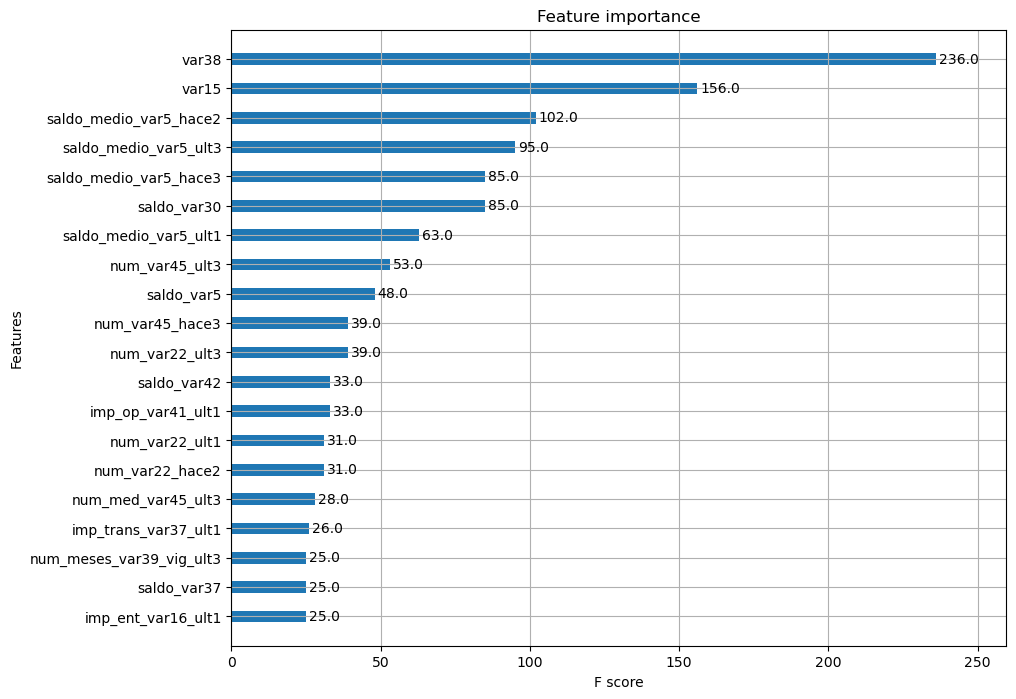

In [49]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

In [50]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc: 0.823733	valid_1's binary_logloss: 0.141592
[9]	training's a

[75]	training's auc: 0.928639	training's binary_logloss: 0.104167	valid_1's auc: 0.83094	valid_1's binary_logloss: 0.135819
[76]	training's auc: 0.928812	training's binary_logloss: 0.104032	valid_1's auc: 0.831078	valid_1's binary_logloss: 0.135819
[77]	training's auc: 0.929094	training's binary_logloss: 0.103841	valid_1's auc: 0.831173	valid_1's binary_logloss: 0.135831
[78]	training's auc: 0.929304	training's binary_logloss: 0.103661	valid_1's auc: 0.831108	valid_1's binary_logloss: 0.135854
[79]	training's auc: 0.929558	training's binary_logloss: 0.103444	valid_1's auc: 0.830932	valid_1's binary_logloss: 0.135942
[80]	training's auc: 0.930062	training's binary_logloss: 0.103185	valid_1's auc: 0.831212	valid_1's binary_logloss: 0.135846
[81]	training's auc: 0.93021	training's binary_logloss: 0.103035	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.13587
[82]	training's auc: 0.930873	training's binary_logloss: 0.102757	valid_1's auc: 0.831112	valid_1's binary_logloss: 0.135917
[83

ROC AUC: 0.8384


In [51]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves', 32, 64, 1),
                    'max_depth':hp.quniform('max_depth', 100, 160, 1),
                    'min_child_samples':hp.quniform('min_child_samples', 60, 100, 1),
                    'subsample': hp.uniform('subsample', 0.7, 1),
                    'learning_rate':hp.uniform('learning_rate', 0.01, 0.2)}

In [52]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100, 
                              num_leaves=int(search_space['num_leaves']),
                              max_depth=int(search_space['max_depth']),
                            min_child_samples=int(search_space['min_child_samples']),
                            subsample=search_space['subsample'],
                            learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [53]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

#fmin() 함수를 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
           max_evals=50, #최대 반복 휫수를 지정함.
           trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
[2]	training's auc: 0.828309	training's binary_logloss: 0.160269	valid_1's auc: 0.804585	valid_1's binary_logloss: 0.161866
[3]	training's auc: 0.833368	training's binary_logloss: 0.158478	valid_1's auc: 0.806871	valid_1's binary_logloss: 0.16038
[4]	training's auc: 0.834671	training's binary_logloss: 0.156852	valid_1's auc: 0.80706	valid_1's binary_logloss: 0.159053
[5]	training's auc: 0.837783	training's binary_logloss: 0.155354	valid_1's auc: 0.811645	valid_1's binary_logloss: 0.157793
[6]	training's auc: 0.839052	training's binary_logloss: 0.153966	valid_1's auc: 0.81271	valid_1's binary_logloss: 0.156635
[7]	training's auc: 0.841216	training's binary_logloss: 0.152691	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.155585
[8]	training's auc: 0.841859	training's binary_logloss: 0.151499	valid_1's auc: 0.814773	valid_1's binary_logloss: 0.154617
[9]	training

[67]	training's auc: 0.876733	training's binary_logloss: 0.126457	valid_1's auc: 0.829943	valid_1's binary_logloss: 0.137148
[68]	training's auc: 0.877004	training's binary_logloss: 0.126282	valid_1's auc: 0.829954	valid_1's binary_logloss: 0.137083
[69]	training's auc: 0.87756	training's binary_logloss: 0.1261	valid_1's auc: 0.830128	valid_1's binary_logloss: 0.137018
[70]	training's auc: 0.87797	training's binary_logloss: 0.12593	valid_1's auc: 0.830009	valid_1's binary_logloss: 0.136959
[71]	training's auc: 0.878271	training's binary_logloss: 0.125757	valid_1's auc: 0.83006	valid_1's binary_logloss: 0.136874
[72]	training's auc: 0.878636	training's binary_logloss: 0.125587	valid_1's auc: 0.830076	valid_1's binary_logloss: 0.136826
[73]	training's auc: 0.879184	training's binary_logloss: 0.125399	valid_1's auc: 0.830085	valid_1's binary_logloss: 0.136789
[74]	training's auc: 0.879469	training's binary_logloss: 0.125237	valid_1's auc: 0.830075	valid_1's binary_logloss: 0.136732
[75]	t

[33]	training's auc: 0.861233	training's binary_logloss: 0.137451	valid_1's auc: 0.835552	valid_1's binary_logloss: 0.137215
[34]	training's auc: 0.861685	training's binary_logloss: 0.137067	valid_1's auc: 0.835533	valid_1's binary_logloss: 0.136967
[35]	training's auc: 0.862184	training's binary_logloss: 0.136698	valid_1's auc: 0.835406	valid_1's binary_logloss: 0.136728
[36]	training's auc: 0.862667	training's binary_logloss: 0.136338	valid_1's auc: 0.835312	valid_1's binary_logloss: 0.136482
[37]	training's auc: 0.862991	training's binary_logloss: 0.135983	valid_1's auc: 0.835197	valid_1's binary_logloss: 0.136257
[38]	training's auc: 0.863528	training's binary_logloss: 0.135648	valid_1's auc: 0.835072	valid_1's binary_logloss: 0.136031
[39]	training's auc: 0.864036	training's binary_logloss: 0.135331	valid_1's auc: 0.834926	valid_1's binary_logloss: 0.135828
[40]	training's auc: 0.86419	training's binary_logloss: 0.135015	valid_1's auc: 0.834894	valid_1's binary_logloss: 0.135611
[

[37]	training's auc: 0.860114	training's binary_logloss: 0.133199	valid_1's auc: 0.832296	valid_1's binary_logloss: 0.142265
[38]	training's auc: 0.860777	training's binary_logloss: 0.132855	valid_1's auc: 0.832378	valid_1's binary_logloss: 0.142016
[39]	training's auc: 0.861056	training's binary_logloss: 0.132533	valid_1's auc: 0.832541	valid_1's binary_logloss: 0.141797
[40]	training's auc: 0.861747	training's binary_logloss: 0.132224	valid_1's auc: 0.832606	valid_1's binary_logloss: 0.141578
[41]	training's auc: 0.862158	training's binary_logloss: 0.131929	valid_1's auc: 0.832747	valid_1's binary_logloss: 0.141381
[42]	training's auc: 0.862803	training's binary_logloss: 0.131641	valid_1's auc: 0.8327	valid_1's binary_logloss: 0.141179
[43]	training's auc: 0.863343	training's binary_logloss: 0.131354	valid_1's auc: 0.832837	valid_1's binary_logloss: 0.140985
[44]	training's auc: 0.86388	training's binary_logloss: 0.131084	valid_1's auc: 0.832996	valid_1's binary_logloss: 0.14079
[45]

[3]	training's auc: 0.857571	training's binary_logloss: 0.141216	valid_1's auc: 0.821962	valid_1's binary_logloss: 0.147259
[4]	training's auc: 0.861358	training's binary_logloss: 0.137643	valid_1's auc: 0.824181	valid_1's binary_logloss: 0.144869
[5]	training's auc: 0.866559	training's binary_logloss: 0.134811	valid_1's auc: 0.825962	valid_1's binary_logloss: 0.14308
[6]	training's auc: 0.869278	training's binary_logloss: 0.132436	valid_1's auc: 0.827506	valid_1's binary_logloss: 0.141548
[7]	training's auc: 0.872721	training's binary_logloss: 0.130404	valid_1's auc: 0.829742	valid_1's binary_logloss: 0.1403
[8]	training's auc: 0.876014	training's binary_logloss: 0.128648	valid_1's auc: 0.830458	valid_1's binary_logloss: 0.139332
[9]	training's auc: 0.878333	training's binary_logloss: 0.127071	valid_1's auc: 0.829403	valid_1's binary_logloss: 0.138713
[10]	training's auc: 0.880574	training's binary_logloss: 0.125698	valid_1's auc: 0.829365	valid_1's binary_logloss: 0.138082
[11]	train

[31]	training's auc: 0.919457	training's binary_logloss: 0.110746	valid_1's auc: 0.833293	valid_1's binary_logloss: 0.131479
[32]	training's auc: 0.920976	training's binary_logloss: 0.110085	valid_1's auc: 0.833202	valid_1's binary_logloss: 0.131461
[33]	training's auc: 0.922191	training's binary_logloss: 0.109456	valid_1's auc: 0.83292	valid_1's binary_logloss: 0.13157
[34]	training's auc: 0.923352	training's binary_logloss: 0.108908	valid_1's auc: 0.833192	valid_1's binary_logloss: 0.131535
[35]	training's auc: 0.924442	training's binary_logloss: 0.108369	valid_1's auc: 0.83302	valid_1's binary_logloss: 0.131592
[36]	training's auc: 0.925529	training's binary_logloss: 0.107831	valid_1's auc: 0.833198	valid_1's binary_logloss: 0.1316
[37]	training's auc: 0.926386	training's binary_logloss: 0.107369	valid_1's auc: 0.833276	valid_1's binary_logloss: 0.131619
[38]	training's auc: 0.927671	training's binary_logloss: 0.106787	valid_1's auc: 0.832651	valid_1's binary_logloss: 0.131748
[39]	

[11]	training's auc: 0.866724	training's binary_logloss: 0.135202	valid_1's auc: 0.826482	valid_1's binary_logloss: 0.142771
[12]	training's auc: 0.867727	training's binary_logloss: 0.134076	valid_1's auc: 0.826391	valid_1's binary_logloss: 0.142056
[13]	training's auc: 0.868857	training's binary_logloss: 0.133027	valid_1's auc: 0.827342	valid_1's binary_logloss: 0.14137
[14]	training's auc: 0.869679	training's binary_logloss: 0.132059	valid_1's auc: 0.828518	valid_1's binary_logloss: 0.140793
[15]	training's auc: 0.871776	training's binary_logloss: 0.131133	valid_1's auc: 0.828835	valid_1's binary_logloss: 0.140221
[16]	training's auc: 0.873402	training's binary_logloss: 0.130227	valid_1's auc: 0.828737	valid_1's binary_logloss: 0.139779
[17]	training's auc: 0.874229	training's binary_logloss: 0.129462	valid_1's auc: 0.828419	valid_1's binary_logloss: 0.139356
[18]	training's auc: 0.87588	training's binary_logloss: 0.128723	valid_1's auc: 0.829012	valid_1's binary_logloss: 0.138981
[1

[26]	training's auc: 0.883555	training's binary_logloss: 0.125961	valid_1's auc: 0.835858	valid_1's binary_logloss: 0.13208
[27]	training's auc: 0.884369	training's binary_logloss: 0.125451	valid_1's auc: 0.835428	valid_1's binary_logloss: 0.131989
[28]	training's auc: 0.885377	training's binary_logloss: 0.124981	valid_1's auc: 0.835452	valid_1's binary_logloss: 0.13185
[29]	training's auc: 0.886205	training's binary_logloss: 0.124531	valid_1's auc: 0.835686	valid_1's binary_logloss: 0.131779
[30]	training's auc: 0.88734	training's binary_logloss: 0.124051	valid_1's auc: 0.835626	valid_1's binary_logloss: 0.131672
[31]	training's auc: 0.888378	training's binary_logloss: 0.123597	valid_1's auc: 0.835459	valid_1's binary_logloss: 0.131575
[32]	training's auc: 0.889141	training's binary_logloss: 0.123168	valid_1's auc: 0.835337	valid_1's binary_logloss: 0.131481
[33]	training's auc: 0.890503	training's binary_logloss: 0.122676	valid_1's auc: 0.835828	valid_1's binary_logloss: 0.131353
[34

[15]	training's auc: 0.870787	training's binary_logloss: 0.130412	valid_1's auc: 0.833385	valid_1's binary_logloss: 0.141562
[16]	training's auc: 0.872187	training's binary_logloss: 0.129556	valid_1's auc: 0.833836	valid_1's binary_logloss: 0.14104
[17]	training's auc: 0.873878	training's binary_logloss: 0.128734	valid_1's auc: 0.833716	valid_1's binary_logloss: 0.140595
[18]	training's auc: 0.875359	training's binary_logloss: 0.127992	valid_1's auc: 0.833411	valid_1's binary_logloss: 0.140234
[19]	training's auc: 0.876113	training's binary_logloss: 0.127288	valid_1's auc: 0.833284	valid_1's binary_logloss: 0.139824
[20]	training's auc: 0.877678	training's binary_logloss: 0.126614	valid_1's auc: 0.833206	valid_1's binary_logloss: 0.139496
[21]	training's auc: 0.878755	training's binary_logloss: 0.12599	valid_1's auc: 0.833572	valid_1's binary_logloss: 0.139197
[22]	training's auc: 0.880075	training's binary_logloss: 0.1254	valid_1's auc: 0.833969	valid_1's binary_logloss: 0.138896
[23]

[14]	training's auc: 0.890059	training's binary_logloss: 0.123227	valid_1's auc: 0.830436	valid_1's binary_logloss: 0.137538
[15]	training's auc: 0.891713	training's binary_logloss: 0.122226	valid_1's auc: 0.830818	valid_1's binary_logloss: 0.137184
[16]	training's auc: 0.893516	training's binary_logloss: 0.121235	valid_1's auc: 0.830464	valid_1's binary_logloss: 0.13693
[17]	training's auc: 0.895019	training's binary_logloss: 0.120398	valid_1's auc: 0.830395	valid_1's binary_logloss: 0.136689
[18]	training's auc: 0.896393	training's binary_logloss: 0.119543	valid_1's auc: 0.830449	valid_1's binary_logloss: 0.136483
[19]	training's auc: 0.898371	training's binary_logloss: 0.118692	valid_1's auc: 0.830502	valid_1's binary_logloss: 0.136345
[20]	training's auc: 0.899855	training's binary_logloss: 0.117874	valid_1's auc: 0.830403	valid_1's binary_logloss: 0.136187
[21]	training's auc: 0.901394	training's binary_logloss: 0.117116	valid_1's auc: 0.830714	valid_1's binary_logloss: 0.136121
[

[35]	training's auc: 0.921734	training's binary_logloss: 0.110441	valid_1's auc: 0.835693	valid_1's binary_logloss: 0.130913
[36]	training's auc: 0.922725	training's binary_logloss: 0.109981	valid_1's auc: 0.835988	valid_1's binary_logloss: 0.130903
[37]	training's auc: 0.923614	training's binary_logloss: 0.109511	valid_1's auc: 0.836087	valid_1's binary_logloss: 0.130896
[38]	training's auc: 0.92456	training's binary_logloss: 0.108961	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.130846
[39]	training's auc: 0.925592	training's binary_logloss: 0.108407	valid_1's auc: 0.836248	valid_1's binary_logloss: 0.130918
[40]	training's auc: 0.927027	training's binary_logloss: 0.107937	valid_1's auc: 0.836285	valid_1's binary_logloss: 0.130935
[41]	training's auc: 0.928155	training's binary_logloss: 0.107421	valid_1's auc: 0.836204	valid_1's binary_logloss: 0.13101
[42]	training's auc: 0.929254	training's binary_logloss: 0.107009	valid_1's auc: 0.83641	valid_1's binary_logloss: 0.131004
[43

[33]	training's auc: 0.92018	training's binary_logloss: 0.108635	valid_1's auc: 0.830949	valid_1's binary_logloss: 0.137868
[34]	training's auc: 0.921154	training's binary_logloss: 0.108126	valid_1's auc: 0.830809	valid_1's binary_logloss: 0.1379
[35]	training's auc: 0.922308	training's binary_logloss: 0.10761	valid_1's auc: 0.830572	valid_1's binary_logloss: 0.137993
[36]	training's auc: 0.92335	training's binary_logloss: 0.107086	valid_1's auc: 0.830485	valid_1's binary_logloss: 0.138088
[37]	training's auc: 0.924123	training's binary_logloss: 0.106642	valid_1's auc: 0.830352	valid_1's binary_logloss: 0.138118
[38]	training's auc: 0.925419	training's binary_logloss: 0.106024	valid_1's auc: 0.830329	valid_1's binary_logloss: 0.138115
[39]	training's auc: 0.926376	training's binary_logloss: 0.105532	valid_1's auc: 0.83017	valid_1's binary_logloss: 0.13815
[40]	training's auc: 0.927183	training's binary_logloss: 0.105062	valid_1's auc: 0.830094	valid_1's binary_logloss: 0.138177
[41]	tr

[56]	training's auc: 0.912095	training's binary_logloss: 0.11291	valid_1's auc: 0.831671	valid_1's binary_logloss: 0.135781
[57]	training's auc: 0.912912	training's binary_logloss: 0.112658	valid_1's auc: 0.831506	valid_1's binary_logloss: 0.135827
[58]	training's auc: 0.913958	training's binary_logloss: 0.112376	valid_1's auc: 0.831715	valid_1's binary_logloss: 0.135773
[59]	training's auc: 0.914933	training's binary_logloss: 0.112104	valid_1's auc: 0.831406	valid_1's binary_logloss: 0.135814
[60]	training's auc: 0.915637	training's binary_logloss: 0.111815	valid_1's auc: 0.831772	valid_1's binary_logloss: 0.135756
[61]	training's auc: 0.916195	training's binary_logloss: 0.111549	valid_1's auc: 0.831528	valid_1's binary_logloss: 0.135812
[62]	training's auc: 0.91674	training's binary_logloss: 0.111306	valid_1's auc: 0.831629	valid_1's binary_logloss: 0.135825
[63]	training's auc: 0.917258	training's binary_logloss: 0.11104	valid_1's auc: 0.831267	valid_1's binary_logloss: 0.135857
[64

[46]	training's auc: 0.902133	training's binary_logloss: 0.118038	valid_1's auc: 0.835118	valid_1's binary_logloss: 0.130885
[47]	training's auc: 0.902916	training's binary_logloss: 0.117721	valid_1's auc: 0.83511	valid_1's binary_logloss: 0.130861
[48]	training's auc: 0.904234	training's binary_logloss: 0.11738	valid_1's auc: 0.834959	valid_1's binary_logloss: 0.130852
[49]	training's auc: 0.905067	training's binary_logloss: 0.117052	valid_1's auc: 0.835006	valid_1's binary_logloss: 0.130818
[50]	training's auc: 0.905954	training's binary_logloss: 0.116734	valid_1's auc: 0.834946	valid_1's binary_logloss: 0.130796
[51]	training's auc: 0.906778	training's binary_logloss: 0.116397	valid_1's auc: 0.834779	valid_1's binary_logloss: 0.130799
[52]	training's auc: 0.907657	training's binary_logloss: 0.116071	valid_1's auc: 0.834714	valid_1's binary_logloss: 0.130799
[53]	training's auc: 0.908605	training's binary_logloss: 0.115737	valid_1's auc: 0.834777	valid_1's binary_logloss: 0.13078
[54

[36]	training's auc: 0.894942	training's binary_logloss: 0.119389	valid_1's auc: 0.835782	valid_1's binary_logloss: 0.137081
[37]	training's auc: 0.895899	training's binary_logloss: 0.118953	valid_1's auc: 0.83566	valid_1's binary_logloss: 0.137042
[38]	training's auc: 0.896639	training's binary_logloss: 0.118562	valid_1's auc: 0.835925	valid_1's binary_logloss: 0.136958
[39]	training's auc: 0.897551	training's binary_logloss: 0.118156	valid_1's auc: 0.83598	valid_1's binary_logloss: 0.136873
[40]	training's auc: 0.89831	training's binary_logloss: 0.117766	valid_1's auc: 0.836001	valid_1's binary_logloss: 0.136846
[41]	training's auc: 0.898924	training's binary_logloss: 0.117422	valid_1's auc: 0.836077	valid_1's binary_logloss: 0.136814
[42]	training's auc: 0.899911	training's binary_logloss: 0.117038	valid_1's auc: 0.836017	valid_1's binary_logloss: 0.136763
[43]	training's auc: 0.900757	training's binary_logloss: 0.116663	valid_1's auc: 0.835591	valid_1's binary_logloss: 0.13673
[44]

[46]	training's auc: 0.860995	training's binary_logloss: 0.137651	valid_1's auc: 0.827496	valid_1's binary_logloss: 0.143884
[47]	training's auc: 0.861157	training's binary_logloss: 0.137373	valid_1's auc: 0.827506	valid_1's binary_logloss: 0.143694
[48]	training's auc: 0.861306	training's binary_logloss: 0.137105	valid_1's auc: 0.827611	valid_1's binary_logloss: 0.143509
[49]	training's auc: 0.862654	training's binary_logloss: 0.136845	valid_1's auc: 0.828028	valid_1's binary_logloss: 0.143328
[50]	training's auc: 0.863124	training's binary_logloss: 0.136579	valid_1's auc: 0.828129	valid_1's binary_logloss: 0.143132
[51]	training's auc: 0.863258	training's binary_logloss: 0.136329	valid_1's auc: 0.828013	valid_1's binary_logloss: 0.142958
[52]	training's auc: 0.863443	training's binary_logloss: 0.136087	valid_1's auc: 0.827943	valid_1's binary_logloss: 0.142791
[53]	training's auc: 0.863544	training's binary_logloss: 0.135848	valid_1's auc: 0.827915	valid_1's binary_logloss: 0.142631


[12]	training's auc: 0.843518	training's binary_logloss: 0.155235	valid_1's auc: 0.82606	valid_1's binary_logloss: 0.150967
[13]	training's auc: 0.844045	training's binary_logloss: 0.154527	valid_1's auc: 0.826781	valid_1's binary_logloss: 0.15037
[14]	training's auc: 0.844276	training's binary_logloss: 0.153839	valid_1's auc: 0.826955	valid_1's binary_logloss: 0.149806
[15]	training's auc: 0.844635	training's binary_logloss: 0.153195	valid_1's auc: 0.827197	valid_1's binary_logloss: 0.149259
[16]	training's auc: 0.844904	training's binary_logloss: 0.152548	valid_1's auc: 0.827632	valid_1's binary_logloss: 0.148736
[17]	training's auc: 0.845145	training's binary_logloss: 0.151928	valid_1's auc: 0.827523	valid_1's binary_logloss: 0.148253
[18]	training's auc: 0.845745	training's binary_logloss: 0.151341	valid_1's auc: 0.828006	valid_1's binary_logloss: 0.147766
[19]	training's auc: 0.849146	training's binary_logloss: 0.150763	valid_1's auc: 0.830522	valid_1's binary_logloss: 0.147314
[2

[78]	training's auc: 0.868995	training's binary_logloss: 0.13308	valid_1's auc: 0.835098	valid_1's binary_logloss: 0.134695
[79]	training's auc: 0.869219	training's binary_logloss: 0.132915	valid_1's auc: 0.835276	valid_1's binary_logloss: 0.134608
[80]	training's auc: 0.86948	training's binary_logloss: 0.132752	valid_1's auc: 0.835167	valid_1's binary_logloss: 0.134517
[81]	training's auc: 0.869589	training's binary_logloss: 0.132596	valid_1's auc: 0.835196	valid_1's binary_logloss: 0.134429
[82]	training's auc: 0.869892	training's binary_logloss: 0.132436	valid_1's auc: 0.835233	valid_1's binary_logloss: 0.13434
[83]	training's auc: 0.870122	training's binary_logloss: 0.132279	valid_1's auc: 0.835381	valid_1's binary_logloss: 0.134252
[84]	training's auc: 0.870441	training's binary_logloss: 0.132114	valid_1's auc: 0.835472	valid_1's binary_logloss: 0.134169
[85]	training's auc: 0.870674	training's binary_logloss: 0.131962	valid_1's auc: 0.835482	valid_1's binary_logloss: 0.13409
[86]

[56]	training's auc: 0.860822	training's binary_logloss: 0.134441	valid_1's auc: 0.832091	valid_1's binary_logloss: 0.143582
[57]	training's auc: 0.861065	training's binary_logloss: 0.134215	valid_1's auc: 0.832098	valid_1's binary_logloss: 0.143426
[58]	training's auc: 0.861314	training's binary_logloss: 0.133992	valid_1's auc: 0.832017	valid_1's binary_logloss: 0.143279
[59]	training's auc: 0.861409	training's binary_logloss: 0.133787	valid_1's auc: 0.831984	valid_1's binary_logloss: 0.143135
[60]	training's auc: 0.86175	training's binary_logloss: 0.133566	valid_1's auc: 0.83195	valid_1's binary_logloss: 0.142988
[61]	training's auc: 0.862234	training's binary_logloss: 0.133358	valid_1's auc: 0.832038	valid_1's binary_logloss: 0.142844
[62]	training's auc: 0.862566	training's binary_logloss: 0.133152	valid_1's auc: 0.83196	valid_1's binary_logloss: 0.142712
[63]	training's auc: 0.862948	training's binary_logloss: 0.132949	valid_1's auc: 0.832049	valid_1's binary_logloss: 0.142568
[64

[22]	training's auc: 0.897683	training's binary_logloss: 0.117268	valid_1's auc: 0.827538	valid_1's binary_logloss: 0.136558
[23]	training's auc: 0.899243	training's binary_logloss: 0.116666	valid_1's auc: 0.827306	valid_1's binary_logloss: 0.136568
[24]	training's auc: 0.9005	training's binary_logloss: 0.116062	valid_1's auc: 0.826949	valid_1's binary_logloss: 0.136727
[25]	training's auc: 0.902419	training's binary_logloss: 0.115478	valid_1's auc: 0.827003	valid_1's binary_logloss: 0.136703
[26]	training's auc: 0.90375	training's binary_logloss: 0.114982	valid_1's auc: 0.826605	valid_1's binary_logloss: 0.136763
[27]	training's auc: 0.904738	training's binary_logloss: 0.114462	valid_1's auc: 0.826339	valid_1's binary_logloss: 0.136903
[28]	training's auc: 0.906	training's binary_logloss: 0.114069	valid_1's auc: 0.826175	valid_1's binary_logloss: 0.136961
[29]	training's auc: 0.907135	training's binary_logloss: 0.113573	valid_1's auc: 0.826213	valid_1's binary_logloss: 0.137026
[30]	t

[44]	training's auc: 0.920743	training's binary_logloss: 0.109091	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.131944
[45]	training's auc: 0.921329	training's binary_logloss: 0.10875	valid_1's auc: 0.831889	valid_1's binary_logloss: 0.132006
[46]	training's auc: 0.921993	training's binary_logloss: 0.108389	valid_1's auc: 0.831856	valid_1's binary_logloss: 0.132077
[47]	training's auc: 0.922901	training's binary_logloss: 0.10802	valid_1's auc: 0.831239	valid_1's binary_logloss: 0.132202
[48]	training's auc: 0.923647	training's binary_logloss: 0.10765	valid_1's auc: 0.830831	valid_1's binary_logloss: 0.132279
[49]	training's auc: 0.924488	training's binary_logloss: 0.107374	valid_1's auc: 0.830908	valid_1's binary_logloss: 0.132289
[50]	training's auc: 0.925247	training's binary_logloss: 0.107031	valid_1's auc: 0.83047	valid_1's binary_logloss: 0.132387
[51]	training's auc: 0.925945	training's binary_logloss: 0.106646	valid_1's auc: 0.8304	valid_1's binary_logloss: 0.132431
[52]	t

[13]	training's auc: 0.8988	training's binary_logloss: 0.118075	valid_1's auc: 0.829211	valid_1's binary_logloss: 0.136698
[14]	training's auc: 0.90137	training's binary_logloss: 0.116934	valid_1's auc: 0.829732	valid_1's binary_logloss: 0.136524
[15]	training's auc: 0.903799	training's binary_logloss: 0.115785	valid_1's auc: 0.828987	valid_1's binary_logloss: 0.136488
[16]	training's auc: 0.906361	training's binary_logloss: 0.114701	valid_1's auc: 0.828262	valid_1's binary_logloss: 0.136552
[17]	training's auc: 0.909637	training's binary_logloss: 0.113633	valid_1's auc: 0.827859	valid_1's binary_logloss: 0.136642
[18]	training's auc: 0.911526	training's binary_logloss: 0.112789	valid_1's auc: 0.827698	valid_1's binary_logloss: 0.136609
[19]	training's auc: 0.913876	training's binary_logloss: 0.111814	valid_1's auc: 0.827916	valid_1's binary_logloss: 0.136588
[20]	training's auc: 0.915169	training's binary_logloss: 0.111004	valid_1's auc: 0.827601	valid_1's binary_logloss: 0.136679
[21

[5]	training's auc: 0.868512	training's binary_logloss: 0.130712	valid_1's auc: 0.827427	valid_1's binary_logloss: 0.142941
[6]	training's auc: 0.873325	training's binary_logloss: 0.128304	valid_1's auc: 0.829335	valid_1's binary_logloss: 0.141472
[7]	training's auc: 0.876611	training's binary_logloss: 0.126286	valid_1's auc: 0.83015	valid_1's binary_logloss: 0.140432
[8]	training's auc: 0.879634	training's binary_logloss: 0.124469	valid_1's auc: 0.82917	valid_1's binary_logloss: 0.139821
[9]	training's auc: 0.885213	training's binary_logloss: 0.122814	valid_1's auc: 0.831606	valid_1's binary_logloss: 0.139245
[10]	training's auc: 0.888474	training's binary_logloss: 0.121393	valid_1's auc: 0.831905	valid_1's binary_logloss: 0.13881
[11]	training's auc: 0.892631	training's binary_logloss: 0.119808	valid_1's auc: 0.830839	valid_1's binary_logloss: 0.138632
[12]	training's auc: 0.89636	training's binary_logloss: 0.11844	valid_1's auc: 0.830213	valid_1's binary_logloss: 0.138487
[13]	train

[31]	training's auc: 0.906008	training's binary_logloss: 0.114097	valid_1's auc: 0.826641	valid_1's binary_logloss: 0.13662
[32]	training's auc: 0.907268	training's binary_logloss: 0.113642	valid_1's auc: 0.826709	valid_1's binary_logloss: 0.136689
[33]	training's auc: 0.908689	training's binary_logloss: 0.113109	valid_1's auc: 0.826764	valid_1's binary_logloss: 0.136693
[34]	training's auc: 0.909375	training's binary_logloss: 0.112734	valid_1's auc: 0.826165	valid_1's binary_logloss: 0.136828
[35]	training's auc: 0.910191	training's binary_logloss: 0.112353	valid_1's auc: 0.82612	valid_1's binary_logloss: 0.136922
[36]	training's auc: 0.911047	training's binary_logloss: 0.112016	valid_1's auc: 0.825729	valid_1's binary_logloss: 0.137028
[37]	training's auc: 0.912307	training's binary_logloss: 0.111554	valid_1's auc: 0.825494	valid_1's binary_logloss: 0.137132
[38]	training's auc: 0.913453	training's binary_logloss: 0.111214	valid_1's auc: 0.825892	valid_1's binary_logloss: 0.137105
[3

[51]	training's auc: 0.920884	training's binary_logloss: 0.109125	valid_1's auc: 0.830677	valid_1's binary_logloss: 0.132121
[52]	training's auc: 0.921404	training's binary_logloss: 0.108847	valid_1's auc: 0.830604	valid_1's binary_logloss: 0.132146
[53]	training's auc: 0.922258	training's binary_logloss: 0.108444	valid_1's auc: 0.830768	valid_1's binary_logloss: 0.132094
[54]	training's auc: 0.922811	training's binary_logloss: 0.108136	valid_1's auc: 0.830383	valid_1's binary_logloss: 0.13219
[55]	training's auc: 0.923652	training's binary_logloss: 0.107688	valid_1's auc: 0.830315	valid_1's binary_logloss: 0.132215
[56]	training's auc: 0.924434	training's binary_logloss: 0.107308	valid_1's auc: 0.829827	valid_1's binary_logloss: 0.132338
[1]	training's auc: 0.827379	training's binary_logloss: 0.151464	valid_1's auc: 0.809232	valid_1's binary_logloss: 0.157783
[2]	training's auc: 0.837603	training's binary_logloss: 0.145299	valid_1's auc: 0.818267	valid_1's binary_logloss: 0.151836
[3]

[15]	training's auc: 0.875591	training's binary_logloss: 0.129843	valid_1's auc: 0.828626	valid_1's binary_logloss: 0.139668
[16]	training's auc: 0.876932	training's binary_logloss: 0.128997	valid_1's auc: 0.828793	valid_1's binary_logloss: 0.13927
[17]	training's auc: 0.878463	training's binary_logloss: 0.128166	valid_1's auc: 0.829078	valid_1's binary_logloss: 0.138852
[18]	training's auc: 0.879282	training's binary_logloss: 0.12744	valid_1's auc: 0.828832	valid_1's binary_logloss: 0.138563
[19]	training's auc: 0.881394	training's binary_logloss: 0.126651	valid_1's auc: 0.829682	valid_1's binary_logloss: 0.13815
[20]	training's auc: 0.882633	training's binary_logloss: 0.125917	valid_1's auc: 0.830246	valid_1's binary_logloss: 0.137868
[21]	training's auc: 0.884037	training's binary_logloss: 0.125206	valid_1's auc: 0.830596	valid_1's binary_logloss: 0.137648
[22]	training's auc: 0.885418	training's binary_logloss: 0.124544	valid_1's auc: 0.830597	valid_1's binary_logloss: 0.137402
[23

[26]	training's auc: 0.88842	training's binary_logloss: 0.12415	valid_1's auc: 0.835995	valid_1's binary_logloss: 0.131846
[27]	training's auc: 0.889468	training's binary_logloss: 0.123587	valid_1's auc: 0.836043	valid_1's binary_logloss: 0.131686
[28]	training's auc: 0.890527	training's binary_logloss: 0.123052	valid_1's auc: 0.836403	valid_1's binary_logloss: 0.131517
[29]	training's auc: 0.891395	training's binary_logloss: 0.122542	valid_1's auc: 0.836749	valid_1's binary_logloss: 0.131362
[30]	training's auc: 0.892793	training's binary_logloss: 0.122017	valid_1's auc: 0.836602	valid_1's binary_logloss: 0.131275
[31]	training's auc: 0.893535	training's binary_logloss: 0.121566	valid_1's auc: 0.836616	valid_1's binary_logloss: 0.131164
[32]	training's auc: 0.894407	training's binary_logloss: 0.121095	valid_1's auc: 0.836324	valid_1's binary_logloss: 0.131106
[33]	training's auc: 0.895623	training's binary_logloss: 0.120668	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.131005
[3

[33]	training's auc: 0.897962	training's binary_logloss: 0.118088	valid_1's auc: 0.835924	valid_1's binary_logloss: 0.136914
[34]	training's auc: 0.898678	training's binary_logloss: 0.117669	valid_1's auc: 0.836124	valid_1's binary_logloss: 0.136852
[35]	training's auc: 0.899652	training's binary_logloss: 0.117258	valid_1's auc: 0.836234	valid_1's binary_logloss: 0.136769
[36]	training's auc: 0.900884	training's binary_logloss: 0.116854	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.136736
[37]	training's auc: 0.901789	training's binary_logloss: 0.116402	valid_1's auc: 0.83544	valid_1's binary_logloss: 0.136782
[38]	training's auc: 0.902564	training's binary_logloss: 0.116	valid_1's auc: 0.835279	valid_1's binary_logloss: 0.136786
[39]	training's auc: 0.903399	training's binary_logloss: 0.115643	valid_1's auc: 0.835045	valid_1's binary_logloss: 0.136819
[40]	training's auc: 0.904297	training's binary_logloss: 0.115252	valid_1's auc: 0.834875	valid_1's binary_logloss: 0.13685
[41]	

[40]	training's auc: 0.947214	training's binary_logloss: 0.0930854	valid_1's auc: 0.813558	valid_1's binary_logloss: 0.142555
[41]	training's auc: 0.948082	training's binary_logloss: 0.0927413	valid_1's auc: 0.812895	valid_1's binary_logloss: 0.142863
[42]	training's auc: 0.948926	training's binary_logloss: 0.092179	valid_1's auc: 0.812262	valid_1's binary_logloss: 0.143171
[1]	training's auc: 0.837661	training's binary_logloss: 0.148983	valid_1's auc: 0.819796	valid_1's binary_logloss: 0.147155
[2]	training's auc: 0.855164	training's binary_logloss: 0.141602	valid_1's auc: 0.827475	valid_1's binary_logloss: 0.142331
[3]	training's auc: 0.864368	training's binary_logloss: 0.136425	valid_1's auc: 0.829094	valid_1's binary_logloss: 0.139252
[4]	training's auc: 0.871483	training's binary_logloss: 0.132698	valid_1's auc: 0.828493	valid_1's binary_logloss: 0.13743
[5]	training's auc: 0.877055	training's binary_logloss: 0.129612	valid_1's auc: 0.828273	valid_1's binary_logloss: 0.136125
[6]	

[26]	training's auc: 0.93636	training's binary_logloss: 0.0993339	valid_1's auc: 0.823203	valid_1's binary_logloss: 0.141204
[27]	training's auc: 0.937477	training's binary_logloss: 0.0986461	valid_1's auc: 0.823284	valid_1's binary_logloss: 0.141269
[28]	training's auc: 0.93849	training's binary_logloss: 0.0978743	valid_1's auc: 0.823423	valid_1's binary_logloss: 0.141338
[29]	training's auc: 0.939495	training's binary_logloss: 0.0972521	valid_1's auc: 0.822681	valid_1's binary_logloss: 0.141538
[30]	training's auc: 0.940733	training's binary_logloss: 0.0964709	valid_1's auc: 0.822518	valid_1's binary_logloss: 0.141701
[31]	training's auc: 0.941281	training's binary_logloss: 0.0959181	valid_1's auc: 0.821721	valid_1's binary_logloss: 0.141948
[32]	training's auc: 0.94255	training's binary_logloss: 0.0953108	valid_1's auc: 0.821814	valid_1's binary_logloss: 0.142075
[33]	training's auc: 0.943488	training's binary_logloss: 0.0947511	valid_1's auc: 0.821667	valid_1's binary_logloss: 0.14

[52]	training's auc: 0.916171	training's binary_logloss: 0.111455	valid_1's auc: 0.828834	valid_1's binary_logloss: 0.136351
[53]	training's auc: 0.916928	training's binary_logloss: 0.111142	valid_1's auc: 0.828938	valid_1's binary_logloss: 0.136341
[54]	training's auc: 0.91771	training's binary_logloss: 0.110869	valid_1's auc: 0.82886	valid_1's binary_logloss: 0.136377
[1]	training's auc: 0.839164	training's binary_logloss: 0.161062	valid_1's auc: 0.819765	valid_1's binary_logloss: 0.156089
[2]	training's auc: 0.844855	training's binary_logloss: 0.156695	valid_1's auc: 0.822073	valid_1's binary_logloss: 0.152549
[3]	training's auc: 0.849887	training's binary_logloss: 0.153062	valid_1's auc: 0.824329	valid_1's binary_logloss: 0.14985
[4]	training's auc: 0.856036	training's binary_logloss: 0.150104	valid_1's auc: 0.829805	valid_1's binary_logloss: 0.147525
[5]	training's auc: 0.860812	training's binary_logloss: 0.147551	valid_1's auc: 0.832349	valid_1's binary_logloss: 0.145585
[6]	trai

[21]	training's auc: 0.884061	training's binary_logloss: 0.125225	valid_1's auc: 0.833519	valid_1's binary_logloss: 0.139787
[22]	training's auc: 0.885099	training's binary_logloss: 0.124561	valid_1's auc: 0.833313	valid_1's binary_logloss: 0.139536
[23]	training's auc: 0.887094	training's binary_logloss: 0.123891	valid_1's auc: 0.833856	valid_1's binary_logloss: 0.139241
[24]	training's auc: 0.888172	training's binary_logloss: 0.12331	valid_1's auc: 0.833748	valid_1's binary_logloss: 0.138983
[25]	training's auc: 0.889512	training's binary_logloss: 0.122727	valid_1's auc: 0.834045	valid_1's binary_logloss: 0.138739
[26]	training's auc: 0.890779	training's binary_logloss: 0.122156	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.138485
[27]	training's auc: 0.892263	training's binary_logloss: 0.121547	valid_1's auc: 0.834273	valid_1's binary_logloss: 0.138327
[28]	training's auc: 0.893542	training's binary_logloss: 0.120984	valid_1's auc: 0.834404	valid_1's binary_logloss: 0.138149
[

[24]	training's auc: 0.914328	training's binary_logloss: 0.11006	valid_1's auc: 0.823959	valid_1's binary_logloss: 0.137943
[25]	training's auc: 0.915882	training's binary_logloss: 0.109317	valid_1's auc: 0.824057	valid_1's binary_logloss: 0.137937
[26]	training's auc: 0.91706	training's binary_logloss: 0.108727	valid_1's auc: 0.823678	valid_1's binary_logloss: 0.138062
[27]	training's auc: 0.917784	training's binary_logloss: 0.108271	valid_1's auc: 0.822793	valid_1's binary_logloss: 0.138273
[28]	training's auc: 0.918594	training's binary_logloss: 0.107816	valid_1's auc: 0.822298	valid_1's binary_logloss: 0.138435
[29]	training's auc: 0.919299	training's binary_logloss: 0.107342	valid_1's auc: 0.822118	valid_1's binary_logloss: 0.138515
[30]	training's auc: 0.919962	training's binary_logloss: 0.106895	valid_1's auc: 0.821974	valid_1's binary_logloss: 0.138619
[31]	training's auc: 0.922461	training's binary_logloss: 0.106189	valid_1's auc: 0.821588	valid_1's binary_logloss: 0.138698
[3

[47]	training's auc: 0.933942	training's binary_logloss: 0.101041	valid_1's auc: 0.831454	valid_1's binary_logloss: 0.133118
[48]	training's auc: 0.934431	training's binary_logloss: 0.100738	valid_1's auc: 0.83102	valid_1's binary_logloss: 0.133327
[49]	training's auc: 0.935467	training's binary_logloss: 0.100253	valid_1's auc: 0.830414	valid_1's binary_logloss: 0.133494
[1]	training's auc: 0.828959	training's binary_logloss: 0.147207	valid_1's auc: 0.805905	valid_1's binary_logloss: 0.15472
[2]	training's auc: 0.845243	training's binary_logloss: 0.140488	valid_1's auc: 0.821103	valid_1's binary_logloss: 0.148964
[3]	training's auc: 0.852674	training's binary_logloss: 0.135758	valid_1's auc: 0.824989	valid_1's binary_logloss: 0.145528
[4]	training's auc: 0.85898	training's binary_logloss: 0.132421	valid_1's auc: 0.826375	valid_1's binary_logloss: 0.143102
[5]	training's auc: 0.862124	training's binary_logloss: 0.129982	valid_1's auc: 0.827978	valid_1's binary_logloss: 0.141678
[6]	trai

[22]	training's auc: 0.877563	training's binary_logloss: 0.129375	valid_1's auc: 0.828821	valid_1's binary_logloss: 0.139641
[23]	training's auc: 0.878932	training's binary_logloss: 0.128747	valid_1's auc: 0.82913	valid_1's binary_logloss: 0.139314
[24]	training's auc: 0.880366	training's binary_logloss: 0.128146	valid_1's auc: 0.829327	valid_1's binary_logloss: 0.139046
[25]	training's auc: 0.880977	training's binary_logloss: 0.127602	valid_1's auc: 0.829307	valid_1's binary_logloss: 0.138842
[26]	training's auc: 0.881891	training's binary_logloss: 0.127038	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.138527
[27]	training's auc: 0.882902	training's binary_logloss: 0.126527	valid_1's auc: 0.829845	valid_1's binary_logloss: 0.138313
[28]	training's auc: 0.884438	training's binary_logloss: 0.125994	valid_1's auc: 0.83052	valid_1's binary_logloss: 0.138056
[29]	training's auc: 0.885134	training's binary_logloss: 0.125485	valid_1's auc: 0.830643	valid_1's binary_logloss: 0.137864
[3

[26]	training's auc: 0.878416	training's binary_logloss: 0.129425	valid_1's auc: 0.835134	valid_1's binary_logloss: 0.133824
[27]	training's auc: 0.879388	training's binary_logloss: 0.128875	valid_1's auc: 0.835062	valid_1's binary_logloss: 0.13361
[28]	training's auc: 0.880407	training's binary_logloss: 0.128339	valid_1's auc: 0.835316	valid_1's binary_logloss: 0.133386
[29]	training's auc: 0.881346	training's binary_logloss: 0.12783	valid_1's auc: 0.835115	valid_1's binary_logloss: 0.133192
[30]	training's auc: 0.882112	training's binary_logloss: 0.127346	valid_1's auc: 0.835289	valid_1's binary_logloss: 0.132988
[31]	training's auc: 0.882696	training's binary_logloss: 0.126901	valid_1's auc: 0.835184	valid_1's binary_logloss: 0.132809
[32]	training's auc: 0.883522	training's binary_logloss: 0.126476	valid_1's auc: 0.835358	valid_1's binary_logloss: 0.13266
[33]	training's auc: 0.884313	training's binary_logloss: 0.126041	valid_1's auc: 0.834945	valid_1's binary_logloss: 0.132541
[34

[47]	training's auc: 0.898232	training's binary_logloss: 0.117858	valid_1's auc: 0.836528	valid_1's binary_logloss: 0.136847
[48]	training's auc: 0.898999	training's binary_logloss: 0.117524	valid_1's auc: 0.836762	valid_1's binary_logloss: 0.136776
[49]	training's auc: 0.899627	training's binary_logloss: 0.117231	valid_1's auc: 0.836838	valid_1's binary_logloss: 0.136736
[50]	training's auc: 0.90011	training's binary_logloss: 0.116932	valid_1's auc: 0.836522	valid_1's binary_logloss: 0.136735
[51]	training's auc: 0.900672	training's binary_logloss: 0.116651	valid_1's auc: 0.836426	valid_1's binary_logloss: 0.136705
[52]	training's auc: 0.901396	training's binary_logloss: 0.116357	valid_1's auc: 0.836501	valid_1's binary_logloss: 0.13664
[53]	training's auc: 0.901921	training's binary_logloss: 0.116079	valid_1's auc: 0.836306	valid_1's binary_logloss: 0.136631
[54]	training's auc: 0.902451	training's binary_logloss: 0.115796	valid_1's auc: 0.836098	valid_1's binary_logloss: 0.136614
[5

[34]	training's auc: 0.901867	training's binary_logloss: 0.115075	valid_1's auc: 0.829021	valid_1's binary_logloss: 0.136306
[35]	training's auc: 0.90279	training's binary_logloss: 0.114695	valid_1's auc: 0.829203	valid_1's binary_logloss: 0.136284
[36]	training's auc: 0.903742	training's binary_logloss: 0.114308	valid_1's auc: 0.828624	valid_1's binary_logloss: 0.136453
[37]	training's auc: 0.904528	training's binary_logloss: 0.113961	valid_1's auc: 0.82862	valid_1's binary_logloss: 0.13648
[38]	training's auc: 0.905602	training's binary_logloss: 0.113532	valid_1's auc: 0.828015	valid_1's binary_logloss: 0.1366
[39]	training's auc: 0.906513	training's binary_logloss: 0.113175	valid_1's auc: 0.827865	valid_1's binary_logloss: 0.136639
[40]	training's auc: 0.907639	training's binary_logloss: 0.112776	valid_1's auc: 0.827574	valid_1's binary_logloss: 0.136747
[41]	training's auc: 0.908286	training's binary_logloss: 0.11244	valid_1's auc: 0.827602	valid_1's binary_logloss: 0.136791
[42]	t

[2]	training's auc: 0.838003	training's binary_logloss: 0.14706	valid_1's auc: 0.815233	valid_1's binary_logloss: 0.154033
[3]	training's auc: 0.845852	training's binary_logloss: 0.14276	valid_1's auc: 0.822398	valid_1's binary_logloss: 0.150372
[4]	training's auc: 0.849987	training's binary_logloss: 0.139511	valid_1's auc: 0.825753	valid_1's binary_logloss: 0.147621
[5]	training's auc: 0.851516	training's binary_logloss: 0.136768	valid_1's auc: 0.827215	valid_1's binary_logloss: 0.145477
[6]	training's auc: 0.854338	training's binary_logloss: 0.134556	valid_1's auc: 0.828085	valid_1's binary_logloss: 0.14397
[7]	training's auc: 0.856951	training's binary_logloss: 0.132778	valid_1's auc: 0.829117	valid_1's binary_logloss: 0.142646
[8]	training's auc: 0.86068	training's binary_logloss: 0.13125	valid_1's auc: 0.829207	valid_1's binary_logloss: 0.141651
[9]	training's auc: 0.864053	training's binary_logloss: 0.129879	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.14081
[10]	training'

[21]	training's auc: 0.886075	training's binary_logloss: 0.126774	valid_1's auc: 0.829694	valid_1's binary_logloss: 0.138851
[22]	training's auc: 0.887133	training's binary_logloss: 0.126096	valid_1's auc: 0.829818	valid_1's binary_logloss: 0.138554
[23]	training's auc: 0.888447	training's binary_logloss: 0.125414	valid_1's auc: 0.830369	valid_1's binary_logloss: 0.138301
[24]	training's auc: 0.889584	training's binary_logloss: 0.124795	valid_1's auc: 0.83082	valid_1's binary_logloss: 0.138014
[25]	training's auc: 0.890953	training's binary_logloss: 0.124164	valid_1's auc: 0.831042	valid_1's binary_logloss: 0.137767
[26]	training's auc: 0.891983	training's binary_logloss: 0.123564	valid_1's auc: 0.831269	valid_1's binary_logloss: 0.137515
[27]	training's auc: 0.893158	training's binary_logloss: 0.122967	valid_1's auc: 0.83139	valid_1's binary_logloss: 0.137345
[28]	training's auc: 0.89416	training's binary_logloss: 0.122374	valid_1's auc: 0.831206	valid_1's binary_logloss: 0.137177
[29

[30]	training's auc: 0.894122	training's binary_logloss: 0.123198	valid_1's auc: 0.833022	valid_1's binary_logloss: 0.132677
[31]	training's auc: 0.894985	training's binary_logloss: 0.12271	valid_1's auc: 0.833049	valid_1's binary_logloss: 0.132521
[32]	training's auc: 0.895866	training's binary_logloss: 0.122211	valid_1's auc: 0.833128	valid_1's binary_logloss: 0.132383
[33]	training's auc: 0.896974	training's binary_logloss: 0.121735	valid_1's auc: 0.833246	valid_1's binary_logloss: 0.132271
[34]	training's auc: 0.897772	training's binary_logloss: 0.121272	valid_1's auc: 0.833433	valid_1's binary_logloss: 0.132156
[35]	training's auc: 0.898669	training's binary_logloss: 0.120808	valid_1's auc: 0.83362	valid_1's binary_logloss: 0.132083
[36]	training's auc: 0.899815	training's binary_logloss: 0.120324	valid_1's auc: 0.83338	valid_1's binary_logloss: 0.132046
[37]	training's auc: 0.900967	training's binary_logloss: 0.119883	valid_1's auc: 0.833761	valid_1's binary_logloss: 0.131923
[38

[27]	training's auc: 0.891837	training's binary_logloss: 0.122315	valid_1's auc: 0.833863	valid_1's binary_logloss: 0.138867
[28]	training's auc: 0.893013	training's binary_logloss: 0.121731	valid_1's auc: 0.83404	valid_1's binary_logloss: 0.138664
[29]	training's auc: 0.89403	training's binary_logloss: 0.121202	valid_1's auc: 0.834426	valid_1's binary_logloss: 0.138472
[30]	training's auc: 0.895095	training's binary_logloss: 0.120672	valid_1's auc: 0.834399	valid_1's binary_logloss: 0.138345
[31]	training's auc: 0.896333	training's binary_logloss: 0.120112	valid_1's auc: 0.834411	valid_1's binary_logloss: 0.138183
[32]	training's auc: 0.897291	training's binary_logloss: 0.119617	valid_1's auc: 0.834254	valid_1's binary_logloss: 0.138076
[33]	training's auc: 0.898406	training's binary_logloss: 0.119122	valid_1's auc: 0.834054	valid_1's binary_logloss: 0.137976
[34]	training's auc: 0.89948	training's binary_logloss: 0.118632	valid_1's auc: 0.834223	valid_1's binary_logloss: 0.137871
[35

[34]	training's auc: 0.866259	training's binary_logloss: 0.133957	valid_1's auc: 0.828955	valid_1's binary_logloss: 0.141425
[35]	training's auc: 0.866275	training's binary_logloss: 0.133576	valid_1's auc: 0.828309	valid_1's binary_logloss: 0.141206
[36]	training's auc: 0.866509	training's binary_logloss: 0.133213	valid_1's auc: 0.828311	valid_1's binary_logloss: 0.140964
[37]	training's auc: 0.867451	training's binary_logloss: 0.132848	valid_1's auc: 0.828637	valid_1's binary_logloss: 0.140719
[38]	training's auc: 0.867946	training's binary_logloss: 0.132507	valid_1's auc: 0.828292	valid_1's binary_logloss: 0.140533
[39]	training's auc: 0.868586	training's binary_logloss: 0.132171	valid_1's auc: 0.828525	valid_1's binary_logloss: 0.140325
[40]	training's auc: 0.869129	training's binary_logloss: 0.131845	valid_1's auc: 0.828696	valid_1's binary_logloss: 0.140129
[41]	training's auc: 0.869788	training's binary_logloss: 0.131532	valid_1's auc: 0.828529	valid_1's binary_logloss: 0.139965


[100]	training's auc: 0.892651	training's binary_logloss: 0.120091	valid_1's auc: 0.831335	valid_1's binary_logloss: 0.135824
[1]	training's auc: 0.828332	training's binary_logloss: 0.16466	valid_1's auc: 0.81505	valid_1's binary_logloss: 0.158833
[2]	training's auc: 0.831427	training's binary_logloss: 0.162605	valid_1's auc: 0.818514	valid_1's binary_logloss: 0.157139
[3]	training's auc: 0.837341	training's binary_logloss: 0.160743	valid_1's auc: 0.821587	valid_1's binary_logloss: 0.155553
[4]	training's auc: 0.838106	training's binary_logloss: 0.159087	valid_1's auc: 0.821137	valid_1's binary_logloss: 0.154157
[5]	training's auc: 0.840904	training's binary_logloss: 0.157507	valid_1's auc: 0.824349	valid_1's binary_logloss: 0.15289
[6]	training's auc: 0.842127	training's binary_logloss: 0.156087	valid_1's auc: 0.8242	valid_1's binary_logloss: 0.151721
[7]	training's auc: 0.843055	training's binary_logloss: 0.154782	valid_1's auc: 0.82494	valid_1's binary_logloss: 0.150653
[8]	training

[8]	training's auc: 0.844529	training's binary_logloss: 0.150259	valid_1's auc: 0.824315	valid_1's binary_logloss: 0.156607
[9]	training's auc: 0.845804	training's binary_logloss: 0.14915	valid_1's auc: 0.825215	valid_1's binary_logloss: 0.155591
[10]	training's auc: 0.846709	training's binary_logloss: 0.148112	valid_1's auc: 0.825351	valid_1's binary_logloss: 0.154655
[11]	training's auc: 0.847209	training's binary_logloss: 0.147155	valid_1's auc: 0.825602	valid_1's binary_logloss: 0.153819
[12]	training's auc: 0.848472	training's binary_logloss: 0.146214	valid_1's auc: 0.82558	valid_1's binary_logloss: 0.152993
[13]	training's auc: 0.850108	training's binary_logloss: 0.145315	valid_1's auc: 0.826922	valid_1's binary_logloss: 0.152224
[14]	training's auc: 0.851172	training's binary_logloss: 0.144463	valid_1's auc: 0.827268	valid_1's binary_logloss: 0.151505
[15]	training's auc: 0.851503	training's binary_logloss: 0.14366	valid_1's auc: 0.828091	valid_1's binary_logloss: 0.150833
[16]	

[74]	training's auc: 0.882749	training's binary_logloss: 0.123467	valid_1's auc: 0.836402	valid_1's binary_logloss: 0.137482
[75]	training's auc: 0.883187	training's binary_logloss: 0.123292	valid_1's auc: 0.836441	valid_1's binary_logloss: 0.137421
[76]	training's auc: 0.883444	training's binary_logloss: 0.123126	valid_1's auc: 0.836425	valid_1's binary_logloss: 0.137372
[77]	training's auc: 0.883829	training's binary_logloss: 0.12296	valid_1's auc: 0.836389	valid_1's binary_logloss: 0.137326
[78]	training's auc: 0.884252	training's binary_logloss: 0.122786	valid_1's auc: 0.836171	valid_1's binary_logloss: 0.137303
[79]	training's auc: 0.884578	training's binary_logloss: 0.122622	valid_1's auc: 0.83605	valid_1's binary_logloss: 0.137268
[80]	training's auc: 0.884907	training's binary_logloss: 0.12246	valid_1's auc: 0.836116	valid_1's binary_logloss: 0.137218
[81]	training's auc: 0.885332	training's binary_logloss: 0.122293	valid_1's auc: 0.836129	valid_1's binary_logloss: 0.137164
[82

[43]	training's auc: 0.928007	training's binary_logloss: 0.106576	valid_1's auc: 0.825207	valid_1's binary_logloss: 0.137311
[44]	training's auc: 0.928922	training's binary_logloss: 0.106136	valid_1's auc: 0.824858	valid_1's binary_logloss: 0.137437
[45]	training's auc: 0.929588	training's binary_logloss: 0.105713	valid_1's auc: 0.824295	valid_1's binary_logloss: 0.137586
[46]	training's auc: 0.930437	training's binary_logloss: 0.105359	valid_1's auc: 0.824061	valid_1's binary_logloss: 0.137694
[1]	training's auc: 0.837407	training's binary_logloss: 0.157294	valid_1's auc: 0.817633	valid_1's binary_logloss: 0.153109
[2]	training's auc: 0.845997	training's binary_logloss: 0.151125	valid_1's auc: 0.822063	valid_1's binary_logloss: 0.148502
[3]	training's auc: 0.856919	training's binary_logloss: 0.146718	valid_1's auc: 0.828639	valid_1's binary_logloss: 0.145274
[4]	training's auc: 0.862384	training's binary_logloss: 0.143295	valid_1's auc: 0.830294	valid_1's binary_logloss: 0.142841
[5]	

[6]	training's auc: 0.866372	training's binary_logloss: 0.135099	valid_1's auc: 0.829161	valid_1's binary_logloss: 0.145243
[7]	training's auc: 0.867455	training's binary_logloss: 0.133198	valid_1's auc: 0.82944	valid_1's binary_logloss: 0.143907
[8]	training's auc: 0.869861	training's binary_logloss: 0.131487	valid_1's auc: 0.829604	valid_1's binary_logloss: 0.142842
[9]	training's auc: 0.873073	training's binary_logloss: 0.12983	valid_1's auc: 0.830814	valid_1's binary_logloss: 0.141882
[10]	training's auc: 0.87652	training's binary_logloss: 0.128465	valid_1's auc: 0.833067	valid_1's binary_logloss: 0.141052
[11]	training's auc: 0.878655	training's binary_logloss: 0.127154	valid_1's auc: 0.832863	valid_1's binary_logloss: 0.140444
[12]	training's auc: 0.880231	training's binary_logloss: 0.125939	valid_1's auc: 0.833439	valid_1's binary_logloss: 0.139833
[13]	training's auc: 0.883338	training's binary_logloss: 0.124723	valid_1's auc: 0.832919	valid_1's binary_logloss: 0.139439
[14]	tr

[25]	training's auc: 0.917084	training's binary_logloss: 0.109395	valid_1's auc: 0.825932	valid_1's binary_logloss: 0.137353
[26]	training's auc: 0.918466	training's binary_logloss: 0.108746	valid_1's auc: 0.825833	valid_1's binary_logloss: 0.137435
[27]	training's auc: 0.919634	training's binary_logloss: 0.108127	valid_1's auc: 0.825291	valid_1's binary_logloss: 0.137595
[28]	training's auc: 0.92121	training's binary_logloss: 0.107344	valid_1's auc: 0.825128	valid_1's binary_logloss: 0.13769
[29]	training's auc: 0.923086	training's binary_logloss: 0.106722	valid_1's auc: 0.825404	valid_1's binary_logloss: 0.137691
[30]	training's auc: 0.923865	training's binary_logloss: 0.106246	valid_1's auc: 0.824331	valid_1's binary_logloss: 0.137904
[31]	training's auc: 0.924696	training's binary_logloss: 0.105742	valid_1's auc: 0.823884	valid_1's binary_logloss: 0.13805
[32]	training's auc: 0.925248	training's binary_logloss: 0.105315	valid_1's auc: 0.823161	valid_1's binary_logloss: 0.13821
[33]

[13]	training's auc: 0.892949	training's binary_logloss: 0.118554	valid_1's auc: 0.832503	valid_1's binary_logloss: 0.137768
[14]	training's auc: 0.8956	training's binary_logloss: 0.117459	valid_1's auc: 0.833032	valid_1's binary_logloss: 0.137558
[15]	training's auc: 0.897359	training's binary_logloss: 0.116459	valid_1's auc: 0.832926	valid_1's binary_logloss: 0.137607
[16]	training's auc: 0.899449	training's binary_logloss: 0.115547	valid_1's auc: 0.83252	valid_1's binary_logloss: 0.137607
[17]	training's auc: 0.901799	training's binary_logloss: 0.114689	valid_1's auc: 0.832638	valid_1's binary_logloss: 0.137619
[18]	training's auc: 0.90523	training's binary_logloss: 0.113791	valid_1's auc: 0.8331	valid_1's binary_logloss: 0.137537
[19]	training's auc: 0.907469	training's binary_logloss: 0.112993	valid_1's auc: 0.832182	valid_1's binary_logloss: 0.137675
[20]	training's auc: 0.908865	training's binary_logloss: 0.112318	valid_1's auc: 0.831756	valid_1's binary_logloss: 0.137783
[21]	t

[31]	training's auc: 0.865396	training's binary_logloss: 0.134972	valid_1's auc: 0.827332	valid_1's binary_logloss: 0.14214
[32]	training's auc: 0.865796	training's binary_logloss: 0.134564	valid_1's auc: 0.827582	valid_1's binary_logloss: 0.141864
[33]	training's auc: 0.866094	training's binary_logloss: 0.134164	valid_1's auc: 0.827549	valid_1's binary_logloss: 0.141621
[34]	training's auc: 0.866879	training's binary_logloss: 0.133766	valid_1's auc: 0.828184	valid_1's binary_logloss: 0.141372
[35]	training's auc: 0.867133	training's binary_logloss: 0.133374	valid_1's auc: 0.828896	valid_1's binary_logloss: 0.141117
[36]	training's auc: 0.867293	training's binary_logloss: 0.133012	valid_1's auc: 0.829235	valid_1's binary_logloss: 0.140863
[37]	training's auc: 0.868533	training's binary_logloss: 0.132644	valid_1's auc: 0.829824	valid_1's binary_logloss: 0.140612
[38]	training's auc: 0.869227	training's binary_logloss: 0.132292	valid_1's auc: 0.829431	valid_1's binary_logloss: 0.140385
[

[97]	training's auc: 0.892736	training's binary_logloss: 0.120137	valid_1's auc: 0.832224	valid_1's binary_logloss: 0.135671
[98]	training's auc: 0.893234	training's binary_logloss: 0.119976	valid_1's auc: 0.832456	valid_1's binary_logloss: 0.13564
[99]	training's auc: 0.893445	training's binary_logloss: 0.119856	valid_1's auc: 0.832406	valid_1's binary_logloss: 0.135621
[100]	training's auc: 0.893787	training's binary_logloss: 0.119715	valid_1's auc: 0.83254	valid_1's binary_logloss: 0.135597
[1]	training's auc: 0.828463	training's binary_logloss: 0.16464	valid_1's auc: 0.815038	valid_1's binary_logloss: 0.158817
[2]	training's auc: 0.831921	training's binary_logloss: 0.162561	valid_1's auc: 0.817338	valid_1's binary_logloss: 0.157122
[3]	training's auc: 0.837989	training's binary_logloss: 0.160678	valid_1's auc: 0.821099	valid_1's binary_logloss: 0.155535
[4]	training's auc: 0.838817	training's binary_logloss: 0.158999	valid_1's auc: 0.820219	valid_1's binary_logloss: 0.154151
[5]	tr

[63]	training's auc: 0.878099	training's binary_logloss: 0.127897	valid_1's auc: 0.835399	valid_1's binary_logloss: 0.132441
[64]	training's auc: 0.878418	training's binary_logloss: 0.127698	valid_1's auc: 0.835525	valid_1's binary_logloss: 0.132366
[65]	training's auc: 0.879062	training's binary_logloss: 0.12748	valid_1's auc: 0.83571	valid_1's binary_logloss: 0.132304
[66]	training's auc: 0.879546	training's binary_logloss: 0.127271	valid_1's auc: 0.835716	valid_1's binary_logloss: 0.132244
[67]	training's auc: 0.879789	training's binary_logloss: 0.127075	valid_1's auc: 0.83552	valid_1's binary_logloss: 0.132179
[68]	training's auc: 0.88	training's binary_logloss: 0.126897	valid_1's auc: 0.835573	valid_1's binary_logloss: 0.132111
[69]	training's auc: 0.880486	training's binary_logloss: 0.126712	valid_1's auc: 0.835807	valid_1's binary_logloss: 0.132046
[70]	training's auc: 0.880907	training's binary_logloss: 0.126531	valid_1's auc: 0.835827	valid_1's binary_logloss: 0.131972
[71]	tr

[46]	training's auc: 0.870457	training's binary_logloss: 0.129198	valid_1's auc: 0.834924	valid_1's binary_logloss: 0.140312
[47]	training's auc: 0.870809	training's binary_logloss: 0.128928	valid_1's auc: 0.834899	valid_1's binary_logloss: 0.140137
[48]	training's auc: 0.871131	training's binary_logloss: 0.12867	valid_1's auc: 0.834946	valid_1's binary_logloss: 0.139975
[49]	training's auc: 0.871831	training's binary_logloss: 0.128402	valid_1's auc: 0.834842	valid_1's binary_logloss: 0.139823
[50]	training's auc: 0.872821	training's binary_logloss: 0.128138	valid_1's auc: 0.835079	valid_1's binary_logloss: 0.139671
[51]	training's auc: 0.87356	training's binary_logloss: 0.127871	valid_1's auc: 0.835247	valid_1's binary_logloss: 0.139514
[52]	training's auc: 0.874153	training's binary_logloss: 0.127617	valid_1's auc: 0.835462	valid_1's binary_logloss: 0.139376
[53]	training's auc: 0.874652	training's binary_logloss: 0.127366	valid_1's auc: 0.835667	valid_1's binary_logloss: 0.139229
[5

[12]	training's auc: 0.854365	training's binary_logloss: 0.143461	valid_1's auc: 0.819094	valid_1's binary_logloss: 0.14858
[13]	training's auc: 0.85611	training's binary_logloss: 0.142465	valid_1's auc: 0.819726	valid_1's binary_logloss: 0.147868
[14]	training's auc: 0.856396	training's binary_logloss: 0.141536	valid_1's auc: 0.819862	valid_1's binary_logloss: 0.147187
[15]	training's auc: 0.857208	training's binary_logloss: 0.14064	valid_1's auc: 0.820631	valid_1's binary_logloss: 0.1465
[16]	training's auc: 0.859951	training's binary_logloss: 0.139809	valid_1's auc: 0.821936	valid_1's binary_logloss: 0.145901
[17]	training's auc: 0.86045	training's binary_logloss: 0.13903	valid_1's auc: 0.822109	valid_1's binary_logloss: 0.145343
[18]	training's auc: 0.860843	training's binary_logloss: 0.138305	valid_1's auc: 0.822177	valid_1's binary_logloss: 0.144843
[19]	training's auc: 0.861549	training's binary_logloss: 0.137589	valid_1's auc: 0.822985	valid_1's binary_logloss: 0.144313
[20]	tr

[78]	training's auc: 0.895548	training's binary_logloss: 0.119155	valid_1's auc: 0.831451	valid_1's binary_logloss: 0.135892
[79]	training's auc: 0.896121	training's binary_logloss: 0.118984	valid_1's auc: 0.831354	valid_1's binary_logloss: 0.135896
[80]	training's auc: 0.896492	training's binary_logloss: 0.118824	valid_1's auc: 0.831465	valid_1's binary_logloss: 0.135878
[81]	training's auc: 0.896936	training's binary_logloss: 0.118629	valid_1's auc: 0.831257	valid_1's binary_logloss: 0.135896
[82]	training's auc: 0.897316	training's binary_logloss: 0.118444	valid_1's auc: 0.83137	valid_1's binary_logloss: 0.135863
[83]	training's auc: 0.897697	training's binary_logloss: 0.118271	valid_1's auc: 0.831205	valid_1's binary_logloss: 0.13588
[84]	training's auc: 0.898121	training's binary_logloss: 0.118084	valid_1's auc: 0.831022	valid_1's binary_logloss: 0.135901
[85]	training's auc: 0.898491	training's binary_logloss: 0.117926	valid_1's auc: 0.831047	valid_1's binary_logloss: 0.135883
[8

[44]	training's auc: 0.877325	training's binary_logloss: 0.128954	valid_1's auc: 0.834788	valid_1's binary_logloss: 0.133
[45]	training's auc: 0.877664	training's binary_logloss: 0.128673	valid_1's auc: 0.834651	valid_1's binary_logloss: 0.132899
[46]	training's auc: 0.878085	training's binary_logloss: 0.128385	valid_1's auc: 0.834696	valid_1's binary_logloss: 0.132779
[47]	training's auc: 0.878496	training's binary_logloss: 0.12811	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.132677
[48]	training's auc: 0.879021	training's binary_logloss: 0.127846	valid_1's auc: 0.834527	valid_1's binary_logloss: 0.13259
[49]	training's auc: 0.879385	training's binary_logloss: 0.127593	valid_1's auc: 0.83476	valid_1's binary_logloss: 0.132459
[50]	training's auc: 0.879934	training's binary_logloss: 0.127337	valid_1's auc: 0.834795	valid_1's binary_logloss: 0.132382
[51]	training's auc: 0.880461	training's binary_logloss: 0.127082	valid_1's auc: 0.834988	valid_1's binary_logloss: 0.132272
[52]	t

[10]	training's auc: 0.851908	training's binary_logloss: 0.144787	valid_1's auc: 0.827799	valid_1's binary_logloss: 0.151943
[11]	training's auc: 0.852745	training's binary_logloss: 0.143672	valid_1's auc: 0.828279	valid_1's binary_logloss: 0.151003
[12]	training's auc: 0.853983	training's binary_logloss: 0.142631	valid_1's auc: 0.828725	valid_1's binary_logloss: 0.150131
[13]	training's auc: 0.855348	training's binary_logloss: 0.141641	valid_1's auc: 0.82901	valid_1's binary_logloss: 0.149328
[14]	training's auc: 0.856057	training's binary_logloss: 0.140727	valid_1's auc: 0.829306	valid_1's binary_logloss: 0.148591
[15]	training's auc: 0.856967	training's binary_logloss: 0.139875	valid_1's auc: 0.829491	valid_1's binary_logloss: 0.147891
[16]	training's auc: 0.858762	training's binary_logloss: 0.139043	valid_1's auc: 0.830585	valid_1's binary_logloss: 0.147232
[17]	training's auc: 0.859165	training's binary_logloss: 0.138297	valid_1's auc: 0.830843	valid_1's binary_logloss: 0.146645
[

[76]	training's auc: 0.894076	training's binary_logloss: 0.118885	valid_1's auc: 0.835759	valid_1's binary_logloss: 0.136785
[77]	training's auc: 0.894462	training's binary_logloss: 0.118723	valid_1's auc: 0.83582	valid_1's binary_logloss: 0.136752
[78]	training's auc: 0.894938	training's binary_logloss: 0.118546	valid_1's auc: 0.835597	valid_1's binary_logloss: 0.136741
[79]	training's auc: 0.895291	training's binary_logloss: 0.118373	valid_1's auc: 0.835508	valid_1's binary_logloss: 0.136727
[80]	training's auc: 0.895673	training's binary_logloss: 0.118202	valid_1's auc: 0.835679	valid_1's binary_logloss: 0.136684
[81]	training's auc: 0.896167	training's binary_logloss: 0.118037	valid_1's auc: 0.835667	valid_1's binary_logloss: 0.136661
[1]	training's auc: 0.835032	training's binary_logloss: 0.156876	valid_1's auc: 0.811435	valid_1's binary_logloss: 0.159092
[2]	training's auc: 0.840177	training's binary_logloss: 0.151731	valid_1's auc: 0.812605	valid_1's binary_logloss: 0.155067
[3]

[61]	training's auc: 0.922642	training's binary_logloss: 0.107965	valid_1's auc: 0.825782	valid_1's binary_logloss: 0.137221
[62]	training's auc: 0.923267	training's binary_logloss: 0.107776	valid_1's auc: 0.825523	valid_1's binary_logloss: 0.137285
[63]	training's auc: 0.924211	training's binary_logloss: 0.107501	valid_1's auc: 0.825634	valid_1's binary_logloss: 0.137294
[64]	training's auc: 0.924455	training's binary_logloss: 0.107301	valid_1's auc: 0.825267	valid_1's binary_logloss: 0.137356
[65]	training's auc: 0.924841	training's binary_logloss: 0.107043	valid_1's auc: 0.824944	valid_1's binary_logloss: 0.137464
[66]	training's auc: 0.925446	training's binary_logloss: 0.106829	valid_1's auc: 0.824681	valid_1's binary_logloss: 0.137531
[1]	training's auc: 0.828158	training's binary_logloss: 0.159467	valid_1's auc: 0.813856	valid_1's binary_logloss: 0.154708
[2]	training's auc: 0.839521	training's binary_logloss: 0.154207	valid_1's auc: 0.820727	valid_1's binary_logloss: 0.15048
[3]

[22]	training's auc: 0.886664	training's binary_logloss: 0.122141	valid_1's auc: 0.835495	valid_1's binary_logloss: 0.137807
[23]	training's auc: 0.887673	training's binary_logloss: 0.121531	valid_1's auc: 0.836007	valid_1's binary_logloss: 0.137526
[24]	training's auc: 0.888884	training's binary_logloss: 0.120928	valid_1's auc: 0.836157	valid_1's binary_logloss: 0.137369
[25]	training's auc: 0.889997	training's binary_logloss: 0.120364	valid_1's auc: 0.836032	valid_1's binary_logloss: 0.137242
[26]	training's auc: 0.8911	training's binary_logloss: 0.119813	valid_1's auc: 0.83618	valid_1's binary_logloss: 0.137085
[27]	training's auc: 0.892727	training's binary_logloss: 0.119241	valid_1's auc: 0.836502	valid_1's binary_logloss: 0.136959
[28]	training's auc: 0.893833	training's binary_logloss: 0.118731	valid_1's auc: 0.836276	valid_1's binary_logloss: 0.136904
[29]	training's auc: 0.894928	training's binary_logloss: 0.118261	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.136795
[30

[17]	training's auc: 0.844732	training's binary_logloss: 0.149788	valid_1's auc: 0.81848	valid_1's binary_logloss: 0.153
[18]	training's auc: 0.845042	training's binary_logloss: 0.149223	valid_1's auc: 0.818529	valid_1's binary_logloss: 0.152514
[19]	training's auc: 0.84647	training's binary_logloss: 0.14868	valid_1's auc: 0.819288	valid_1's binary_logloss: 0.152053
[20]	training's auc: 0.846985	training's binary_logloss: 0.148147	valid_1's auc: 0.8199	valid_1's binary_logloss: 0.151619
[21]	training's auc: 0.847903	training's binary_logloss: 0.147627	valid_1's auc: 0.82054	valid_1's binary_logloss: 0.151216
[22]	training's auc: 0.848354	training's binary_logloss: 0.147123	valid_1's auc: 0.820618	valid_1's binary_logloss: 0.150819
[23]	training's auc: 0.848623	training's binary_logloss: 0.146637	valid_1's auc: 0.8208	valid_1's binary_logloss: 0.150428
[24]	training's auc: 0.848954	training's binary_logloss: 0.146149	valid_1's auc: 0.821071	valid_1's binary_logloss: 0.150055
[25]	traini

[83]	training's auc: 0.866802	training's binary_logloss: 0.130973	valid_1's auc: 0.829556	valid_1's binary_logloss: 0.138998
[84]	training's auc: 0.866999	training's binary_logloss: 0.130832	valid_1's auc: 0.829512	valid_1's binary_logloss: 0.138923
[85]	training's auc: 0.867185	training's binary_logloss: 0.130686	valid_1's auc: 0.829636	valid_1's binary_logloss: 0.138854
[86]	training's auc: 0.867309	training's binary_logloss: 0.130553	valid_1's auc: 0.829604	valid_1's binary_logloss: 0.138769
[87]	training's auc: 0.867546	training's binary_logloss: 0.130419	valid_1's auc: 0.82981	valid_1's binary_logloss: 0.138683
[88]	training's auc: 0.867758	training's binary_logloss: 0.130286	valid_1's auc: 0.829828	valid_1's binary_logloss: 0.138608
[89]	training's auc: 0.867994	training's binary_logloss: 0.130154	valid_1's auc: 0.829968	valid_1's binary_logloss: 0.138537
[90]	training's auc: 0.868119	training's binary_logloss: 0.130029	valid_1's auc: 0.829946	valid_1's binary_logloss: 0.138468
[

[49]	training's auc: 0.856991	training's binary_logloss: 0.139845	valid_1's auc: 0.835198	valid_1's binary_logloss: 0.138645
[50]	training's auc: 0.857259	training's binary_logloss: 0.139589	valid_1's auc: 0.835173	valid_1's binary_logloss: 0.138456
[51]	training's auc: 0.857445	training's binary_logloss: 0.139337	valid_1's auc: 0.83534	valid_1's binary_logloss: 0.138259
[52]	training's auc: 0.857838	training's binary_logloss: 0.139089	valid_1's auc: 0.835352	valid_1's binary_logloss: 0.138083
[53]	training's auc: 0.858131	training's binary_logloss: 0.138847	valid_1's auc: 0.835473	valid_1's binary_logloss: 0.13792
[54]	training's auc: 0.85854	training's binary_logloss: 0.138603	valid_1's auc: 0.835536	valid_1's binary_logloss: 0.13775
[55]	training's auc: 0.858771	training's binary_logloss: 0.138367	valid_1's auc: 0.835601	valid_1's binary_logloss: 0.13759
[56]	training's auc: 0.859165	training's binary_logloss: 0.138134	valid_1's auc: 0.835595	valid_1's binary_logloss: 0.137431
[57]	

[15]	training's auc: 0.840116	training's binary_logloss: 0.150169	valid_1's auc: 0.822421	valid_1's binary_logloss: 0.15627
[16]	training's auc: 0.840718	training's binary_logloss: 0.149579	valid_1's auc: 0.82246	valid_1's binary_logloss: 0.155714
[17]	training's auc: 0.841201	training's binary_logloss: 0.149002	valid_1's auc: 0.822737	valid_1's binary_logloss: 0.155171
[18]	training's auc: 0.841426	training's binary_logloss: 0.148453	valid_1's auc: 0.822908	valid_1's binary_logloss: 0.154665
[19]	training's auc: 0.843549	training's binary_logloss: 0.147908	valid_1's auc: 0.825958	valid_1's binary_logloss: 0.154166
[20]	training's auc: 0.844024	training's binary_logloss: 0.14738	valid_1's auc: 0.826268	valid_1's binary_logloss: 0.153687
[21]	training's auc: 0.844905	training's binary_logloss: 0.146859	valid_1's auc: 0.826892	valid_1's binary_logloss: 0.15323
[22]	training's auc: 0.84534	training's binary_logloss: 0.146354	valid_1's auc: 0.826983	valid_1's binary_logloss: 0.152789
[23]	

[81]	training's auc: 0.864834	training's binary_logloss: 0.130728	valid_1's auc: 0.833581	valid_1's binary_logloss: 0.140374
[82]	training's auc: 0.865099	training's binary_logloss: 0.130583	valid_1's auc: 0.833508	valid_1's binary_logloss: 0.140287
[83]	training's auc: 0.865309	training's binary_logloss: 0.130444	valid_1's auc: 0.833534	valid_1's binary_logloss: 0.140194
[84]	training's auc: 0.865466	training's binary_logloss: 0.130305	valid_1's auc: 0.833593	valid_1's binary_logloss: 0.1401
[85]	training's auc: 0.865668	training's binary_logloss: 0.13017	valid_1's auc: 0.833637	valid_1's binary_logloss: 0.140011
[86]	training's auc: 0.866545	training's binary_logloss: 0.130023	valid_1's auc: 0.834748	valid_1's binary_logloss: 0.139907
[87]	training's auc: 0.866629	training's binary_logloss: 0.129885	valid_1's auc: 0.834526	valid_1's binary_logloss: 0.139823
[88]	training's auc: 0.867045	training's binary_logloss: 0.129744	valid_1's auc: 0.835006	valid_1's binary_logloss: 0.139723
[89

[47]	training's auc: 0.875724	training's binary_logloss: 0.126426	valid_1's auc: 0.830296	valid_1's binary_logloss: 0.137068
[48]	training's auc: 0.876133	training's binary_logloss: 0.126187	valid_1's auc: 0.830518	valid_1's binary_logloss: 0.136948
[49]	training's auc: 0.876539	training's binary_logloss: 0.125949	valid_1's auc: 0.830328	valid_1's binary_logloss: 0.136879
[50]	training's auc: 0.87708	training's binary_logloss: 0.125727	valid_1's auc: 0.830416	valid_1's binary_logloss: 0.136782
[51]	training's auc: 0.877571	training's binary_logloss: 0.125512	valid_1's auc: 0.83068	valid_1's binary_logloss: 0.136676
[52]	training's auc: 0.878084	training's binary_logloss: 0.125287	valid_1's auc: 0.830843	valid_1's binary_logloss: 0.136612
[53]	training's auc: 0.878514	training's binary_logloss: 0.125075	valid_1's auc: 0.83109	valid_1's binary_logloss: 0.136506
[54]	training's auc: 0.878906	training's binary_logloss: 0.124877	valid_1's auc: 0.831133	valid_1's binary_logloss: 0.136436
[55

[13]	training's auc: 0.850908	training's binary_logloss: 0.144371	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.14192
[14]	training's auc: 0.851837	training's binary_logloss: 0.143467	valid_1's auc: 0.831751	valid_1's binary_logloss: 0.14119
[15]	training's auc: 0.85362	training's binary_logloss: 0.142618	valid_1's auc: 0.83297	valid_1's binary_logloss: 0.14054
[16]	training's auc: 0.85469	training's binary_logloss: 0.141809	valid_1's auc: 0.834042	valid_1's binary_logloss: 0.139972
[17]	training's auc: 0.855439	training's binary_logloss: 0.141053	valid_1's auc: 0.834599	valid_1's binary_logloss: 0.139442
[18]	training's auc: 0.855954	training's binary_logloss: 0.140344	valid_1's auc: 0.835118	valid_1's binary_logloss: 0.138896
[19]	training's auc: 0.85707	training's binary_logloss: 0.139646	valid_1's auc: 0.835213	valid_1's binary_logloss: 0.138368
[20]	training's auc: 0.85781	training's binary_logloss: 0.138985	valid_1's auc: 0.835265	valid_1's binary_logloss: 0.1379
[21]	train

[28]	training's auc: 0.860015	training's binary_logloss: 0.132049	valid_1's auc: 0.832373	valid_1's binary_logloss: 0.141119
[29]	training's auc: 0.861097	training's binary_logloss: 0.131633	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140852
[30]	training's auc: 0.86184	training's binary_logloss: 0.131247	valid_1's auc: 0.832784	valid_1's binary_logloss: 0.140562
[31]	training's auc: 0.862504	training's binary_logloss: 0.130861	valid_1's auc: 0.832839	valid_1's binary_logloss: 0.140332
[32]	training's auc: 0.86325	training's binary_logloss: 0.130493	valid_1's auc: 0.833038	valid_1's binary_logloss: 0.140062
[33]	training's auc: 0.865133	training's binary_logloss: 0.130131	valid_1's auc: 0.834605	valid_1's binary_logloss: 0.139835
[34]	training's auc: 0.865854	training's binary_logloss: 0.129799	valid_1's auc: 0.834841	valid_1's binary_logloss: 0.139598
[35]	training's auc: 0.866888	training's binary_logloss: 0.129458	valid_1's auc: 0.83504	valid_1's binary_logloss: 0.139407
[36

[9]	training's auc: 0.864833	training's binary_logloss: 0.13444	valid_1's auc: 0.826131	valid_1's binary_logloss: 0.141724
[10]	training's auc: 0.866492	training's binary_logloss: 0.133163	valid_1's auc: 0.827913	valid_1's binary_logloss: 0.140862
[11]	training's auc: 0.867735	training's binary_logloss: 0.131976	valid_1's auc: 0.829249	valid_1's binary_logloss: 0.140102
[12]	training's auc: 0.869311	training's binary_logloss: 0.130846	valid_1's auc: 0.828627	valid_1's binary_logloss: 0.139504
[13]	training's auc: 0.871265	training's binary_logloss: 0.129884	valid_1's auc: 0.828794	valid_1's binary_logloss: 0.138989
[14]	training's auc: 0.872872	training's binary_logloss: 0.128899	valid_1's auc: 0.829162	valid_1's binary_logloss: 0.138466
[15]	training's auc: 0.874857	training's binary_logloss: 0.128	valid_1's auc: 0.828977	valid_1's binary_logloss: 0.138087
[16]	training's auc: 0.875827	training's binary_logloss: 0.127248	valid_1's auc: 0.829243	valid_1's binary_logloss: 0.13773
[17]	t

[20]	training's auc: 0.879851	training's binary_logloss: 0.126567	valid_1's auc: 0.834151	valid_1's binary_logloss: 0.13212
[21]	training's auc: 0.881419	training's binary_logloss: 0.125935	valid_1's auc: 0.833962	valid_1's binary_logloss: 0.131956
[22]	training's auc: 0.882861	training's binary_logloss: 0.125338	valid_1's auc: 0.834076	valid_1's binary_logloss: 0.131799
[23]	training's auc: 0.884342	training's binary_logloss: 0.124705	valid_1's auc: 0.834566	valid_1's binary_logloss: 0.131674
[24]	training's auc: 0.886289	training's binary_logloss: 0.124054	valid_1's auc: 0.834887	valid_1's binary_logloss: 0.131495
[25]	training's auc: 0.887402	training's binary_logloss: 0.123489	valid_1's auc: 0.834666	valid_1's binary_logloss: 0.131397
[26]	training's auc: 0.888398	training's binary_logloss: 0.123034	valid_1's auc: 0.834527	valid_1's binary_logloss: 0.131283
[27]	training's auc: 0.889466	training's binary_logloss: 0.122517	valid_1's auc: 0.834739	valid_1's binary_logloss: 0.131143
[

[15]	training's auc: 0.872715	training's binary_logloss: 0.127571	valid_1's auc: 0.834816	valid_1's binary_logloss: 0.139363
[16]	training's auc: 0.875381	training's binary_logloss: 0.1267	valid_1's auc: 0.834846	valid_1's binary_logloss: 0.13894
[17]	training's auc: 0.877699	training's binary_logloss: 0.125905	valid_1's auc: 0.835538	valid_1's binary_logloss: 0.138551
[18]	training's auc: 0.87915	training's binary_logloss: 0.125178	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.1382
[19]	training's auc: 0.88042	training's binary_logloss: 0.124546	valid_1's auc: 0.836101	valid_1's binary_logloss: 0.137909
[20]	training's auc: 0.881509	training's binary_logloss: 0.123906	valid_1's auc: 0.836498	valid_1's binary_logloss: 0.137716
[21]	training's auc: 0.883183	training's binary_logloss: 0.123288	valid_1's auc: 0.836102	valid_1's binary_logloss: 0.137575
[22]	training's auc: 0.884479	training's binary_logloss: 0.122705	valid_1's auc: 0.836334	valid_1's binary_logloss: 0.137357
[23]	tr

[21]	training's auc: 0.858909	training's binary_logloss: 0.135726	valid_1's auc: 0.823697	valid_1's binary_logloss: 0.142206
[22]	training's auc: 0.859498	training's binary_logloss: 0.135164	valid_1's auc: 0.823866	valid_1's binary_logloss: 0.141815
[23]	training's auc: 0.859896	training's binary_logloss: 0.134611	valid_1's auc: 0.823857	valid_1's binary_logloss: 0.141457
[24]	training's auc: 0.860723	training's binary_logloss: 0.134103	valid_1's auc: 0.825252	valid_1's binary_logloss: 0.14111
[25]	training's auc: 0.862237	training's binary_logloss: 0.133627	valid_1's auc: 0.825461	valid_1's binary_logloss: 0.140732
[26]	training's auc: 0.862876	training's binary_logloss: 0.13316	valid_1's auc: 0.825664	valid_1's binary_logloss: 0.140438
[27]	training's auc: 0.863319	training's binary_logloss: 0.13271	valid_1's auc: 0.82599	valid_1's binary_logloss: 0.140169
[28]	training's auc: 0.863855	training's binary_logloss: 0.132238	valid_1's auc: 0.826463	valid_1's binary_logloss: 0.139883
[29]

[87]	training's auc: 0.893788	training's binary_logloss: 0.119195	valid_1's auc: 0.831173	valid_1's binary_logloss: 0.135712
[88]	training's auc: 0.894147	training's binary_logloss: 0.119059	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.135727
[89]	training's auc: 0.894557	training's binary_logloss: 0.118931	valid_1's auc: 0.831175	valid_1's binary_logloss: 0.135748
[90]	training's auc: 0.894809	training's binary_logloss: 0.118808	valid_1's auc: 0.83116	valid_1's binary_logloss: 0.135747
[91]	training's auc: 0.895129	training's binary_logloss: 0.118678	valid_1's auc: 0.831261	valid_1's binary_logloss: 0.135725
[92]	training's auc: 0.895416	training's binary_logloss: 0.118568	valid_1's auc: 0.831151	valid_1's binary_logloss: 0.135743
[93]	training's auc: 0.895813	training's binary_logloss: 0.118429	valid_1's auc: 0.831035	valid_1's binary_logloss: 0.135764
[94]	training's auc: 0.896133	training's binary_logloss: 0.118297	valid_1's auc: 0.830869	valid_1's binary_logloss: 0.135798
[

[53]	training's auc: 0.877027	training's binary_logloss: 0.127167	valid_1's auc: 0.834283	valid_1's binary_logloss: 0.131625
[54]	training's auc: 0.877562	training's binary_logloss: 0.126944	valid_1's auc: 0.834543	valid_1's binary_logloss: 0.131552
[55]	training's auc: 0.877985	training's binary_logloss: 0.126744	valid_1's auc: 0.834613	valid_1's binary_logloss: 0.131487
[56]	training's auc: 0.878464	training's binary_logloss: 0.126526	valid_1's auc: 0.834795	valid_1's binary_logloss: 0.131411
[57]	training's auc: 0.878928	training's binary_logloss: 0.126318	valid_1's auc: 0.835021	valid_1's binary_logloss: 0.131334
[58]	training's auc: 0.879254	training's binary_logloss: 0.126129	valid_1's auc: 0.835008	valid_1's binary_logloss: 0.13128
[59]	training's auc: 0.879619	training's binary_logloss: 0.125931	valid_1's auc: 0.834935	valid_1's binary_logloss: 0.13126
[60]	training's auc: 0.879889	training's binary_logloss: 0.125753	valid_1's auc: 0.835105	valid_1's binary_logloss: 0.131201
[6

[19]	training's auc: 0.854242	training's binary_logloss: 0.136409	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.144249
[20]	training's auc: 0.854897	training's binary_logloss: 0.135782	valid_1's auc: 0.83198	valid_1's binary_logloss: 0.143791
[21]	training's auc: 0.855385	training's binary_logloss: 0.135201	valid_1's auc: 0.832146	valid_1's binary_logloss: 0.143336
[22]	training's auc: 0.856341	training's binary_logloss: 0.134643	valid_1's auc: 0.832201	valid_1's binary_logloss: 0.142918
[23]	training's auc: 0.857231	training's binary_logloss: 0.134134	valid_1's auc: 0.832466	valid_1's binary_logloss: 0.142506
[24]	training's auc: 0.857936	training's binary_logloss: 0.133636	valid_1's auc: 0.832442	valid_1's binary_logloss: 0.142143
[25]	training's auc: 0.858826	training's binary_logloss: 0.133136	valid_1's auc: 0.832894	valid_1's binary_logloss: 0.141796
[26]	training's auc: 0.859667	training's binary_logloss: 0.132677	valid_1's auc: 0.832641	valid_1's binary_logloss: 0.141482
[2

[2]	training's auc: 0.833968	training's binary_logloss: 0.157466	valid_1's auc: 0.809426	valid_1's binary_logloss: 0.15955
[3]	training's auc: 0.839048	training's binary_logloss: 0.154831	valid_1's auc: 0.809547	valid_1's binary_logloss: 0.1574
[4]	training's auc: 0.841028	training's binary_logloss: 0.152539	valid_1's auc: 0.811071	valid_1's binary_logloss: 0.155529
[5]	training's auc: 0.843898	training's binary_logloss: 0.150532	valid_1's auc: 0.81419	valid_1's binary_logloss: 0.153847
[6]	training's auc: 0.847288	training's binary_logloss: 0.148701	valid_1's auc: 0.816662	valid_1's binary_logloss: 0.152366
[7]	training's auc: 0.849178	training's binary_logloss: 0.147072	valid_1's auc: 0.817492	valid_1's binary_logloss: 0.151012
[8]	training's auc: 0.850726	training's binary_logloss: 0.145618	valid_1's auc: 0.818644	valid_1's binary_logloss: 0.149836
[9]	training's auc: 0.85139	training's binary_logloss: 0.144234	valid_1's auc: 0.819087	valid_1's binary_logloss: 0.148773
[10]	training

[68]	training's auc: 0.893667	training's binary_logloss: 0.119464	valid_1's auc: 0.831455	valid_1's binary_logloss: 0.135652
[69]	training's auc: 0.89415	training's binary_logloss: 0.119272	valid_1's auc: 0.831466	valid_1's binary_logloss: 0.13564
[70]	training's auc: 0.89461	training's binary_logloss: 0.119079	valid_1's auc: 0.831552	valid_1's binary_logloss: 0.135623
[71]	training's auc: 0.89503	training's binary_logloss: 0.118898	valid_1's auc: 0.831254	valid_1's binary_logloss: 0.135674
[72]	training's auc: 0.895456	training's binary_logloss: 0.118728	valid_1's auc: 0.831175	valid_1's binary_logloss: 0.13568
[73]	training's auc: 0.895918	training's binary_logloss: 0.118548	valid_1's auc: 0.831235	valid_1's binary_logloss: 0.135676
[74]	training's auc: 0.89651	training's binary_logloss: 0.118362	valid_1's auc: 0.830907	valid_1's binary_logloss: 0.135731
[75]	training's auc: 0.89693	training's binary_logloss: 0.118208	valid_1's auc: 0.830979	valid_1's binary_logloss: 0.135729
[76]	tr

[37]	training's auc: 0.873724	training's binary_logloss: 0.129171	valid_1's auc: 0.835757	valid_1's binary_logloss: 0.13243
[38]	training's auc: 0.874182	training's binary_logloss: 0.128845	valid_1's auc: 0.835563	valid_1's binary_logloss: 0.132309
[39]	training's auc: 0.874659	training's binary_logloss: 0.128554	valid_1's auc: 0.835671	valid_1's binary_logloss: 0.132199
[40]	training's auc: 0.875084	training's binary_logloss: 0.128274	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.132099
[41]	training's auc: 0.875515	training's binary_logloss: 0.127982	valid_1's auc: 0.835361	valid_1's binary_logloss: 0.131991
[42]	training's auc: 0.876595	training's binary_logloss: 0.127626	valid_1's auc: 0.835709	valid_1's binary_logloss: 0.131874
[43]	training's auc: 0.877207	training's binary_logloss: 0.127358	valid_1's auc: 0.835726	valid_1's binary_logloss: 0.131772
[44]	training's auc: 0.877751	training's binary_logloss: 0.127086	valid_1's auc: 0.835671	valid_1's binary_logloss: 0.13169
[4

[3]	training's auc: 0.836692	training's binary_logloss: 0.153898	valid_1's auc: 0.816035	valid_1's binary_logloss: 0.159903
[4]	training's auc: 0.837424	training's binary_logloss: 0.151677	valid_1's auc: 0.818185	valid_1's binary_logloss: 0.157846
[5]	training's auc: 0.843508	training's binary_logloss: 0.149717	valid_1's auc: 0.824795	valid_1's binary_logloss: 0.155979
[6]	training's auc: 0.844506	training's binary_logloss: 0.147914	valid_1's auc: 0.825477	valid_1's binary_logloss: 0.154337
[7]	training's auc: 0.845531	training's binary_logloss: 0.146314	valid_1's auc: 0.826224	valid_1's binary_logloss: 0.152874
[8]	training's auc: 0.848076	training's binary_logloss: 0.144836	valid_1's auc: 0.827319	valid_1's binary_logloss: 0.151598
[9]	training's auc: 0.849079	training's binary_logloss: 0.143502	valid_1's auc: 0.828128	valid_1's binary_logloss: 0.150439
[10]	training's auc: 0.850554	training's binary_logloss: 0.142243	valid_1's auc: 0.828459	valid_1's binary_logloss: 0.149375
[11]	tr

[69]	training's auc: 0.89348	training's binary_logloss: 0.118707	valid_1's auc: 0.835998	valid_1's binary_logloss: 0.136364
[70]	training's auc: 0.893932	training's binary_logloss: 0.118528	valid_1's auc: 0.835947	valid_1's binary_logloss: 0.13637
[71]	training's auc: 0.894719	training's binary_logloss: 0.118351	valid_1's auc: 0.835953	valid_1's binary_logloss: 0.136356
[72]	training's auc: 0.894977	training's binary_logloss: 0.118194	valid_1's auc: 0.83577	valid_1's binary_logloss: 0.136368
[73]	training's auc: 0.895391	training's binary_logloss: 0.118053	valid_1's auc: 0.835908	valid_1's binary_logloss: 0.136352
[74]	training's auc: 0.895811	training's binary_logloss: 0.117879	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.136344
[75]	training's auc: 0.896409	training's binary_logloss: 0.117694	valid_1's auc: 0.835922	valid_1's binary_logloss: 0.136355
[76]	training's auc: 0.897033	training's binary_logloss: 0.117539	valid_1's auc: 0.835831	valid_1's binary_logloss: 0.136362
[77

[43]	training's auc: 0.908702	training's binary_logloss: 0.114177	valid_1's auc: 0.827566	valid_1's binary_logloss: 0.13654
[44]	training's auc: 0.909689	training's binary_logloss: 0.113858	valid_1's auc: 0.827549	valid_1's binary_logloss: 0.136563
[45]	training's auc: 0.910926	training's binary_logloss: 0.113512	valid_1's auc: 0.827493	valid_1's binary_logloss: 0.13657
[46]	training's auc: 0.911954	training's binary_logloss: 0.113212	valid_1's auc: 0.827316	valid_1's binary_logloss: 0.136598
[47]	training's auc: 0.912811	training's binary_logloss: 0.112814	valid_1's auc: 0.827479	valid_1's binary_logloss: 0.136622
[48]	training's auc: 0.913744	training's binary_logloss: 0.112512	valid_1's auc: 0.82744	valid_1's binary_logloss: 0.136633
[49]	training's auc: 0.914518	training's binary_logloss: 0.112238	valid_1's auc: 0.827549	valid_1's binary_logloss: 0.136629
[1]	training's auc: 0.832955	training's binary_logloss: 0.159661	valid_1's auc: 0.814477	valid_1's binary_logloss: 0.154921
[2]	

[60]	training's auc: 0.920085	training's binary_logloss: 0.110619	valid_1's auc: 0.834925	valid_1's binary_logloss: 0.131012
[61]	training's auc: 0.920539	training's binary_logloss: 0.110372	valid_1's auc: 0.835	valid_1's binary_logloss: 0.13101
[62]	training's auc: 0.920981	training's binary_logloss: 0.110098	valid_1's auc: 0.834637	valid_1's binary_logloss: 0.131071
[63]	training's auc: 0.921642	training's binary_logloss: 0.109803	valid_1's auc: 0.834397	valid_1's binary_logloss: 0.13112
[64]	training's auc: 0.922142	training's binary_logloss: 0.109528	valid_1's auc: 0.834641	valid_1's binary_logloss: 0.131093
[65]	training's auc: 0.92265	training's binary_logloss: 0.109248	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.131116
[66]	training's auc: 0.923032	training's binary_logloss: 0.108997	valid_1's auc: 0.834644	valid_1's binary_logloss: 0.131093
[67]	training's auc: 0.923486	training's binary_logloss: 0.108721	valid_1's auc: 0.834497	valid_1's binary_logloss: 0.131135
[68]	t

[6]	training's auc: 0.837624	training's binary_logloss: 0.158471	valid_1's auc: 0.810811	valid_1's binary_logloss: 0.160375
[7]	training's auc: 0.839474	training's binary_logloss: 0.157626	valid_1's auc: 0.812628	valid_1's binary_logloss: 0.159661
[8]	training's auc: 0.839906	training's binary_logloss: 0.156827	valid_1's auc: 0.812978	valid_1's binary_logloss: 0.158999
[9]	training's auc: 0.840445	training's binary_logloss: 0.156063	valid_1's auc: 0.813317	valid_1's binary_logloss: 0.158363
[10]	training's auc: 0.840506	training's binary_logloss: 0.155322	valid_1's auc: 0.81333	valid_1's binary_logloss: 0.157777
[11]	training's auc: 0.841902	training's binary_logloss: 0.154613	valid_1's auc: 0.81388	valid_1's binary_logloss: 0.157191
[12]	training's auc: 0.841874	training's binary_logloss: 0.153926	valid_1's auc: 0.813948	valid_1's binary_logloss: 0.156641
[13]	training's auc: 0.842196	training's binary_logloss: 0.153275	valid_1's auc: 0.814179	valid_1's binary_logloss: 0.156103
[14]	t

[72]	training's auc: 0.864693	training's binary_logloss: 0.133816	valid_1's auc: 0.828145	valid_1's binary_logloss: 0.141103
[73]	training's auc: 0.8648	training's binary_logloss: 0.133645	valid_1's auc: 0.828318	valid_1's binary_logloss: 0.140983
[74]	training's auc: 0.865416	training's binary_logloss: 0.133473	valid_1's auc: 0.82814	valid_1's binary_logloss: 0.140859
[75]	training's auc: 0.865751	training's binary_logloss: 0.133302	valid_1's auc: 0.82827	valid_1's binary_logloss: 0.140726
[76]	training's auc: 0.866042	training's binary_logloss: 0.133138	valid_1's auc: 0.828543	valid_1's binary_logloss: 0.140606
[77]	training's auc: 0.866295	training's binary_logloss: 0.132974	valid_1's auc: 0.828842	valid_1's binary_logloss: 0.14049
[78]	training's auc: 0.866542	training's binary_logloss: 0.132815	valid_1's auc: 0.828828	valid_1's binary_logloss: 0.140387
[79]	training's auc: 0.866716	training's binary_logloss: 0.13266	valid_1's auc: 0.829019	valid_1's binary_logloss: 0.140278
[80]	t

[38]	training's auc: 0.853976	training's binary_logloss: 0.14434	valid_1's auc: 0.831752	valid_1's binary_logloss: 0.142283
[39]	training's auc: 0.854345	training's binary_logloss: 0.144014	valid_1's auc: 0.832035	valid_1's binary_logloss: 0.142029
[40]	training's auc: 0.854466	training's binary_logloss: 0.143704	valid_1's auc: 0.83208	valid_1's binary_logloss: 0.141779
[41]	training's auc: 0.854782	training's binary_logloss: 0.143381	valid_1's auc: 0.832304	valid_1's binary_logloss: 0.141534
[42]	training's auc: 0.854989	training's binary_logloss: 0.14307	valid_1's auc: 0.832399	valid_1's binary_logloss: 0.141302
[43]	training's auc: 0.855233	training's binary_logloss: 0.14277	valid_1's auc: 0.832404	valid_1's binary_logloss: 0.141076
[44]	training's auc: 0.855427	training's binary_logloss: 0.14247	valid_1's auc: 0.832666	valid_1's binary_logloss: 0.140839
[45]	training's auc: 0.855751	training's binary_logloss: 0.142175	valid_1's auc: 0.83274	valid_1's binary_logloss: 0.140617
[46]	t

[13]	training's auc: 0.839801	training's binary_logloss: 0.152399	valid_1's auc: 0.822576	valid_1's binary_logloss: 0.158379
[14]	training's auc: 0.840756	training's binary_logloss: 0.151792	valid_1's auc: 0.823017	valid_1's binary_logloss: 0.157831
[15]	training's auc: 0.841353	training's binary_logloss: 0.151193	valid_1's auc: 0.823246	valid_1's binary_logloss: 0.157265
[16]	training's auc: 0.843525	training's binary_logloss: 0.150619	valid_1's auc: 0.825414	valid_1's binary_logloss: 0.15675
[17]	training's auc: 0.844266	training's binary_logloss: 0.150068	valid_1's auc: 0.82627	valid_1's binary_logloss: 0.156248
[18]	training's auc: 0.844453	training's binary_logloss: 0.149531	valid_1's auc: 0.826174	valid_1's binary_logloss: 0.155771
[19]	training's auc: 0.845109	training's binary_logloss: 0.149002	valid_1's auc: 0.826246	valid_1's binary_logloss: 0.155295
[20]	training's auc: 0.84541	training's binary_logloss: 0.148482	valid_1's auc: 0.826202	valid_1's binary_logloss: 0.154839
[21

[79]	training's auc: 0.863858	training's binary_logloss: 0.132058	valid_1's auc: 0.834548	valid_1's binary_logloss: 0.14162
[80]	training's auc: 0.864191	training's binary_logloss: 0.131896	valid_1's auc: 0.834599	valid_1's binary_logloss: 0.141524
[81]	training's auc: 0.864407	training's binary_logloss: 0.13175	valid_1's auc: 0.834642	valid_1's binary_logloss: 0.141418
[82]	training's auc: 0.864611	training's binary_logloss: 0.131596	valid_1's auc: 0.834482	valid_1's binary_logloss: 0.141314
[83]	training's auc: 0.864866	training's binary_logloss: 0.131446	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.141223
[84]	training's auc: 0.865229	training's binary_logloss: 0.131295	valid_1's auc: 0.83463	valid_1's binary_logloss: 0.141114
[85]	training's auc: 0.865535	training's binary_logloss: 0.13115	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.14101
[86]	training's auc: 0.865798	training's binary_logloss: 0.131004	valid_1's auc: 0.834619	valid_1's binary_logloss: 0.14091
[87]	t

[45]	training's auc: 0.883528	training's binary_logloss: 0.123499	valid_1's auc: 0.830371	valid_1's binary_logloss: 0.136436
[46]	training's auc: 0.884119	training's binary_logloss: 0.123229	valid_1's auc: 0.830626	valid_1's binary_logloss: 0.136342
[47]	training's auc: 0.884699	training's binary_logloss: 0.122967	valid_1's auc: 0.83029	valid_1's binary_logloss: 0.13632
[48]	training's auc: 0.885255	training's binary_logloss: 0.122712	valid_1's auc: 0.830463	valid_1's binary_logloss: 0.136265
[49]	training's auc: 0.886059	training's binary_logloss: 0.122436	valid_1's auc: 0.830653	valid_1's binary_logloss: 0.136224
[50]	training's auc: 0.886366	training's binary_logloss: 0.122214	valid_1's auc: 0.830698	valid_1's binary_logloss: 0.136161
[51]	training's auc: 0.886883	training's binary_logloss: 0.121996	valid_1's auc: 0.830653	valid_1's binary_logloss: 0.136115
[52]	training's auc: 0.887456	training's binary_logloss: 0.121772	valid_1's auc: 0.830508	valid_1's binary_logloss: 0.136085
[5

[11]	training's auc: 0.853394	training's binary_logloss: 0.14348	valid_1's auc: 0.832368	valid_1's binary_logloss: 0.141547
[12]	training's auc: 0.854468	training's binary_logloss: 0.142373	valid_1's auc: 0.833247	valid_1's binary_logloss: 0.140703
[13]	training's auc: 0.856145	training's binary_logloss: 0.141337	valid_1's auc: 0.833895	valid_1's binary_logloss: 0.139938
[14]	training's auc: 0.857841	training's binary_logloss: 0.140369	valid_1's auc: 0.835829	valid_1's binary_logloss: 0.139288
[15]	training's auc: 0.858883	training's binary_logloss: 0.139465	valid_1's auc: 0.836191	valid_1's binary_logloss: 0.1386
[16]	training's auc: 0.859397	training's binary_logloss: 0.138645	valid_1's auc: 0.836222	valid_1's binary_logloss: 0.138026
[17]	training's auc: 0.86074	training's binary_logloss: 0.137849	valid_1's auc: 0.836462	valid_1's binary_logloss: 0.137481
[18]	training's auc: 0.861864	training's binary_logloss: 0.137111	valid_1's auc: 0.836419	valid_1's binary_logloss: 0.136991
[19]

[30]	training's auc: 0.872354	training's binary_logloss: 0.127881	valid_1's auc: 0.834854	valid_1's binary_logloss: 0.139231
[31]	training's auc: 0.872837	training's binary_logloss: 0.127499	valid_1's auc: 0.835611	valid_1's binary_logloss: 0.138998
[32]	training's auc: 0.873563	training's binary_logloss: 0.127107	valid_1's auc: 0.835826	valid_1's binary_logloss: 0.138771
[33]	training's auc: 0.874121	training's binary_logloss: 0.126747	valid_1's auc: 0.835768	valid_1's binary_logloss: 0.138603
[34]	training's auc: 0.874969	training's binary_logloss: 0.126402	valid_1's auc: 0.835741	valid_1's binary_logloss: 0.13842
[35]	training's auc: 0.875468	training's binary_logloss: 0.126068	valid_1's auc: 0.835658	valid_1's binary_logloss: 0.138281
[36]	training's auc: 0.876176	training's binary_logloss: 0.12574	valid_1's auc: 0.835824	valid_1's binary_logloss: 0.138136
[37]	training's auc: 0.8772	training's binary_logloss: 0.125401	valid_1's auc: 0.836295	valid_1's binary_logloss: 0.13799
[38]	

[96]	training's auc: 0.908493	training's binary_logloss: 0.113068	valid_1's auc: 0.837345	valid_1's binary_logloss: 0.136113
[97]	training's auc: 0.908799	training's binary_logloss: 0.112933	valid_1's auc: 0.837211	valid_1's binary_logloss: 0.136142
[98]	training's auc: 0.909247	training's binary_logloss: 0.112798	valid_1's auc: 0.83744	valid_1's binary_logloss: 0.136108
[99]	training's auc: 0.909639	training's binary_logloss: 0.112641	valid_1's auc: 0.837493	valid_1's binary_logloss: 0.136098
[100]	training's auc: 0.909959	training's binary_logloss: 0.112496	valid_1's auc: 0.837304	valid_1's binary_logloss: 0.136132
[1]	training's auc: 0.836355	training's binary_logloss: 0.162515	valid_1's auc: 0.811211	valid_1's binary_logloss: 0.16375
[2]	training's auc: 0.83883	training's binary_logloss: 0.160679	valid_1's auc: 0.811418	valid_1's binary_logloss: 0.162231
[3]	training's auc: 0.840024	training's binary_logloss: 0.159016	valid_1's auc: 0.81253	valid_1's binary_logloss: 0.160872
[4]	tr

[62]	training's auc: 0.878528	training's binary_logloss: 0.127729	valid_1's auc: 0.830557	valid_1's binary_logloss: 0.138142
[63]	training's auc: 0.878958	training's binary_logloss: 0.127512	valid_1's auc: 0.830688	valid_1's binary_logloss: 0.138035
[64]	training's auc: 0.87942	training's binary_logloss: 0.127299	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.137953
[65]	training's auc: 0.879933	training's binary_logloss: 0.127078	valid_1's auc: 0.830812	valid_1's binary_logloss: 0.137855
[66]	training's auc: 0.880271	training's binary_logloss: 0.126897	valid_1's auc: 0.830908	valid_1's binary_logloss: 0.137758
[67]	training's auc: 0.880705	training's binary_logloss: 0.126683	valid_1's auc: 0.831009	valid_1's binary_logloss: 0.137668
[68]	training's auc: 0.881056	training's binary_logloss: 0.126476	valid_1's auc: 0.831042	valid_1's binary_logloss: 0.137592
[69]	training's auc: 0.881359	training's binary_logloss: 0.12628	valid_1's auc: 0.830978	valid_1's binary_logloss: 0.137516
[7

[28]	training's auc: 0.862842	training's binary_logloss: 0.140581	valid_1's auc: 0.835006	valid_1's binary_logloss: 0.139907
[29]	training's auc: 0.863407	training's binary_logloss: 0.140107	valid_1's auc: 0.835115	valid_1's binary_logloss: 0.139586
[30]	training's auc: 0.864083	training's binary_logloss: 0.139638	valid_1's auc: 0.834967	valid_1's binary_logloss: 0.139277
[31]	training's auc: 0.864411	training's binary_logloss: 0.139197	valid_1's auc: 0.835334	valid_1's binary_logloss: 0.138956
[32]	training's auc: 0.864796	training's binary_logloss: 0.138768	valid_1's auc: 0.835301	valid_1's binary_logloss: 0.138668
[33]	training's auc: 0.865111	training's binary_logloss: 0.138348	valid_1's auc: 0.835337	valid_1's binary_logloss: 0.138394
[34]	training's auc: 0.86568	training's binary_logloss: 0.137948	valid_1's auc: 0.835473	valid_1's binary_logloss: 0.138115
[35]	training's auc: 0.866323	training's binary_logloss: 0.137557	valid_1's auc: 0.835253	valid_1's binary_logloss: 0.137879
[

[13]	training's auc: 0.850646	training's binary_logloss: 0.14684	valid_1's auc: 0.827724	valid_1's binary_logloss: 0.153657
[14]	training's auc: 0.851312	training's binary_logloss: 0.146041	valid_1's auc: 0.827876	valid_1's binary_logloss: 0.152979
[15]	training's auc: 0.852637	training's binary_logloss: 0.145253	valid_1's auc: 0.828698	valid_1's binary_logloss: 0.152326
[16]	training's auc: 0.853271	training's binary_logloss: 0.144506	valid_1's auc: 0.828451	valid_1's binary_logloss: 0.151724
[17]	training's auc: 0.853657	training's binary_logloss: 0.143798	valid_1's auc: 0.829062	valid_1's binary_logloss: 0.151109
[18]	training's auc: 0.854137	training's binary_logloss: 0.14312	valid_1's auc: 0.829376	valid_1's binary_logloss: 0.150541
[19]	training's auc: 0.854495	training's binary_logloss: 0.142457	valid_1's auc: 0.829363	valid_1's binary_logloss: 0.150007
[20]	training's auc: 0.855512	training's binary_logloss: 0.141807	valid_1's auc: 0.829422	valid_1's binary_logloss: 0.149487
[2

[79]	training's auc: 0.883649	training's binary_logloss: 0.124003	valid_1's auc: 0.836274	valid_1's binary_logloss: 0.13795
[80]	training's auc: 0.883966	training's binary_logloss: 0.123829	valid_1's auc: 0.836382	valid_1's binary_logloss: 0.137887
[81]	training's auc: 0.884299	training's binary_logloss: 0.123653	valid_1's auc: 0.836232	valid_1's binary_logloss: 0.137837
[82]	training's auc: 0.884635	training's binary_logloss: 0.123487	valid_1's auc: 0.836138	valid_1's binary_logloss: 0.13777
[83]	training's auc: 0.884989	training's binary_logloss: 0.123325	valid_1's auc: 0.83609	valid_1's binary_logloss: 0.137711
[84]	training's auc: 0.88546	training's binary_logloss: 0.12316	valid_1's auc: 0.836025	valid_1's binary_logloss: 0.137663
[85]	training's auc: 0.885765	training's binary_logloss: 0.123004	valid_1's auc: 0.83599	valid_1's binary_logloss: 0.137622
[86]	training's auc: 0.886032	training's binary_logloss: 0.122855	valid_1's auc: 0.836023	valid_1's binary_logloss: 0.137574
[87]	t

[45]	training's auc: 0.91204	training's binary_logloss: 0.112572	valid_1's auc: 0.829115	valid_1's binary_logloss: 0.136289
[46]	training's auc: 0.912853	training's binary_logloss: 0.112236	valid_1's auc: 0.829062	valid_1's binary_logloss: 0.136283
[47]	training's auc: 0.913557	training's binary_logloss: 0.111873	valid_1's auc: 0.828602	valid_1's binary_logloss: 0.136429
[48]	training's auc: 0.914263	training's binary_logloss: 0.111526	valid_1's auc: 0.828513	valid_1's binary_logloss: 0.136491
[49]	training's auc: 0.915104	training's binary_logloss: 0.111191	valid_1's auc: 0.828561	valid_1's binary_logloss: 0.136508
[50]	training's auc: 0.915648	training's binary_logloss: 0.110888	valid_1's auc: 0.828316	valid_1's binary_logloss: 0.136562
[51]	training's auc: 0.916391	training's binary_logloss: 0.1106	valid_1's auc: 0.828361	valid_1's binary_logloss: 0.13656
[52]	training's auc: 0.917066	training's binary_logloss: 0.110288	valid_1's auc: 0.828407	valid_1's binary_logloss: 0.136564
[53]

[45]	training's auc: 0.909067	training's binary_logloss: 0.114902	valid_1's auc: 0.837784	valid_1's binary_logloss: 0.130456
[46]	training's auc: 0.910102	training's binary_logloss: 0.114595	valid_1's auc: 0.837952	valid_1's binary_logloss: 0.130445
[47]	training's auc: 0.910951	training's binary_logloss: 0.114231	valid_1's auc: 0.837648	valid_1's binary_logloss: 0.130518
[48]	training's auc: 0.912023	training's binary_logloss: 0.113858	valid_1's auc: 0.837562	valid_1's binary_logloss: 0.130585
[49]	training's auc: 0.912629	training's binary_logloss: 0.113518	valid_1's auc: 0.837556	valid_1's binary_logloss: 0.130565
[50]	training's auc: 0.913485	training's binary_logloss: 0.113197	valid_1's auc: 0.837536	valid_1's binary_logloss: 0.130575
[51]	training's auc: 0.914616	training's binary_logloss: 0.112903	valid_1's auc: 0.837276	valid_1's binary_logloss: 0.130617
[52]	training's auc: 0.915432	training's binary_logloss: 0.11254	valid_1's auc: 0.837238	valid_1's binary_logloss: 0.130627
[

[38]	training's auc: 0.905233	training's binary_logloss: 0.114319	valid_1's auc: 0.836847	valid_1's binary_logloss: 0.136197
[39]	training's auc: 0.906506	training's binary_logloss: 0.113941	valid_1's auc: 0.836788	valid_1's binary_logloss: 0.136182
[40]	training's auc: 0.907742	training's binary_logloss: 0.113583	valid_1's auc: 0.836979	valid_1's binary_logloss: 0.13616
[41]	training's auc: 0.908582	training's binary_logloss: 0.113225	valid_1's auc: 0.836622	valid_1's binary_logloss: 0.136227
[42]	training's auc: 0.909479	training's binary_logloss: 0.112799	valid_1's auc: 0.836528	valid_1's binary_logloss: 0.136262
[43]	training's auc: 0.91037	training's binary_logloss: 0.112476	valid_1's auc: 0.836861	valid_1's binary_logloss: 0.13622
[44]	training's auc: 0.911009	training's binary_logloss: 0.112112	valid_1's auc: 0.837196	valid_1's binary_logloss: 0.136183
[45]	training's auc: 0.91162	training's binary_logloss: 0.111784	valid_1's auc: 0.837203	valid_1's binary_logloss: 0.136197
[46]

[46]	training's auc: 0.923246	training's binary_logloss: 0.107785	valid_1's auc: 0.827431	valid_1's binary_logloss: 0.137164
[47]	training's auc: 0.92386	training's binary_logloss: 0.107549	valid_1's auc: 0.827203	valid_1's binary_logloss: 0.137239
[48]	training's auc: 0.924338	training's binary_logloss: 0.107202	valid_1's auc: 0.826549	valid_1's binary_logloss: 0.137387
[49]	training's auc: 0.924993	training's binary_logloss: 0.106857	valid_1's auc: 0.826625	valid_1's binary_logloss: 0.137396
[50]	training's auc: 0.925775	training's binary_logloss: 0.10656	valid_1's auc: 0.826893	valid_1's binary_logloss: 0.137388
[51]	training's auc: 0.926282	training's binary_logloss: 0.106258	valid_1's auc: 0.826422	valid_1's binary_logloss: 0.137508
[52]	training's auc: 0.926702	training's binary_logloss: 0.105974	valid_1's auc: 0.826077	valid_1's binary_logloss: 0.137624
[53]	training's auc: 0.92706	training's binary_logloss: 0.105684	valid_1's auc: 0.82553	valid_1's binary_logloss: 0.137795
[54]

[18]	training's auc: 0.889019	training's binary_logloss: 0.120757	valid_1's auc: 0.835685	valid_1's binary_logloss: 0.137425
[19]	training's auc: 0.890714	training's binary_logloss: 0.120046	valid_1's auc: 0.836422	valid_1's binary_logloss: 0.137182
[20]	training's auc: 0.892214	training's binary_logloss: 0.119383	valid_1's auc: 0.83639	valid_1's binary_logloss: 0.137014
[21]	training's auc: 0.893677	training's binary_logloss: 0.118666	valid_1's auc: 0.835619	valid_1's binary_logloss: 0.137022
[22]	training's auc: 0.89484	training's binary_logloss: 0.118024	valid_1's auc: 0.83481	valid_1's binary_logloss: 0.137002
[23]	training's auc: 0.895811	training's binary_logloss: 0.117481	valid_1's auc: 0.834417	valid_1's binary_logloss: 0.137003
[24]	training's auc: 0.897498	training's binary_logloss: 0.11691	valid_1's auc: 0.834553	valid_1's binary_logloss: 0.13693
[25]	training's auc: 0.899404	training's binary_logloss: 0.11633	valid_1's auc: 0.834842	valid_1's binary_logloss: 0.136812
[26]	t

[35]	training's auc: 0.909842	training's binary_logloss: 0.113325	valid_1's auc: 0.828437	valid_1's binary_logloss: 0.136318
[36]	training's auc: 0.91107	training's binary_logloss: 0.11294	valid_1's auc: 0.828723	valid_1's binary_logloss: 0.136263
[37]	training's auc: 0.912312	training's binary_logloss: 0.112529	valid_1's auc: 0.828592	valid_1's binary_logloss: 0.136303
[38]	training's auc: 0.913245	training's binary_logloss: 0.112194	valid_1's auc: 0.828918	valid_1's binary_logloss: 0.136231
[39]	training's auc: 0.914365	training's binary_logloss: 0.111756	valid_1's auc: 0.828679	valid_1's binary_logloss: 0.136302
[40]	training's auc: 0.91512	training's binary_logloss: 0.111391	valid_1's auc: 0.828395	valid_1's binary_logloss: 0.136346
[41]	training's auc: 0.916024	training's binary_logloss: 0.11096	valid_1's auc: 0.828568	valid_1's binary_logloss: 0.136355
[42]	training's auc: 0.916767	training's binary_logloss: 0.11055	valid_1's auc: 0.828556	valid_1's binary_logloss: 0.136391
[43]	

[38]	training's auc: 0.912294	training's binary_logloss: 0.114228	valid_1's auc: 0.834321	valid_1's binary_logloss: 0.131011
[39]	training's auc: 0.913062	training's binary_logloss: 0.113826	valid_1's auc: 0.834646	valid_1's binary_logloss: 0.130969
[1]	training's auc: 0.829954	training's binary_logloss: 0.154719	valid_1's auc: 0.805862	valid_1's binary_logloss: 0.161273
[2]	training's auc: 0.839852	training's binary_logloss: 0.149183	valid_1's auc: 0.814191	valid_1's binary_logloss: 0.156343
[3]	training's auc: 0.848334	training's binary_logloss: 0.145039	valid_1's auc: 0.822438	valid_1's binary_logloss: 0.152867
[4]	training's auc: 0.853865	training's binary_logloss: 0.141672	valid_1's auc: 0.825442	valid_1's binary_logloss: 0.150148
[5]	training's auc: 0.856523	training's binary_logloss: 0.138888	valid_1's auc: 0.826776	valid_1's binary_logloss: 0.148032
[6]	training's auc: 0.858275	training's binary_logloss: 0.136651	valid_1's auc: 0.827306	valid_1's binary_logloss: 0.146306
[7]	tr

[65]	training's auc: 0.932805	training's binary_logloss: 0.101773	valid_1's auc: 0.833183	valid_1's binary_logloss: 0.137792
[66]	training's auc: 0.933349	training's binary_logloss: 0.101516	valid_1's auc: 0.833033	valid_1's binary_logloss: 0.137853
[67]	training's auc: 0.933742	training's binary_logloss: 0.101241	valid_1's auc: 0.832608	valid_1's binary_logloss: 0.137952
[68]	training's auc: 0.933977	training's binary_logloss: 0.101029	valid_1's auc: 0.832403	valid_1's binary_logloss: 0.138026
[69]	training's auc: 0.934577	training's binary_logloss: 0.100752	valid_1's auc: 0.832151	valid_1's binary_logloss: 0.138119
[70]	training's auc: 0.935128	training's binary_logloss: 0.100544	valid_1's auc: 0.832283	valid_1's binary_logloss: 0.138133
[1]	training's auc: 0.837423	training's binary_logloss: 0.157747	valid_1's auc: 0.811362	valid_1's binary_logloss: 0.159897
[2]	training's auc: 0.84537	training's binary_logloss: 0.153005	valid_1's auc: 0.812438	valid_1's binary_logloss: 0.156053
[3]

[61]	training's auc: 0.921789	training's binary_logloss: 0.108933	valid_1's auc: 0.830066	valid_1's binary_logloss: 0.136238
[62]	training's auc: 0.922255	training's binary_logloss: 0.108689	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.136282
[63]	training's auc: 0.922813	training's binary_logloss: 0.108413	valid_1's auc: 0.83009	valid_1's binary_logloss: 0.13627
[64]	training's auc: 0.923513	training's binary_logloss: 0.108131	valid_1's auc: 0.829653	valid_1's binary_logloss: 0.136356
[65]	training's auc: 0.924087	training's binary_logloss: 0.10792	valid_1's auc: 0.829809	valid_1's binary_logloss: 0.136368
[66]	training's auc: 0.924737	training's binary_logloss: 0.107626	valid_1's auc: 0.829652	valid_1's binary_logloss: 0.136393
[67]	training's auc: 0.925377	training's binary_logloss: 0.107353	valid_1's auc: 0.82936	valid_1's binary_logloss: 0.13646
[68]	training's auc: 0.925851	training's binary_logloss: 0.107172	valid_1's auc: 0.829145	valid_1's binary_logloss: 0.136532
[69]	

[16]	training's auc: 0.875556	training's binary_logloss: 0.127799	valid_1's auc: 0.834199	valid_1's binary_logloss: 0.140271
[17]	training's auc: 0.876791	training's binary_logloss: 0.126976	valid_1's auc: 0.834594	valid_1's binary_logloss: 0.139845
[18]	training's auc: 0.878663	training's binary_logloss: 0.126189	valid_1's auc: 0.834934	valid_1's binary_logloss: 0.139453
[19]	training's auc: 0.87947	training's binary_logloss: 0.125483	valid_1's auc: 0.834497	valid_1's binary_logloss: 0.139135
[20]	training's auc: 0.881227	training's binary_logloss: 0.124752	valid_1's auc: 0.834962	valid_1's binary_logloss: 0.138883
[21]	training's auc: 0.882841	training's binary_logloss: 0.124104	valid_1's auc: 0.83522	valid_1's binary_logloss: 0.138605
[22]	training's auc: 0.884534	training's binary_logloss: 0.123463	valid_1's auc: 0.835495	valid_1's binary_logloss: 0.138332
[23]	training's auc: 0.885771	training's binary_logloss: 0.122849	valid_1's auc: 0.835488	valid_1's binary_logloss: 0.138097
[2

[28]	training's auc: 0.91769	training's binary_logloss: 0.110047	valid_1's auc: 0.827873	valid_1's binary_logloss: 0.136662
[29]	training's auc: 0.918876	training's binary_logloss: 0.10948	valid_1's auc: 0.82755	valid_1's binary_logloss: 0.136715
[30]	training's auc: 0.920175	training's binary_logloss: 0.108933	valid_1's auc: 0.827048	valid_1's binary_logloss: 0.136862
[31]	training's auc: 0.922231	training's binary_logloss: 0.108413	valid_1's auc: 0.827303	valid_1's binary_logloss: 0.136821
[32]	training's auc: 0.923578	training's binary_logloss: 0.107861	valid_1's auc: 0.8272	valid_1's binary_logloss: 0.136895
[33]	training's auc: 0.924665	training's binary_logloss: 0.107383	valid_1's auc: 0.826705	valid_1's binary_logloss: 0.137041
[34]	training's auc: 0.925627	training's binary_logloss: 0.106846	valid_1's auc: 0.826878	valid_1's binary_logloss: 0.137026
[35]	training's auc: 0.926719	training's binary_logloss: 0.106364	valid_1's auc: 0.826481	valid_1's binary_logloss: 0.137128
[36]	

[2]	training's auc: 0.846046	training's binary_logloss: 0.145135	valid_1's auc: 0.817168	valid_1's binary_logloss: 0.153346
[3]	training's auc: 0.853724	training's binary_logloss: 0.140473	valid_1's auc: 0.823318	valid_1's binary_logloss: 0.149611
[4]	training's auc: 0.858357	training's binary_logloss: 0.13684	valid_1's auc: 0.826071	valid_1's binary_logloss: 0.146866
[5]	training's auc: 0.861973	training's binary_logloss: 0.134088	valid_1's auc: 0.82733	valid_1's binary_logloss: 0.144852
[6]	training's auc: 0.863899	training's binary_logloss: 0.131922	valid_1's auc: 0.828488	valid_1's binary_logloss: 0.143379
[7]	training's auc: 0.869473	training's binary_logloss: 0.129878	valid_1's auc: 0.828901	valid_1's binary_logloss: 0.142191
[8]	training's auc: 0.871953	training's binary_logloss: 0.128108	valid_1's auc: 0.828913	valid_1's binary_logloss: 0.141355
[9]	training's auc: 0.875267	training's binary_logloss: 0.126518	valid_1's auc: 0.829182	valid_1's binary_logloss: 0.140624
[10]	train

[17]	training's auc: 0.908828	training's binary_logloss: 0.113798	valid_1's auc: 0.829	valid_1's binary_logloss: 0.136485
[18]	training's auc: 0.910881	training's binary_logloss: 0.112797	valid_1's auc: 0.828	valid_1's binary_logloss: 0.136756
[19]	training's auc: 0.912748	training's binary_logloss: 0.111989	valid_1's auc: 0.82724	valid_1's binary_logloss: 0.136981
[20]	training's auc: 0.914875	training's binary_logloss: 0.111152	valid_1's auc: 0.826542	valid_1's binary_logloss: 0.137116
[21]	training's auc: 0.916892	training's binary_logloss: 0.110307	valid_1's auc: 0.825651	valid_1's binary_logloss: 0.137319
[22]	training's auc: 0.918022	training's binary_logloss: 0.109659	valid_1's auc: 0.825451	valid_1's binary_logloss: 0.137436
[23]	training's auc: 0.91956	training's binary_logloss: 0.108979	valid_1's auc: 0.825254	valid_1's binary_logloss: 0.137543
[24]	training's auc: 0.921263	training's binary_logloss: 0.108214	valid_1's auc: 0.824715	valid_1's binary_logloss: 0.137738
[25]	tra

[36]	training's auc: 0.935571	training's binary_logloss: 0.102209	valid_1's auc: 0.830566	valid_1's binary_logloss: 0.132864
[37]	training's auc: 0.936189	training's binary_logloss: 0.101685	valid_1's auc: 0.830514	valid_1's binary_logloss: 0.132889
[38]	training's auc: 0.936951	training's binary_logloss: 0.1012	valid_1's auc: 0.830517	valid_1's binary_logloss: 0.132924
[39]	training's auc: 0.937499	training's binary_logloss: 0.100721	valid_1's auc: 0.830534	valid_1's binary_logloss: 0.132927
[40]	training's auc: 0.93838	training's binary_logloss: 0.100333	valid_1's auc: 0.830481	valid_1's binary_logloss: 0.132976
[41]	training's auc: 0.939139	training's binary_logloss: 0.100011	valid_1's auc: 0.830341	valid_1's binary_logloss: 0.13307
[42]	training's auc: 0.939628	training's binary_logloss: 0.0997359	valid_1's auc: 0.830263	valid_1's binary_logloss: 0.133126
[43]	training's auc: 0.940136	training's binary_logloss: 0.0993075	valid_1's auc: 0.829852	valid_1's binary_logloss: 0.133264
[4

[6]	training's auc: 0.866527	training's binary_logloss: 0.132277	valid_1's auc: 0.827562	valid_1's binary_logloss: 0.140746
[7]	training's auc: 0.869747	training's binary_logloss: 0.130379	valid_1's auc: 0.827786	valid_1's binary_logloss: 0.139752
[8]	training's auc: 0.873016	training's binary_logloss: 0.128767	valid_1's auc: 0.827504	valid_1's binary_logloss: 0.139012
[9]	training's auc: 0.876698	training's binary_logloss: 0.127296	valid_1's auc: 0.829085	valid_1's binary_logloss: 0.138255
[10]	training's auc: 0.87838	training's binary_logloss: 0.125998	valid_1's auc: 0.828883	valid_1's binary_logloss: 0.137685
[11]	training's auc: 0.880052	training's binary_logloss: 0.124883	valid_1's auc: 0.829989	valid_1's binary_logloss: 0.137247
[12]	training's auc: 0.881985	training's binary_logloss: 0.123871	valid_1's auc: 0.830774	valid_1's binary_logloss: 0.136935
[13]	training's auc: 0.884049	training's binary_logloss: 0.122941	valid_1's auc: 0.830565	valid_1's binary_logloss: 0.136726
[14]	

[30]	training's auc: 0.91222	training's binary_logloss: 0.113565	valid_1's auc: 0.834178	valid_1's binary_logloss: 0.131388
[31]	training's auc: 0.913344	training's binary_logloss: 0.113161	valid_1's auc: 0.834258	valid_1's binary_logloss: 0.131365
[32]	training's auc: 0.914737	training's binary_logloss: 0.112645	valid_1's auc: 0.834529	valid_1's binary_logloss: 0.131359
[33]	training's auc: 0.915671	training's binary_logloss: 0.112164	valid_1's auc: 0.83443	valid_1's binary_logloss: 0.131421
[34]	training's auc: 0.916685	training's binary_logloss: 0.111634	valid_1's auc: 0.834005	valid_1's binary_logloss: 0.131538
[35]	training's auc: 0.91756	training's binary_logloss: 0.111174	valid_1's auc: 0.834117	valid_1's binary_logloss: 0.131543
[36]	training's auc: 0.918963	training's binary_logloss: 0.110702	valid_1's auc: 0.83457	valid_1's binary_logloss: 0.131494
[37]	training's auc: 0.919964	training's binary_logloss: 0.110368	valid_1's auc: 0.834547	valid_1's binary_logloss: 0.13154
[38]	

[42]	training's auc: 0.926596	training's binary_logloss: 0.104649	valid_1's auc: 0.831545	valid_1's binary_logloss: 0.137884
[43]	training's auc: 0.927457	training's binary_logloss: 0.10421	valid_1's auc: 0.831254	valid_1's binary_logloss: 0.137953
[44]	training's auc: 0.928071	training's binary_logloss: 0.103866	valid_1's auc: 0.831151	valid_1's binary_logloss: 0.138013
[45]	training's auc: 0.929263	training's binary_logloss: 0.103327	valid_1's auc: 0.830489	valid_1's binary_logloss: 0.138126
[46]	training's auc: 0.929791	training's binary_logloss: 0.102922	valid_1's auc: 0.829829	valid_1's binary_logloss: 0.138243
[1]	training's auc: 0.833694	training's binary_logloss: 0.155571	valid_1's auc: 0.809096	valid_1's binary_logloss: 0.158108
[2]	training's auc: 0.840972	training's binary_logloss: 0.150121	valid_1's auc: 0.810352	valid_1's binary_logloss: 0.153729
[3]	training's auc: 0.848498	training's binary_logloss: 0.146097	valid_1's auc: 0.81527	valid_1's binary_logloss: 0.150527
[4]	t

[1]	training's auc: 0.82749	training's binary_logloss: 0.158255	valid_1's auc: 0.813844	valid_1's binary_logloss: 0.153585
[2]	training's auc: 0.838314	training's binary_logloss: 0.152606	valid_1's auc: 0.820402	valid_1's binary_logloss: 0.148946
[3]	training's auc: 0.842399	training's binary_logloss: 0.148502	valid_1's auc: 0.825268	valid_1's binary_logloss: 0.145615
[4]	training's auc: 0.8504	training's binary_logloss: 0.145202	valid_1's auc: 0.829325	valid_1's binary_logloss: 0.143112
[5]	training's auc: 0.85345	training's binary_logloss: 0.142602	valid_1's auc: 0.829886	valid_1's binary_logloss: 0.141226
[6]	training's auc: 0.856548	training's binary_logloss: 0.140367	valid_1's auc: 0.833215	valid_1's binary_logloss: 0.139468
[7]	training's auc: 0.858264	training's binary_logloss: 0.13846	valid_1's auc: 0.834121	valid_1's binary_logloss: 0.138137
[8]	training's auc: 0.861313	training's binary_logloss: 0.136735	valid_1's auc: 0.835199	valid_1's binary_logloss: 0.136906
[9]	training'

[5]	training's auc: 0.853257	training's binary_logloss: 0.139427	valid_1's auc: 0.827923	valid_1's binary_logloss: 0.147443
[6]	training's auc: 0.85497	training's binary_logloss: 0.137241	valid_1's auc: 0.828921	valid_1's binary_logloss: 0.145739
[7]	training's auc: 0.85697	training's binary_logloss: 0.135241	valid_1's auc: 0.829635	valid_1's binary_logloss: 0.144281
[8]	training's auc: 0.8585	training's binary_logloss: 0.1336	valid_1's auc: 0.830599	valid_1's binary_logloss: 0.143155
[9]	training's auc: 0.860765	training's binary_logloss: 0.132179	valid_1's auc: 0.830959	valid_1's binary_logloss: 0.142161
[10]	training's auc: 0.863155	training's binary_logloss: 0.130941	valid_1's auc: 0.831336	valid_1's binary_logloss: 0.141376
[11]	training's auc: 0.865925	training's binary_logloss: 0.129736	valid_1's auc: 0.831571	valid_1's binary_logloss: 0.140639
[12]	training's auc: 0.867852	training's binary_logloss: 0.128667	valid_1's auc: 0.832	valid_1's binary_logloss: 0.140026
[13]	training'

[16]	training's auc: 0.888099	training's binary_logloss: 0.122316	valid_1's auc: 0.828562	valid_1's binary_logloss: 0.136889
[17]	training's auc: 0.890368	training's binary_logloss: 0.121516	valid_1's auc: 0.829608	valid_1's binary_logloss: 0.136586
[18]	training's auc: 0.89229	training's binary_logloss: 0.120696	valid_1's auc: 0.830002	valid_1's binary_logloss: 0.13642
[19]	training's auc: 0.893783	training's binary_logloss: 0.119916	valid_1's auc: 0.830002	valid_1's binary_logloss: 0.136257
[20]	training's auc: 0.895075	training's binary_logloss: 0.119188	valid_1's auc: 0.830136	valid_1's binary_logloss: 0.13623
[21]	training's auc: 0.897247	training's binary_logloss: 0.118494	valid_1's auc: 0.830009	valid_1's binary_logloss: 0.136143
[22]	training's auc: 0.898717	training's binary_logloss: 0.117917	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.136061
[23]	training's auc: 0.899851	training's binary_logloss: 0.117326	valid_1's auc: 0.83055	valid_1's binary_logloss: 0.13596
[24]	

[26]	training's auc: 0.90281	training's binary_logloss: 0.117578	valid_1's auc: 0.834949	valid_1's binary_logloss: 0.131151
[27]	training's auc: 0.903893	training's binary_logloss: 0.117037	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.131166
[28]	training's auc: 0.905201	training's binary_logloss: 0.116518	valid_1's auc: 0.834721	valid_1's binary_logloss: 0.13111
[29]	training's auc: 0.906826	training's binary_logloss: 0.116005	valid_1's auc: 0.834679	valid_1's binary_logloss: 0.131113
[30]	training's auc: 0.908147	training's binary_logloss: 0.115525	valid_1's auc: 0.834722	valid_1's binary_logloss: 0.131108
[31]	training's auc: 0.90902	training's binary_logloss: 0.115067	valid_1's auc: 0.834348	valid_1's binary_logloss: 0.131155
[32]	training's auc: 0.91	training's binary_logloss: 0.114609	valid_1's auc: 0.834201	valid_1's binary_logloss: 0.131153
[33]	training's auc: 0.910794	training's binary_logloss: 0.114141	valid_1's auc: 0.834132	valid_1's binary_logloss: 0.131137
[34]	tr

[5]	training's auc: 0.858942	training's binary_logloss: 0.134537	valid_1's auc: 0.827164	valid_1's binary_logloss: 0.141562
[6]	training's auc: 0.861314	training's binary_logloss: 0.132469	valid_1's auc: 0.829627	valid_1's binary_logloss: 0.140106
[7]	training's auc: 0.865547	training's binary_logloss: 0.130716	valid_1's auc: 0.828976	valid_1's binary_logloss: 0.139126
[8]	training's auc: 0.868576	training's binary_logloss: 0.129121	valid_1's auc: 0.829713	valid_1's binary_logloss: 0.138274
[9]	training's auc: 0.871351	training's binary_logloss: 0.127746	valid_1's auc: 0.829509	valid_1's binary_logloss: 0.137641
[10]	training's auc: 0.8742	training's binary_logloss: 0.126583	valid_1's auc: 0.829665	valid_1's binary_logloss: 0.137226
[11]	training's auc: 0.876695	training's binary_logloss: 0.125521	valid_1's auc: 0.82926	valid_1's binary_logloss: 0.136998
[12]	training's auc: 0.879403	training's binary_logloss: 0.124435	valid_1's auc: 0.828273	valid_1's binary_logloss: 0.136773
[13]	tra

[19]	training's auc: 0.890461	training's binary_logloss: 0.120951	valid_1's auc: 0.833831	valid_1's binary_logloss: 0.131325
[20]	training's auc: 0.892818	training's binary_logloss: 0.120266	valid_1's auc: 0.833544	valid_1's binary_logloss: 0.131331
[21]	training's auc: 0.89476	training's binary_logloss: 0.119698	valid_1's auc: 0.833558	valid_1's binary_logloss: 0.131291
[22]	training's auc: 0.897045	training's binary_logloss: 0.119101	valid_1's auc: 0.833208	valid_1's binary_logloss: 0.131328
[23]	training's auc: 0.898026	training's binary_logloss: 0.118594	valid_1's auc: 0.833177	valid_1's binary_logloss: 0.131372
[24]	training's auc: 0.899455	training's binary_logloss: 0.118094	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.131391
[25]	training's auc: 0.900555	training's binary_logloss: 0.117557	valid_1's auc: 0.832327	valid_1's binary_logloss: 0.131536
[26]	training's auc: 0.902212	training's binary_logloss: 0.116975	valid_1's auc: 0.832272	valid_1's binary_logloss: 0.131532
[

[46]	training's auc: 0.924877	training's binary_logloss: 0.104934	valid_1's auc: 0.831166	valid_1's binary_logloss: 0.138075
[47]	training's auc: 0.925237	training's binary_logloss: 0.104631	valid_1's auc: 0.830923	valid_1's binary_logloss: 0.138171
[48]	training's auc: 0.925814	training's binary_logloss: 0.104292	valid_1's auc: 0.830622	valid_1's binary_logloss: 0.138257
[1]	training's auc: 0.839628	training's binary_logloss: 0.159184	valid_1's auc: 0.812222	valid_1's binary_logloss: 0.161067
[2]	training's auc: 0.843784	training's binary_logloss: 0.155137	valid_1's auc: 0.811886	valid_1's binary_logloss: 0.157903
[3]	training's auc: 0.848617	training's binary_logloss: 0.151895	valid_1's auc: 0.815128	valid_1's binary_logloss: 0.15533
[4]	training's auc: 0.851505	training's binary_logloss: 0.149119	valid_1's auc: 0.817494	valid_1's binary_logloss: 0.153096
[5]	training's auc: 0.856579	training's binary_logloss: 0.14679	valid_1's auc: 0.821233	valid_1's binary_logloss: 0.15132
[6]	trai

[64]	training's auc: 0.916332	training's binary_logloss: 0.111576	valid_1's auc: 0.832072	valid_1's binary_logloss: 0.13561
[65]	training's auc: 0.91674	training's binary_logloss: 0.111331	valid_1's auc: 0.831958	valid_1's binary_logloss: 0.135652
[66]	training's auc: 0.917173	training's binary_logloss: 0.111079	valid_1's auc: 0.831767	valid_1's binary_logloss: 0.135709
[67]	training's auc: 0.917768	training's binary_logloss: 0.110825	valid_1's auc: 0.831562	valid_1's binary_logloss: 0.135764
[68]	training's auc: 0.918285	training's binary_logloss: 0.110586	valid_1's auc: 0.831269	valid_1's binary_logloss: 0.135802
[69]	training's auc: 0.91868	training's binary_logloss: 0.110354	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.135864
[70]	training's auc: 0.919324	training's binary_logloss: 0.110097	valid_1's auc: 0.831154	valid_1's binary_logloss: 0.135843
[71]	training's auc: 0.919984	training's binary_logloss: 0.109858	valid_1's auc: 0.831314	valid_1's binary_logloss: 0.1358
[72]	

[48]	training's auc: 0.901779	training's binary_logloss: 0.118214	valid_1's auc: 0.836618	valid_1's binary_logloss: 0.130817
[49]	training's auc: 0.902582	training's binary_logloss: 0.117886	valid_1's auc: 0.836929	valid_1's binary_logloss: 0.130744
[50]	training's auc: 0.903317	training's binary_logloss: 0.117563	valid_1's auc: 0.837011	valid_1's binary_logloss: 0.130696
[51]	training's auc: 0.904428	training's binary_logloss: 0.117247	valid_1's auc: 0.836907	valid_1's binary_logloss: 0.130663
[52]	training's auc: 0.90512	training's binary_logloss: 0.116943	valid_1's auc: 0.837027	valid_1's binary_logloss: 0.130633
[53]	training's auc: 0.906051	training's binary_logloss: 0.116631	valid_1's auc: 0.836914	valid_1's binary_logloss: 0.130641
[54]	training's auc: 0.906769	training's binary_logloss: 0.116312	valid_1's auc: 0.837075	valid_1's binary_logloss: 0.130607
[55]	training's auc: 0.907482	training's binary_logloss: 0.116016	valid_1's auc: 0.837147	valid_1's binary_logloss: 0.130585
[

[26]	training's auc: 0.883458	training's binary_logloss: 0.124596	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.138603
[27]	training's auc: 0.884481	training's binary_logloss: 0.124067	valid_1's auc: 0.83617	valid_1's binary_logloss: 0.138381
[28]	training's auc: 0.885586	training's binary_logloss: 0.12356	valid_1's auc: 0.83644	valid_1's binary_logloss: 0.138179
[29]	training's auc: 0.886642	training's binary_logloss: 0.123076	valid_1's auc: 0.836556	valid_1's binary_logloss: 0.138014
[30]	training's auc: 0.887542	training's binary_logloss: 0.122608	valid_1's auc: 0.83683	valid_1's binary_logloss: 0.13782
[31]	training's auc: 0.888738	training's binary_logloss: 0.122145	valid_1's auc: 0.836826	valid_1's binary_logloss: 0.137664
[32]	training's auc: 0.889893	training's binary_logloss: 0.121652	valid_1's auc: 0.836499	valid_1's binary_logloss: 0.137552
[33]	training's auc: 0.890749	training's binary_logloss: 0.12121	valid_1's auc: 0.836392	valid_1's binary_logloss: 0.137428
[34]	t

[32]	training's auc: 0.890998	training's binary_logloss: 0.122155	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.13665
[33]	training's auc: 0.89186	training's binary_logloss: 0.121702	valid_1's auc: 0.830877	valid_1's binary_logloss: 0.136533
[34]	training's auc: 0.892431	training's binary_logloss: 0.121294	valid_1's auc: 0.83094	valid_1's binary_logloss: 0.136404
[35]	training's auc: 0.893295	training's binary_logloss: 0.120864	valid_1's auc: 0.831141	valid_1's binary_logloss: 0.136322
[36]	training's auc: 0.894586	training's binary_logloss: 0.120447	valid_1's auc: 0.831242	valid_1's binary_logloss: 0.13622
[37]	training's auc: 0.89523	training's binary_logloss: 0.120067	valid_1's auc: 0.830945	valid_1's binary_logloss: 0.136168
[38]	training's auc: 0.895747	training's binary_logloss: 0.1197	valid_1's auc: 0.830902	valid_1's binary_logloss: 0.136096
[39]	training's auc: 0.896581	training's binary_logloss: 0.119303	valid_1's auc: 0.831411	valid_1's binary_logloss: 0.135975
[40]	tr

[17]	training's auc: 0.874479	training's binary_logloss: 0.133031	valid_1's auc: 0.835335	valid_1's binary_logloss: 0.135766
[18]	training's auc: 0.875419	training's binary_logloss: 0.132249	valid_1's auc: 0.8355	valid_1's binary_logloss: 0.135317
[19]	training's auc: 0.876146	training's binary_logloss: 0.131519	valid_1's auc: 0.835201	valid_1's binary_logloss: 0.134955
[20]	training's auc: 0.87724	training's binary_logloss: 0.130774	valid_1's auc: 0.834941	valid_1's binary_logloss: 0.134631
[21]	training's auc: 0.878092	training's binary_logloss: 0.130124	valid_1's auc: 0.834766	valid_1's binary_logloss: 0.13434
[22]	training's auc: 0.879181	training's binary_logloss: 0.129485	valid_1's auc: 0.834563	valid_1's binary_logloss: 0.134031
[23]	training's auc: 0.880321	training's binary_logloss: 0.12884	valid_1's auc: 0.834696	valid_1's binary_logloss: 0.133764
[24]	training's auc: 0.881631	training's binary_logloss: 0.128236	valid_1's auc: 0.834773	valid_1's binary_logloss: 0.133499
[25]	

[35]	training's auc: 0.894126	training's binary_logloss: 0.120256	valid_1's auc: 0.835729	valid_1's binary_logloss: 0.137274
[36]	training's auc: 0.895041	training's binary_logloss: 0.119838	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.137202
[37]	training's auc: 0.896193	training's binary_logloss: 0.11937	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.137117
[38]	training's auc: 0.896785	training's binary_logloss: 0.118986	valid_1's auc: 0.835795	valid_1's binary_logloss: 0.137038
[39]	training's auc: 0.897495	training's binary_logloss: 0.118609	valid_1's auc: 0.83593	valid_1's binary_logloss: 0.136977
[40]	training's auc: 0.898461	training's binary_logloss: 0.118217	valid_1's auc: 0.836205	valid_1's binary_logloss: 0.136907
[41]	training's auc: 0.899096	training's binary_logloss: 0.117842	valid_1's auc: 0.835787	valid_1's binary_logloss: 0.136899
[42]	training's auc: 0.899801	training's binary_logloss: 0.117486	valid_1's auc: 0.835543	valid_1's binary_logloss: 0.136886
[4

[31]	training's auc: 0.907601	training's binary_logloss: 0.11474	valid_1's auc: 0.828943	valid_1's binary_logloss: 0.136352
[32]	training's auc: 0.908789	training's binary_logloss: 0.114218	valid_1's auc: 0.828811	valid_1's binary_logloss: 0.136402
[33]	training's auc: 0.910434	training's binary_logloss: 0.11364	valid_1's auc: 0.829644	valid_1's binary_logloss: 0.13628
[34]	training's auc: 0.911395	training's binary_logloss: 0.113191	valid_1's auc: 0.829381	valid_1's binary_logloss: 0.136337
[35]	training's auc: 0.912658	training's binary_logloss: 0.112686	valid_1's auc: 0.829275	valid_1's binary_logloss: 0.136333
[36]	training's auc: 0.913869	training's binary_logloss: 0.112249	valid_1's auc: 0.829489	valid_1's binary_logloss: 0.13628
[37]	training's auc: 0.91462	training's binary_logloss: 0.111809	valid_1's auc: 0.829514	valid_1's binary_logloss: 0.136304
[38]	training's auc: 0.915655	training's binary_logloss: 0.111387	valid_1's auc: 0.829781	valid_1's binary_logloss: 0.136266
[39]	

[29]	training's auc: 0.902157	training's binary_logloss: 0.117929	valid_1's auc: 0.833514	valid_1's binary_logloss: 0.131409
[30]	training's auc: 0.904251	training's binary_logloss: 0.117368	valid_1's auc: 0.833321	valid_1's binary_logloss: 0.131381
[31]	training's auc: 0.905724	training's binary_logloss: 0.116793	valid_1's auc: 0.83322	valid_1's binary_logloss: 0.131368
[32]	training's auc: 0.907161	training's binary_logloss: 0.116283	valid_1's auc: 0.83379	valid_1's binary_logloss: 0.131247
[33]	training's auc: 0.908361	training's binary_logloss: 0.115784	valid_1's auc: 0.83396	valid_1's binary_logloss: 0.131175
[34]	training's auc: 0.90979	training's binary_logloss: 0.115303	valid_1's auc: 0.834204	valid_1's binary_logloss: 0.13114
[35]	training's auc: 0.91104	training's binary_logloss: 0.114813	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.131094
[36]	training's auc: 0.91254	training's binary_logloss: 0.114324	valid_1's auc: 0.834056	valid_1's binary_logloss: 0.131103
[37]	tra

[26]	training's auc: 0.901332	training's binary_logloss: 0.116732	valid_1's auc: 0.833622	valid_1's binary_logloss: 0.137256
[27]	training's auc: 0.902799	training's binary_logloss: 0.11609	valid_1's auc: 0.833356	valid_1's binary_logloss: 0.1372
[28]	training's auc: 0.904046	training's binary_logloss: 0.115498	valid_1's auc: 0.832876	valid_1's binary_logloss: 0.137218
[29]	training's auc: 0.905412	training's binary_logloss: 0.114959	valid_1's auc: 0.833098	valid_1's binary_logloss: 0.137142
[30]	training's auc: 0.906602	training's binary_logloss: 0.114401	valid_1's auc: 0.833344	valid_1's binary_logloss: 0.137098
[31]	training's auc: 0.908133	training's binary_logloss: 0.113838	valid_1's auc: 0.832655	valid_1's binary_logloss: 0.13717
[32]	training's auc: 0.909128	training's binary_logloss: 0.113339	valid_1's auc: 0.832754	valid_1's binary_logloss: 0.137182
[33]	training's auc: 0.910411	training's binary_logloss: 0.112832	valid_1's auc: 0.832692	valid_1's binary_logloss: 0.137223
[34]

[38]	training's auc: 0.908661	training's binary_logloss: 0.114079	valid_1's auc: 0.830507	valid_1's binary_logloss: 0.136005
[39]	training's auc: 0.910038	training's binary_logloss: 0.113574	valid_1's auc: 0.831205	valid_1's binary_logloss: 0.135898
[40]	training's auc: 0.911202	training's binary_logloss: 0.113107	valid_1's auc: 0.831168	valid_1's binary_logloss: 0.135905
[41]	training's auc: 0.912224	training's binary_logloss: 0.112688	valid_1's auc: 0.83128	valid_1's binary_logloss: 0.135864
[42]	training's auc: 0.913341	training's binary_logloss: 0.112236	valid_1's auc: 0.830979	valid_1's binary_logloss: 0.135835
[43]	training's auc: 0.914358	training's binary_logloss: 0.111864	valid_1's auc: 0.831552	valid_1's binary_logloss: 0.135765
[44]	training's auc: 0.915407	training's binary_logloss: 0.111487	valid_1's auc: 0.831435	valid_1's binary_logloss: 0.135784
[45]	training's auc: 0.916225	training's binary_logloss: 0.111112	valid_1's auc: 0.831217	valid_1's binary_logloss: 0.135832
[

[12]	training's auc: 0.87194	training's binary_logloss: 0.130844	valid_1's auc: 0.830386	valid_1's binary_logloss: 0.142673
[13]	training's auc: 0.874157	training's binary_logloss: 0.129707	valid_1's auc: 0.831211	valid_1's binary_logloss: 0.141953
[14]	training's auc: 0.87696	training's binary_logloss: 0.128635	valid_1's auc: 0.83363	valid_1's binary_logloss: 0.14137
[15]	training's auc: 0.878537	training's binary_logloss: 0.127676	valid_1's auc: 0.833639	valid_1's binary_logloss: 0.140854
[16]	training's auc: 0.880362	training's binary_logloss: 0.126754	valid_1's auc: 0.834045	valid_1's binary_logloss: 0.140377
[17]	training's auc: 0.881809	training's binary_logloss: 0.12587	valid_1's auc: 0.83385	valid_1's binary_logloss: 0.139934
[18]	training's auc: 0.882776	training's binary_logloss: 0.125039	valid_1's auc: 0.833521	valid_1's binary_logloss: 0.139593
[19]	training's auc: 0.884409	training's binary_logloss: 0.124202	valid_1's auc: 0.833718	valid_1's binary_logloss: 0.13927
[20]	tr

[15]	training's auc: 0.898847	training's binary_logloss: 0.119261	valid_1's auc: 0.826644	valid_1's binary_logloss: 0.136926
[16]	training's auc: 0.900682	training's binary_logloss: 0.118266	valid_1's auc: 0.826691	valid_1's binary_logloss: 0.136755
[17]	training's auc: 0.902268	training's binary_logloss: 0.117348	valid_1's auc: 0.82619	valid_1's binary_logloss: 0.136726
[18]	training's auc: 0.904229	training's binary_logloss: 0.116474	valid_1's auc: 0.826037	valid_1's binary_logloss: 0.136725
[19]	training's auc: 0.906332	training's binary_logloss: 0.115524	valid_1's auc: 0.825886	valid_1's binary_logloss: 0.136703
[20]	training's auc: 0.908348	training's binary_logloss: 0.114644	valid_1's auc: 0.825613	valid_1's binary_logloss: 0.136765
[21]	training's auc: 0.910182	training's binary_logloss: 0.11384	valid_1's auc: 0.825408	valid_1's binary_logloss: 0.136797
[22]	training's auc: 0.913109	training's binary_logloss: 0.112913	valid_1's auc: 0.825152	valid_1's binary_logloss: 0.136901
[2

[39]	training's auc: 0.93385	training's binary_logloss: 0.103715	valid_1's auc: 0.832907	valid_1's binary_logloss: 0.131787
[40]	training's auc: 0.934622	training's binary_logloss: 0.103213	valid_1's auc: 0.832654	valid_1's binary_logloss: 0.131905
[41]	training's auc: 0.935159	training's binary_logloss: 0.102811	valid_1's auc: 0.832213	valid_1's binary_logloss: 0.132026
[42]	training's auc: 0.935832	training's binary_logloss: 0.10231	valid_1's auc: 0.831732	valid_1's binary_logloss: 0.132175
[43]	training's auc: 0.936642	training's binary_logloss: 0.101796	valid_1's auc: 0.831532	valid_1's binary_logloss: 0.132258
[44]	training's auc: 0.937974	training's binary_logloss: 0.10134	valid_1's auc: 0.831878	valid_1's binary_logloss: 0.132212
[45]	training's auc: 0.938671	training's binary_logloss: 0.100878	valid_1's auc: 0.831874	valid_1's binary_logloss: 0.132224
[46]	training's auc: 0.939175	training's binary_logloss: 0.100469	valid_1's auc: 0.831462	valid_1's binary_logloss: 0.132336
[47

[8]	training's auc: 0.870113	training's binary_logloss: 0.135122	valid_1's auc: 0.828323	valid_1's binary_logloss: 0.143482
[9]	training's auc: 0.871588	training's binary_logloss: 0.133533	valid_1's auc: 0.828647	valid_1's binary_logloss: 0.142515
[10]	training's auc: 0.873569	training's binary_logloss: 0.132071	valid_1's auc: 0.829031	valid_1's binary_logloss: 0.141635
[11]	training's auc: 0.875033	training's binary_logloss: 0.13075	valid_1's auc: 0.829284	valid_1's binary_logloss: 0.140887
[12]	training's auc: 0.877804	training's binary_logloss: 0.129481	valid_1's auc: 0.829941	valid_1's binary_logloss: 0.140183
[13]	training's auc: 0.880913	training's binary_logloss: 0.128272	valid_1's auc: 0.829608	valid_1's binary_logloss: 0.139582
[14]	training's auc: 0.882426	training's binary_logloss: 0.127278	valid_1's auc: 0.830229	valid_1's binary_logloss: 0.139062
[15]	training's auc: 0.884143	training's binary_logloss: 0.126288	valid_1's auc: 0.830644	valid_1's binary_logloss: 0.138638
[16

[28]	training's auc: 0.90212	training's binary_logloss: 0.118694	valid_1's auc: 0.833739	valid_1's binary_logloss: 0.131555
[29]	training's auc: 0.903601	training's binary_logloss: 0.11811	valid_1's auc: 0.834048	valid_1's binary_logloss: 0.131469
[30]	training's auc: 0.904782	training's binary_logloss: 0.117584	valid_1's auc: 0.834108	valid_1's binary_logloss: 0.131398
[31]	training's auc: 0.905831	training's binary_logloss: 0.117045	valid_1's auc: 0.834211	valid_1's binary_logloss: 0.131341
[32]	training's auc: 0.906994	training's binary_logloss: 0.116514	valid_1's auc: 0.834215	valid_1's binary_logloss: 0.131302
[33]	training's auc: 0.908857	training's binary_logloss: 0.115937	valid_1's auc: 0.834037	valid_1's binary_logloss: 0.131286
[34]	training's auc: 0.90962	training's binary_logloss: 0.115472	valid_1's auc: 0.834404	valid_1's binary_logloss: 0.131192
[35]	training's auc: 0.910851	training's binary_logloss: 0.114977	valid_1's auc: 0.834286	valid_1's binary_logloss: 0.131168
[36

[16]	training's auc: 0.883256	training's binary_logloss: 0.124771	valid_1's auc: 0.831902	valid_1's binary_logloss: 0.139941
[17]	training's auc: 0.885738	training's binary_logloss: 0.123918	valid_1's auc: 0.832547	valid_1's binary_logloss: 0.139513
[18]	training's auc: 0.887695	training's binary_logloss: 0.123087	valid_1's auc: 0.833161	valid_1's binary_logloss: 0.139161
[19]	training's auc: 0.888936	training's binary_logloss: 0.122289	valid_1's auc: 0.833316	valid_1's binary_logloss: 0.13889
[20]	training's auc: 0.891152	training's binary_logloss: 0.121483	valid_1's auc: 0.833459	valid_1's binary_logloss: 0.138625
[21]	training's auc: 0.892525	training's binary_logloss: 0.120757	valid_1's auc: 0.833515	valid_1's binary_logloss: 0.1384
[22]	training's auc: 0.89388	training's binary_logloss: 0.120048	valid_1's auc: 0.833149	valid_1's binary_logloss: 0.138256
[23]	training's auc: 0.895958	training's binary_logloss: 0.119325	valid_1's auc: 0.833417	valid_1's binary_logloss: 0.138093
[24]

[31]	training's auc: 0.909356	training's binary_logloss: 0.113478	valid_1's auc: 0.827906	valid_1's binary_logloss: 0.136561
[32]	training's auc: 0.910132	training's binary_logloss: 0.113028	valid_1's auc: 0.827935	valid_1's binary_logloss: 0.13655
[33]	training's auc: 0.911051	training's binary_logloss: 0.112564	valid_1's auc: 0.827638	valid_1's binary_logloss: 0.13666
[34]	training's auc: 0.912511	training's binary_logloss: 0.112147	valid_1's auc: 0.827442	valid_1's binary_logloss: 0.13669
[35]	training's auc: 0.913664	training's binary_logloss: 0.111703	valid_1's auc: 0.827829	valid_1's binary_logloss: 0.136643
[36]	training's auc: 0.915059	training's binary_logloss: 0.1112	valid_1's auc: 0.827367	valid_1's binary_logloss: 0.136715
[37]	training's auc: 0.91645	training's binary_logloss: 0.110641	valid_1's auc: 0.827011	valid_1's binary_logloss: 0.136827
[38]	training's auc: 0.917697	training's binary_logloss: 0.110219	valid_1's auc: 0.826456	valid_1's binary_logloss: 0.136917
[39]	t

[56]	training's auc: 0.930758	training's binary_logloss: 0.105021	valid_1's auc: 0.830495	valid_1's binary_logloss: 0.132319
[57]	training's auc: 0.931114	training's binary_logloss: 0.104737	valid_1's auc: 0.830267	valid_1's binary_logloss: 0.132429
[58]	training's auc: 0.932253	training's binary_logloss: 0.10424	valid_1's auc: 0.829898	valid_1's binary_logloss: 0.132515
[59]	training's auc: 0.932762	training's binary_logloss: 0.103904	valid_1's auc: 0.829739	valid_1's binary_logloss: 0.132544
[60]	training's auc: 0.933201	training's binary_logloss: 0.103579	valid_1's auc: 0.829597	valid_1's binary_logloss: 0.132585
[1]	training's auc: 0.837745	training's binary_logloss: 0.153761	valid_1's auc: 0.816905	valid_1's binary_logloss: 0.160152
[2]	training's auc: 0.844831	training's binary_logloss: 0.148035	valid_1's auc: 0.825338	valid_1's binary_logloss: 0.154879
[3]	training's auc: 0.853081	training's binary_logloss: 0.143719	valid_1's auc: 0.825454	valid_1's binary_logloss: 0.151197
[4]	

[62]	training's auc: 0.933646	training's binary_logloss: 0.100942	valid_1's auc: 0.829628	valid_1's binary_logloss: 0.138673
[63]	training's auc: 0.934455	training's binary_logloss: 0.100548	valid_1's auc: 0.829527	valid_1's binary_logloss: 0.138719
[64]	training's auc: 0.93551	training's binary_logloss: 0.100156	valid_1's auc: 0.829262	valid_1's binary_logloss: 0.13882
[1]	training's auc: 0.841101	training's binary_logloss: 0.153181	valid_1's auc: 0.810602	valid_1's binary_logloss: 0.156312
[2]	training's auc: 0.853614	training's binary_logloss: 0.147056	valid_1's auc: 0.816902	valid_1's binary_logloss: 0.151549
[3]	training's auc: 0.859214	training's binary_logloss: 0.142473	valid_1's auc: 0.821686	valid_1's binary_logloss: 0.148109
[4]	training's auc: 0.862385	training's binary_logloss: 0.139094	valid_1's auc: 0.823629	valid_1's binary_logloss: 0.145657
[5]	training's auc: 0.866148	training's binary_logloss: 0.1362	valid_1's auc: 0.826737	valid_1's binary_logloss: 0.143586
[6]	train

[24]	training's auc: 0.90709	training's binary_logloss: 0.116238	valid_1's auc: 0.831871	valid_1's binary_logloss: 0.131716
[25]	training's auc: 0.909358	training's binary_logloss: 0.115513	valid_1's auc: 0.831918	valid_1's binary_logloss: 0.131702
[26]	training's auc: 0.910687	training's binary_logloss: 0.114907	valid_1's auc: 0.832234	valid_1's binary_logloss: 0.131644
[27]	training's auc: 0.912377	training's binary_logloss: 0.114312	valid_1's auc: 0.832663	valid_1's binary_logloss: 0.131573
[28]	training's auc: 0.913756	training's binary_logloss: 0.113701	valid_1's auc: 0.832061	valid_1's binary_logloss: 0.131633
[29]	training's auc: 0.915081	training's binary_logloss: 0.113072	valid_1's auc: 0.83227	valid_1's binary_logloss: 0.131599
[30]	training's auc: 0.916445	training's binary_logloss: 0.112493	valid_1's auc: 0.832384	valid_1's binary_logloss: 0.131589
[31]	training's auc: 0.917676	training's binary_logloss: 0.111898	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.131542
[3

[3]	training's auc: 0.854645	training's binary_logloss: 0.152634	valid_1's auc: 0.816716	valid_1's binary_logloss: 0.15593
[4]	training's auc: 0.857369	training's binary_logloss: 0.149922	valid_1's auc: 0.818192	valid_1's binary_logloss: 0.153838
[5]	training's auc: 0.85966	training's binary_logloss: 0.147628	valid_1's auc: 0.821265	valid_1's binary_logloss: 0.15198
[6]	training's auc: 0.863152	training's binary_logloss: 0.145543	valid_1's auc: 0.823944	valid_1's binary_logloss: 0.150422
[7]	training's auc: 0.864726	training's binary_logloss: 0.143674	valid_1's auc: 0.824382	valid_1's binary_logloss: 0.149089
[8]	training's auc: 0.865796	training's binary_logloss: 0.141999	valid_1's auc: 0.825081	valid_1's binary_logloss: 0.147922
[9]	training's auc: 0.867718	training's binary_logloss: 0.14045	valid_1's auc: 0.826564	valid_1's binary_logloss: 0.146807
[10]	training's auc: 0.868627	training's binary_logloss: 0.138999	valid_1's auc: 0.826651	valid_1's binary_logloss: 0.145841
[11]	traini

[10]	training's auc: 0.868273	training's binary_logloss: 0.141245	valid_1's auc: 0.832372	valid_1's binary_logloss: 0.141103
[11]	training's auc: 0.869867	training's binary_logloss: 0.13987	valid_1's auc: 0.833065	valid_1's binary_logloss: 0.140254
[12]	training's auc: 0.870656	training's binary_logloss: 0.138638	valid_1's auc: 0.833967	valid_1's binary_logloss: 0.139397
[13]	training's auc: 0.871939	training's binary_logloss: 0.137488	valid_1's auc: 0.834208	valid_1's binary_logloss: 0.138667
[14]	training's auc: 0.873058	training's binary_logloss: 0.136417	valid_1's auc: 0.83413	valid_1's binary_logloss: 0.138013
[15]	training's auc: 0.873912	training's binary_logloss: 0.135413	valid_1's auc: 0.834423	valid_1's binary_logloss: 0.137386
[16]	training's auc: 0.874812	training's binary_logloss: 0.13446	valid_1's auc: 0.834381	valid_1's binary_logloss: 0.136864
[17]	training's auc: 0.875889	training's binary_logloss: 0.133599	valid_1's auc: 0.834109	valid_1's binary_logloss: 0.136382
[18

[76]	training's auc: 0.924494	training's binary_logloss: 0.109785	valid_1's auc: 0.834597	valid_1's binary_logloss: 0.130899
[77]	training's auc: 0.925034	training's binary_logloss: 0.109549	valid_1's auc: 0.834733	valid_1's binary_logloss: 0.130874
[78]	training's auc: 0.925494	training's binary_logloss: 0.109325	valid_1's auc: 0.834669	valid_1's binary_logloss: 0.130878
[79]	training's auc: 0.926057	training's binary_logloss: 0.109119	valid_1's auc: 0.834721	valid_1's binary_logloss: 0.130886
[1]	training's auc: 0.840229	training's binary_logloss: 0.158439	valid_1's auc: 0.814739	valid_1's binary_logloss: 0.164454
[2]	training's auc: 0.848348	training's binary_logloss: 0.154741	valid_1's auc: 0.824967	valid_1's binary_logloss: 0.16115
[3]	training's auc: 0.850412	training's binary_logloss: 0.1517	valid_1's auc: 0.825143	valid_1's binary_logloss: 0.158387
[4]	training's auc: 0.855363	training's binary_logloss: 0.149065	valid_1's auc: 0.825576	valid_1's binary_logloss: 0.156161
[5]	tra

[63]	training's auc: 0.917095	training's binary_logloss: 0.110432	valid_1's auc: 0.834418	valid_1's binary_logloss: 0.137025
[64]	training's auc: 0.91762	training's binary_logloss: 0.110182	valid_1's auc: 0.834357	valid_1's binary_logloss: 0.137029
100%|████████| 50/50 [02:20<00:00,  2.81s/trial, best loss: -0.8357657786434084]
best: {'learning_rate': 0.08592271133758617, 'max_depth': 121.0, 'min_child_samples': 69.0, 'num_leaves': 41.0, 'subsample': 0.9148958093027029}


In [55]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.831361	training's binary_logloss: 0.156294	valid_1's auc: 0.806483	valid_1's binary_logloss: 0.158715
[2]	training's auc: 0.838601	training's binary_logloss: 0.15083	valid_1's auc: 0.811773	valid_1's binary_logloss: 0.154507
[3]	training's auc: 0.848105	training's binary_logloss: 0.146815	valid_1's auc: 0.816877	valid_1's binary_logloss: 0.151293
[4]	training's auc: 0.851973	training's binary_logloss: 0.143629	valid_1's auc: 0.819909	valid_1's binary_logloss: 0.148714
[5]	training's auc: 0.856732	training's binary_logloss: 0.140963	valid_1's auc: 0.822219	valid_1's binary_logloss: 0.146675
[6]	training's auc: 0.85899	training's binary_logloss: 0.138758	valid_1's auc: 0.825534	valid_1's binary_logloss: 0.144992
[7]	training's auc: 0.860992	training's binary_logloss: 0.136897	valid_1's auc: 0.825534	valid_1's binary_logloss: 0.143674
[8]	training's auc: 0.862288	training's binary_logloss: 0.135247	valid_1's auc: 0.827324	valid_1's binary_logloss: 0.142438
[9]	traini

[80]	training's auc: 0.930497	training's binary_logloss: 0.103741	valid_1's auc: 0.830103	valid_1's binary_logloss: 0.13614
[81]	training's auc: 0.93095	training's binary_logloss: 0.103572	valid_1's auc: 0.830139	valid_1's binary_logloss: 0.13614
[82]	training's auc: 0.931374	training's binary_logloss: 0.103318	valid_1's auc: 0.830018	valid_1's binary_logloss: 0.136183
[83]	training's auc: 0.931719	training's binary_logloss: 0.10312	valid_1's auc: 0.829987	valid_1's binary_logloss: 0.136207
[84]	training's auc: 0.931949	training's binary_logloss: 0.102964	valid_1's auc: 0.829944	valid_1's binary_logloss: 0.136235
[85]	training's auc: 0.932431	training's binary_logloss: 0.102716	valid_1's auc: 0.829998	valid_1's binary_logloss: 0.13622
[86]	training's auc: 0.932954	training's binary_logloss: 0.102451	valid_1's auc: 0.830198	valid_1's binary_logloss: 0.136196
[87]	training's auc: 0.933341	training's binary_logloss: 0.102291	valid_1's auc: 0.830127	valid_1's binary_logloss: 0.136248
[88]	

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [60]:
from sklearn.model_selection import train_test_split

#인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [61]:
#사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    #인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    #DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    #train_test_split()으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    #학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [62]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [64]:
#3장에 나온 get_clf_eval() 함수
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [68]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

#3장에서 사용한 get_clf_eval() 함수를 이용해 평가 수행.
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9703


In [72]:
#인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [73]:
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


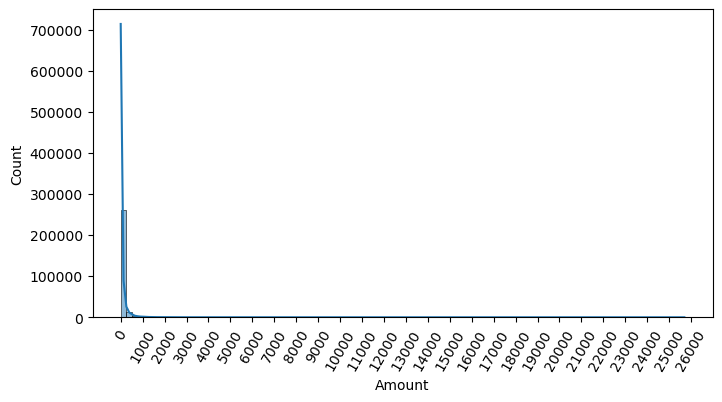

In [74]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler
#사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    #변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    #기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [80]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


In [81]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    #넘파이의 log1p()를 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [82]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


<Axes: >

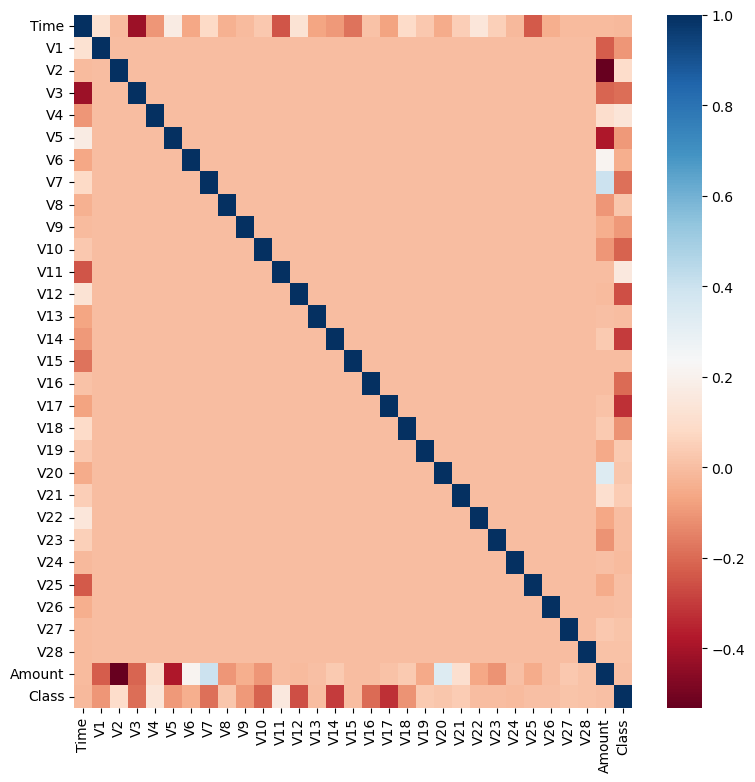

In [83]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [88]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    #fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    #IQR을 구하고 IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    #최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환.
    outlier_index = fraud[(fraud < lowest_val) | (fraud>highest_val)].index
    return outlier_index

In [89]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [90]:
#get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    #이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


In [91]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [92]:
lr_clf = LogisticRegression(max_iter=1000)
#ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


In [93]:
#3장 precision_recall_curve_plot() 함수
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

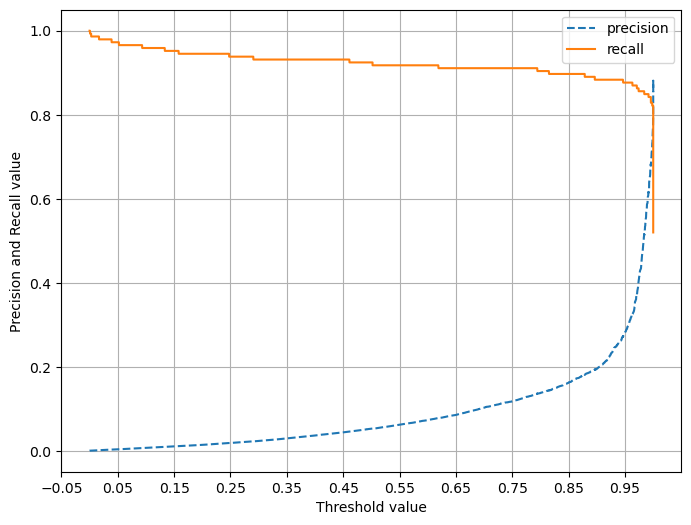

In [94]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [95]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,    F1: 0.8794, AUC:0.9814
